---
# Introduction:

## Interactive Shaley-Sand Analysis in Geolog


We have an interactive example of shaley sand analysis from the Gulf of Mexico, where we employ interactive petrophysical parameter widgets to drive the interpretation. The log data includes conventional well logs, along with NMR logs for combined analysis. For shaly-sand analysis, we utilize three primary saturation models:

        •	George Coates' MRIAN Dual-Water model
        •	Our own Waxman-Smits iterative model
        •	Crain's Waxman-Smits non-iterative saturation equation

In our analysis, we adopt the PHIT/Qv method since PHIT can be calibrated to core measurements. Additionally, we have found NMR data to be highly valuable, particularly in assessing reservoir quality and determining the volume of non-movable Capillary Bound Water (MBVI). We compare this with log-calculated Bulk Volume Water (BVW) to identify intervals capable of delivering water-free hydrocarbons. By integrating NMR with conventional logs, we achieve a comprehensive approach to our petrophysical analysis and interpretation. This concept was demonstrated by George Coates' MRIAN analysis at Numar in the mid-90s, and we incorporate their method along with our own Waxman-Smits techniques in this interpretation.

To calculate Clay Bound Water (CBW), we utilize interactive slide bars. CBW refers to the water chemically bound to the shales. It is computed as the difference between Total Porosity (PHIT) and Effective Porosity (PHIE):

        CBW = PHIT - PHIE

Typically, we start with NMR effective porosity (MPHI for MRIL or CMRP_3MS for CMR) as the effective porosity. However, in cases of light hydrocarbon, heavy oil, or gas intervals, the NMR effective porosity might be suppressed. This leads to an overestimated CBW volume due to the difference between PHIT and the suppressed NMR effective porosity resulting from the low Hydrogen Index (HI) of hydrocarbons:

        CBW = PHIT - MPHI

To model CBW, we create a cross-plot of Vshale (or Swb) against CBW. This plot exhibits a clear trend, except for cases involving gas or heavy oil, where some samples may deviate and show higher CBW volumes. In such instances, we disregard those data points and focus on the primary trend to model CBW for the entire well. Furthermore, the plot below illustrates the Porosity of Shale at the CBW intercept when Vshale is at 100%.

 
 ![cbw_vsh](cbw_vsh2.png)

*(Non-Interactive Plot above)*


This is where the interactive parameters utilizing Panel widgets become crucial, allowing us to gain a deeper understanding of the impact and sensitivity of these parameters. With the utilization of Python's Panel library, we can generate interactive figures that enable dynamic adjustment of parameters using slide bars. The outcomes are instantly displayed, as exemplified below. This functionality empowers us to intuitively comprehend the effects of parameter modifications, delivering the desired level of interactivity.

In the following example, we employ Panel to fit the line to the normal trend observed from our cross plot data of Vsh vs. CBW.


 ![cbw_vsh](CBW_Interactive.gif)
 
*(Interactive Plot above)*

PHIT is derived from the Neutron-Bulk Density Cross Plot porosity, which is calibrated to actual porosity charts using the k-nearest neighbors (kNN) method. It is then compared to the NMR Effective Porosity (MPHI). To determine CBW, we fit the dominant trend using the slide bar, as demonstrated above. This single function enables us to calculate CBW across the entire range of shale volumes:


        CBW = Vsh * CBW Intercept @ 100% Vshale


To calculate the shale volume (Vsh), it is crucial to have a representative estimate. We utilize interactive shale parameter slide bars from Panel for each tool to calculate our shale volumes. Refer to the example below:

 ![cbw_vsh](Vsh_Interactive.gif)
 
*(Interactive Plot above)*

We determine the shale volume (Vsh) using the following tools:

        •	GR (Gamma Ray)
        •	SP (Spontaneous Potential)
        •	Neutron-Density (Neutron Porosity vs. Bulk Density)
        •	Neutron-MPHI (Neutron Porosity vs. MPHI)

To calculate Vsh, we utilize slide bars to define the clean and shale values for the SP and GR tools. We utilize both the depth plots on the left and the appropriate histograms for this purpose. Additionally, we adjust the neutron value for shale in the cross plots. All shale volumes are calculated interactively and in real-time, allowing for immediate feedback. Moreover, we compute a Median Filtered Vsh as well. Typically, we rely on the Median Filtered Vsh for our final interpretation of shale volume.

![cbw_vsh](Vsh_final.png)

*(Non-Interactive Plot above)*

The final Shale Volume is the Median Filtered Vsh (orange curve below) based on Median Vshale calculated from Gamma Ray (green), SP (black), Neutron-Density (red) and Neutron-MPHI (blue).


To calculate Qv, we utilize the estimated volume of Clay Bound Water (CBW) and the equation:

        Swb = CBW/PHIT

Next, we calculate Qv for our shaley-sand saturation models using the Hill Shirley and Klein equation shown below:

        Qv = Swb / (0.6425 / ((Fluid_Density * Salinity(kppm)) ** 0.5) + 0.22)

To compute water saturations, we employ interactive slide bars. Our approach incorporates the Dual-Water saturation model developed by George Coates at Numar, which integrates conventional and NMR log data for a robust interpretation. This model utilizes a variable 'w' for electrical properties and accounts for excess porosity in shales by discounting total porosity using RPHICLAY.

In addition to the Dual-Water method, we utilize both the standard iterative approach and the non-iterative option for the Waxman-Smits equation, as provided by Crain.

In shaley-sand interpretations, the Waxman-Smits method offers more flexibility. We can model the Waxman-Smits cementation exponent (m*) to vary with increasing Vsh, calibrated to Swb based on observed trends in wet intervals. The cross plot of Vsh vs. m*_apparent (MNA) illustrates this relationship. The apparent m* increases as Vsh (or Swb) increases, primarily observed in the wet intervals. It is important to note that m*_apparent reaches high values in hydrocarbon-bearing intervals and should not be used to determine the trend of m* vs. Vsh or Swb. The m* value at Vsh (or Swb) of 0 (y-intercept) represents the Archie m. As Vsh (or Swb) increases, m* also increases. We have observed that an incorrect Rw value can result in an unrealistic y-intercept, providing valuable feedback regarding our choice of Rw.

![mna_vsh](mna_vsh2.png)

*(Non-Interactive Plot above)*

                                v
In the above plot, we calculated the initial apparent m* using the following equation on the y-axis:

        m*_apparent = log10(Rw/(Rt*(1+Rw*B*Qv)))/log10(PHIT)

The plot illustrates m*_apparent against Vsh, with water saturations represented by the color on the z-axis. The wet trend, indicated by the dark blue sample points, demonstrates a well-defined relationship with a y-intercept of approximately 1.9 at zero Vsh and a slope of 1.8. The y-intercept at zero Vsh represents the Archie 'm' value for the clean rock. The slope and intercept defined by the wet samples for Waxman-Smits m* within the Vsh range of 0 to 1 are utilized to model m*. As Vsh (or Swb) increases, m* also increases.

The relationship between m* and Vsh is represented by the equation:

        m* = slope * Vsh + m_archie

It is important to note that an incorrect Rw value can lead to a shift in the Vsh vs. m*_apparent cross plot. To comprehend the interplay of these factors, Panel widgets are employed to adjust the archie m, n, Rw, and slope of the wet trend on the Vsh vs. m*_apparent cross plot displayed on the right. The depth plot on the left presents the calculated Bulk Volume Water (BVW) using these petrophysical parameters. The Pickett plot in the middle visualizes how our data fits on the log-log cross plot of Rt vs. PHIT. This Panel display aids in accurately determining the saturations in our analysis.

 ![cbw_vsh](Pickett_Interactive2.gif)

*(Interactive Plot above)*


In our interpretation, we commonly compare the log analysis-based Bulk Volume Water in the effective porosity system (BVWe) with the MRIL MBVI, both of which are in the effective porosity system. This allows us to identify intervals that possess hydrocarbon saturations without any movable water. When BVWe exceeds MBVI, denoted by the cyan-colored fill in the penultimate track, it indicates the presence of movable water, which is influenced by the relative permeability and mobility of the fluids involved.


 
### Resources:
1. Coates, G.R., Gardner, J.S., and Miller, D.L., 1994, "Applying pulse-echo NMR to shaly sand formation evaluation", paper B, 35th Annual SPWLA Logging Symposium Transactions, 22 p.

2. Hill, H.J., Shirley, O.J., Klein, G.E.: “Bound Water in Shaley Sands - Its Relation to Qv and Other Formation Properties”, Log Analyst, May-June 1979.

3. Dacy, J., Martin, P.: "Practical Advances in Core-Based Water Saturation Analysis of Shaly Tight Gas Sands", SCA, SCA2009-29, 2009.









---
### Data: 
### Log Data is found in las file

DEPTH	SP	GR	CALI	BitSize	LL8	ILM	ILD	RHOB	NPHI	DT	PHIX	RHOMAT	MBVI	MPHI

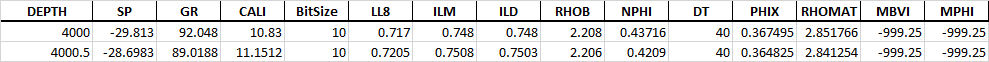

---
# 1) Python Load Data and Define all Depth Plot Layouts:

## Python Requirements:

In [1]:
# -*- coding: utf-8 -*-
"""
Used Spyder Editor

"""

"""
===============================================================================
 Import data from text file into a pandas Dataframe called: ``data''.
 Null data (-999.00000) will be replace by numpy.nan and M__DEPTH changed 
 with DEPT (much common abrevation in las files)
===============================================================================
"""
import warnings
warnings.filterwarnings("ignore")


import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

import ipywidgets as widgets

%matplotlib inline

import panel as pn

#Qt4Agg

# Suggested by Hoxbro at Panel
plt.switch_backend("agg")
#plt.switch_backend("Qt4Agg")


pn.extension()

import lasio

from bokeh.models.formatters import PrintfTickFormatter
from bokeh.models.widgets import Button

from scipy.optimize import minimize


# Load Data:
With Geolog we would just pull the data directly from the well, but with this example we are importing the data from a Excel file.

In [2]:
las = lasio.read("./data/gulfcoast_wire.las")
#las = lasio.read("./data/NMR_Well.las")
#las = lasio.read("./data/ws_petrogg.las")

In [3]:
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

START DEPTH (STRT): 4500.0
STOP DEPTH (STOP): 4750.0
STEP (STEP): 0.5
NULL VALUE (NULL): -999.25
COMPANY (COMP): 
WELL (WELL): CRAIGs
FIELD (FLD): 
LOCATION (LOC): 
COUNTRY (CTRY): 
STATE (STAT): 
COUNTY (CNTY): 
SERVICE COMPANY (SRVC): 
DATE (DATE): 
API NUMBER (API): 
UNIQUE WELL ID (UWI): 


In [4]:
for curve in las.curves:
    print(curve.mnemonic)

DEPTH
BS
CALI
DRHO
DT
GR
ILD
ILM
MBVI
MFFI
MGR
MPERM
MPHI
NPHI
P1
P2
P3
P4
P5
P6
P7
P8
PEF
RHOB
RMLL
SP


In [5]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPTH, Units: FT, Description: 
Curve: BS, Units: IN, Description: 10
Curve: CALI, Units: IN, Description: 
Curve: DRHO, Units: G/C3, Description: 
Curve: DT, Units: US/F, Description: Created using text insert
Curve: GR, Units: GAPI, Description: 
Curve: ILD, Units: OHMM, Description: 
Curve: ILM, Units: OHMM, Description: 
Curve: MBVI, Units: V/V, Description: MBVI/100
Curve: MFFI, Units: V/V, Description: MFFI/100/100
Curve: MGR, Units: GAPI, Description: 
Curve: MPERM, Units: MD, Description: 
Curve: MPHI, Units: V/V, Description: MPHI/100
Curve: NPHI, Units: V/V, Description: 
Curve: P1, Units: %, Description: 
Curve: P2, Units: %, Description: 
Curve: P3, Units: %, Description: 
Curve: P4, Units: %, Description: 
Curve: P5, Units: %, Description: 
Curve: P6, Units: %, Description: 
Curve: P7, Units: %, Description: 
Curve: P8, Units: %, Description: 
Curve: PEF, Units: %, Description: 
Curve: RHOB, Units: G/C3, Description: 
Curve: RMLL, Units: OHMM, Description: 
Curve: S

## Important step to turn las into Pandas DataFrame:

data is a Pandas DataFrame

las curves are an array which are necessary for some processing level by level processing

In [6]:
data = las.df()    #store las file in df variable as pandas dataframe

In [7]:
data.describe()

BS        CALI        DRHO          DT          GR         ILD  \
count  501.0  501.000000  501.000000  501.000000  501.000000  501.000000   
mean    10.0   10.252111   -0.012165  110.402705   60.497366    0.869848   
std      0.0    0.302689    0.008410    4.763392   15.120231    1.391927   
min     10.0    9.752000   -0.040200  101.381000   41.942000    0.174000   
25%     10.0   10.087000   -0.017800  107.341000   50.122500    0.227500   
50%     10.0   10.172000   -0.012200  109.528000   56.029000    0.308000   
75%     10.0   10.323000   -0.006200  111.861000   62.951000    0.667500   
max     10.0   12.514500    0.009300  129.725000  123.392700    9.278800   

              ILM        MBVI        MFFI         MGR  ...          P3  \
count  501.000000  501.000000  501.000000  501.000000  ...  501.000000   
mean     0.923229    0.156449    0.161432   79.348209  ...    2.452395   
std      1.503160    0.066337    0.099062   19.295050  ...    3.164305   
min      0.177200    0.041610    0.008140    0.000000  ...    0.000000   
25%      0.231000    0.099530    0.058760   66.269000  ...    0.049000   
50%      0.328300    0.145545    0.180860   76.066000  ...    0.920500   
75%      0.666800    0.196250    0.250135   83.121000  ...    3.936000   
max      9.041000    0.327490    0.313210  149.269000  ...   14.422000   

               P4          P5          P6          P7          P8         PEF  \
count  501.000000  501.000000  501.000000  501.000000  501.000000  501.000000   
mean     5.845211    7.675698    1.613406    0.344574    0.664347    3.439236   
std      4.900758    6.884137    2.537412    0.797617    0.774553    0.450541   
min      0.000000    0.000000    0.000000    0.000000    0.000000    2.594000   
25%      1.951000    1.002000    0.045000    0.000000    0.000000    3.101000   
50%      4.462000    6.281000    0.508000    0.038000    0.432000    3.431500   
75%      9.346000   11.985000    2.109000    0.255500    1.043000    3.689200   
max     22.225000   28.547000   14.046000    5.579000    6.765000    6.179800   

             RHOB        RMLL          SP  
count  501.000000  501.000000  501.000000  
mean     2.125364    1.356826  -39.626309  
std      0.057817    3.612295   11.331461  
min      1.985200    0.121000  -56.760800  
25%      2.084000    0.270000  -48.885800  
50%      2.120000    0.448000  -41.063000  
75%      2.177700    0.757700  -33.125500  
max      2.268000   37.575800   -8.063000  

[8 rows x 25 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 501 entries, 4500.0 to 4750.0
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BS      501 non-null    float64
 1   CALI    501 non-null    float64
 2   DRHO    501 non-null    float64
 3   DT      501 non-null    float64
 4   GR      501 non-null    float64
 5   ILD     501 non-null    float64
 6   ILM     501 non-null    float64
 7   MBVI    501 non-null    float64
 8   MFFI    501 non-null    float64
 9   MGR     501 non-null    float64
 10  MPERM   501 non-null    float64
 11  MPHI    501 non-null    float64
 12  NPHI    501 non-null    float64
 13  P1      501 non-null    float64
 14  P2      501 non-null    float64
 15  P3      501 non-null    float64
 16  P4      501 non-null    float64
 17  P5      501 non-null    float64
 18  P6      501 non-null    float64
 19  P7      501 non-null    float64
 20  P8      501 non-null    float64
 21  PEF     501 non-null    float

## Process and Rename log curves for plots and analysis. The plots want a DEPT, Rxo....

In [9]:
data=data.rename(columns=({'DEPTH':'DEPT'}))
data['DEPT']=data.index
data['Rxo'] = data['RMLL']
#data['BS'] = 10
data['DTC'] = data['DT']
#data['NPHI'] = data['NPHI'] / 100
data['DCAL'] = data['CALI'] - data['BS']
#data['DEPT']=data.index
#data['MPHI'] = data['MPHI']/100
#data['MBVI'] = data['MBVI']/100




#data['LL8'] = data['RMLL']
#data['DT'] = data['GR']
#data['PHIX'] = data['NPHI']/100
#data['MPHI'] = data['MPHI']/100
#data['MBVI'] = data['MBVI']/100
#data['NPHI'] = data['NPHI']/100

data.describe()

BS        CALI        DRHO          DT          GR         ILD  \
count  501.0  501.000000  501.000000  501.000000  501.000000  501.000000   
mean    10.0   10.252111   -0.012165  110.402705   60.497366    0.869848   
std      0.0    0.302689    0.008410    4.763392   15.120231    1.391927   
min     10.0    9.752000   -0.040200  101.381000   41.942000    0.174000   
25%     10.0   10.087000   -0.017800  107.341000   50.122500    0.227500   
50%     10.0   10.172000   -0.012200  109.528000   56.029000    0.308000   
75%     10.0   10.323000   -0.006200  111.861000   62.951000    0.667500   
max     10.0   12.514500    0.009300  129.725000  123.392700    9.278800   

              ILM        MBVI        MFFI         MGR  ...          P7  \
count  501.000000  501.000000  501.000000  501.000000  ...  501.000000   
mean     0.923229    0.156449    0.161432   79.348209  ...    0.344574   
std      1.503160    0.066337    0.099062   19.295050  ...    0.797617   
min      0.177200    0.041610    0.008140    0.000000  ...    0.000000   
25%      0.231000    0.099530    0.058760   66.269000  ...    0.000000   
50%      0.328300    0.145545    0.180860   76.066000  ...    0.038000   
75%      0.666800    0.196250    0.250135   83.121000  ...    0.255500   
max      9.041000    0.327490    0.313210  149.269000  ...    5.579000   

               P8         PEF        RHOB        RMLL          SP  \
count  501.000000  501.000000  501.000000  501.000000  501.000000   
mean     0.664347    3.439236    2.125364    1.356826  -39.626309   
std      0.774553    0.450541    0.057817    3.612295   11.331461   
min      0.000000    2.594000    1.985200    0.121000  -56.760800   
25%      0.000000    3.101000    2.084000    0.270000  -48.885800   
50%      0.432000    3.431500    2.120000    0.448000  -41.063000   
75%      1.043000    3.689200    2.177700    0.757700  -33.125500   
max      6.765000    6.179800    2.268000   37.575800   -8.063000   

              DEPT         Rxo         DTC        DCAL  
count   501.000000  501.000000  501.000000  501.000000  
mean   4625.000000    1.356826  110.402705    0.252111  
std      72.385254    3.612295    4.763392    0.302689  
min    4500.000000    0.121000  101.381000   -0.248000  
25%    4562.500000    0.270000  107.341000    0.087000  
50%    4625.000000    0.448000  109.528000    0.172000  
75%    4687.500000    0.757700  111.861000    0.323000  
max    4750.000000   37.575800  129.725000    2.514500  

[8 rows x 29 columns]

## Depth Plots:

### Define Plot limits and Tops for the Well:

In [10]:
"""
===============================================================================
                    Depths over most of well interval
===============================================================================

===============================================================================
 a Main ZONE for analysis will be selected from the entire log. Program displays
 the logs again within the choosen interval with triple_combo_plot
 function.
 
 === Select zone of analysis: top and depth
 
 by setting the ``top_depth'' and ``bottom_depth'' variables
===============================================================================
"""

top_depth    = 4500
bottom_depth = 4750


### Define Plot limits for Zone of Interest:

In [11]:
"""
===============================================================================
                   Primary Zone of Interest
===============================================================================

===============================================================================
    Summary or Primary Zone of interest depths are required here
===============================================================================
"""
top_summary    = 4500
bottom_summary = 4750


### Add Formation Tops:

In [12]:
"""
===============================================================================
 === 1. Add formation tops & depths 
 
===============================================================================
"""

tops        = ('TOP of ZONE','BOTTOM of ZONE', 'TD' )
tops_depths = (     4500    ,     4750       , 5000 )


### Plot Definitions:

In [13]:
"""
===============================================================================
 === 2. Display the logs in Triple Combo Plot
 
 A triple-combo display will be created in matplotlib in order to
 visualize the curves. The template will be incorporated into the triple
 combo_plot function dependent on the selection of top and bottom depths
 of the graph.
 
 The triple combo display will consist in: - First track: GR, SP, CALI -
 Second track: Resistivities - Third Track: Density, Sonic and Neutronic
 
 In the next code lines, we will set the template.
===============================================================================
"""
# Create the TRIPLE COMBO figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,16), sharey=True)
    fig.suptitle("Triple Combo: Well Composite Plot", color='blue' , fontsize=22)
    fig.subplots_adjust(top=0.8,wspace=0.1)

    #General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=1.0, color='red')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center', color = 'red')
    
        
    #1st track: GR, CALI, SP track
    ax01=ax[0].twiny()
    ax01.set_xlim(-100,10)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("SP [mV]")
    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='black',linewidth=3.0)
    ax01.set_xlabel('SP[mV]',color='black')    
    ax01.tick_params(axis='x', colors='black')
    ax01.grid(True)
    
    ax02=ax[0].twiny()
    ax02.set_xlim(6,36)
    ax02.plot(logs.CALI, logs.DEPT, '-', label='CALN[in]', color='blue', linewidth=2.0) 
    ax02.spines['top'].set_position(('outward',80))
    ax02.set_xlabel('CALI[in]',color='blue')    
    ax02.tick_params(axis='x', colors='blue')

    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green', linewidth=2.0)
    ax03.spines['top'].set_position(('outward',40))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')

    ax04=ax[0].twiny()
    ax04.set_xlim(6,36)
    ax04.plot(logs.BS, logs.DEPT, '--', label='BS[in]', color='black', linewidth=1.0)
    ax04.spines['top'].set_position(('outward',120))
    ax04.set_xlabel('BS[in]',color='black')    
    ax04.tick_params(axis='x', colors='black')
    ax04.fill_betweenx(logs.DEPT,logs.CALI, logs.BS,color='yellow',label= 'Wash Out')    
    #ax04.fill_betweenx(logs.DEPT,logs.BS, logs.CALI,color='brown',label= 'Mud Cake')    

    

    #2nd track: Resistivities
    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,100)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[ohmm]', color='black')
    ax11.plot(logs.ILD, logs.DEPT, '--', label='ILD[ohmm]', color='black', linewidth=3.0)
    ax11.tick_params(axis='x', colors='black')    
    
    ax12=ax[1].twiny()
    ax12.set_xlim(0.1,100)
    ax12.set_xscale('log')
    ax12.plot(logs.ILM, logs.DEPT, label='ILM[ohmm]', color='red') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('ILM[ohmm]', color='red')    
    ax12.tick_params(axis='x', colors='red')
    
    ax13=ax[1].twiny()
    ax13.set_xlim(0.1,100)
    ax13.set_xscale('log')
    ax13.plot(logs.Rxo, logs.DEPT,label='Rxo[ohmm]', color='blue') 
    ax13.spines['top'].set_position(('outward',0))
    ax13.set_xlabel('Rxo[ohmm]',color='blue')
    ax13.tick_params(axis='x', colors='blue')

    #3rd track: DT, RHOB, NPHI track
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(115,36)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-0.15,0.45)
    ax22.invert_xaxis()
    ax22.plot(logs.NPHI, logs.DEPT, label='NPHI[v/v]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[v/v]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red') 


    #4th track: NMR
    ax31=ax[3].twiny()
    ax31.grid(True)
    ax31.set_xlim(0.5,0)
    ax31.spines['top'].set_position(('outward',0))
    ax31.set_xlabel('MPHI[v/v]')
    ax31.plot(logs.MPHI, logs.DEPT, label='MPHI[v/v]', color='black')
    ax31.set_xlabel('MPHI[v/v]', color='black')    
    ax31.tick_params(axis='x', colors='black')

    ax32=ax[3].twiny()
    ax32.grid(True)
    ax32.set_xlim(0.5,0)
    ax32.spines['top'].set_position(('outward',40))
    ax32.set_xlabel('MBVI[v/v]')
    ax32.plot(logs.MBVI, logs.DEPT, label='MBVI[v/v]', color='black')
    ax32.set_xlabel('MBVI[v/v]', color='black')    
    ax32.tick_params(axis='x', colors='black')
    ax32.fill_betweenx(logs.DEPT,logs.MBVI, 0,color='blue',label= 'MBVI')
    ax32.fill_betweenx(logs.DEPT,logs.MPHI, logs.MBVI,color='yellow',label= 'Free Fluid')    

    return fig

In [14]:
# Create the Intermediate figure and subplots
def intermediate_plot(top_depth,bottom_depth):
    
    # =============================================================================
    # We will create several displays (GR,SP vs DEPTH track, histograms, N-D
    # crossplot, vsh track) in order to see and choose the right parameters
    # for our clay/clean formations as well as to compare the results of all
    # vsh methods calculated above.
    # =============================================================================



    #logs=data.iloc[[top_depth],[bottom_depth]]
    #logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    #print (logs.GR,logs.LLD)
    #Setting GRAPH ELEMENTS

    fig = plt.figure(figsize=(12,12))
    fig.suptitle('Intermediate Plot: Volume of Shale from Different Methods',color='blue' , fontsize=18)
    fig.subplots_adjust(top=0.85,wspace=0.3, hspace =0.3)

    gs = gridspec.GridSpec(4, 3)
    ax1 = fig.add_subplot(gs[:,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[1,1])
    ax4 = fig.add_subplot(gs[2,1])
    ax5 = fig.add_subplot(gs[3,1])
    ax6 = fig.add_subplot(gs[:,2],sharey = ax1)


    # Graph for GR,SP
    ax1.invert_yaxis()
    ax1.grid(True)
    ax1.set_ylabel('DEPTH')
    ax1.plot(logs.GR, logs.DEPT, color='green')
    ax1.set_xlabel('GR [api]', color='green')

    ax11=ax1.twiny()
    ax11.plot(logs.SP, logs.DEPT, color='black', linewidth = 3.0)
    ax11.set_xlabel("SP [mV]",color='black')


    #The graph of GR histogram
    ax2.hist(logs.GR.dropna(),bins=30,color='green')
    ax2.set_xlabel('GR [api]')
    ax2.set_ylabel('Frequency')

    ax3.hist(logs.SP.dropna(),bins=30, color='black')
    ax3.set_xlabel('SP [mV]')
    ax3.set_ylabel('Frequency')

    ax4.hist(logs.ILD.dropna(),bins=30, color='gray')
    ax4.set_xlabel('ILD [ohmm]')
    ax4.set_ylabel('Frequency')


    # N-D XPlot for Volume of Shale
    ax5.plot(logs.NPHI, logs.RHOB,'ro',markersize=4)
    ax5.set_xlabel('NPHI [v/v]')
    ax5.set_xlim(-.05,1.0)
    ax5.set_ylim(3,1.0)
    ax5.set_ylabel('RHOB [g/cc]')
    ax5.grid(True)
    ax5.text(0.05, 2.1, 'clean line', color='red', fontsize=8)
    ax5.text(0.350, 2.95, 'shale point',color='red', fontsize=8)
    ax5.text(0.6, 1.2, 'fluid point',color='red', fontsize=8)
    # Plot Shale Triangle
    ax5.plot([neut_matrix,neut_fl],[den_matrix,den_fl], marker='o', color='blue') # this is clean line
    #ax5.plot([neut_matrix,1],[den_shaleale,1], marker='o', color='blue') #this is the clean line
    ax5.plot([neut_matrix,neut_shale],[den_matrix,den_shale], marker='o', color='blue') #this is to the shale point
    ax5.plot([neut_shale,1],[den_shale,den_fl], marker='o', color='blue') #this is from the shale point to 100% porosity line
    ax5.plot(neut_shale,den_shale,'bo')#,color='blue')
  

    #plt.title("Volume of Shale")
    ax6.plot(logs.vshgr, logs.DEPT, label ='Vshgr',color="green")
    ax6.plot(logs.vshnd, logs.DEPT,label ='Vshnd',color="red")
    ax6.plot(logs.vshsp, logs.DEPT,label ='Vshsp',color="black")
    ax6.plot(logs.vshnmphi, logs.DEPT,label ='VshN-Mphi',color="orange")
    ax6.legend(loc='best',fontsize='x-small')
    ax6.set_xlim(0,1)
    ax6.set_ylim(top_depth,bottom_depth)
    ax6.invert_yaxis()
    ax6.grid(True)
    ax6.set_xlabel('Vsh [v.v]')

    #plt.savefig ('vsh_plot.png', dpi=200, format='png')

    # =============================================================================
    # Use the histrograms to re-evaluate: - GR min, max (clean, clay) - SP
    # min, max (clean, clay) - RT min, max (clean, clay) From ND Xplot extract
    # the clean line and clay point.
    # 
    # All vshgr (you can apply any correction here), vshsp, vshrt and vshnd
    # curves are plotted in the same track for comparison. It is obvious that
    # the vshgr and vshnd match very well, comparing with the rest.
    # 
    # To simplify the intepretation we will accept the vshgr as the vsh.
    # Another approch is to consider vsh as the minimum value obtained through
    # several methods (vsh = min (vshgr,vshsp,vshnd)) or Hodges-Lehman Median Filter
    # =============================================================================


    return fig


In [15]:
# Create the TRIPLE COMBO figure and subplots
def Porosity(top_depth,bottom_depth):
    
    logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,16), sharey=True)
    fig.suptitle("Triple Combo: Well Composite Plot", color='blue' , fontsize=22)
    fig.subplots_adjust(top=0.8,wspace=0.1)

    #General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=1.0, color='red')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center', color = 'red')
    
        
    #1st track: GR, CALI, SP track
    ax01=ax[0].twiny()
    ax01.set_xlim(-100,10)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("SP [mV]")
    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='black',linewidth=3.0)
    ax01.set_xlabel('SP[mV]',color='black')    
    ax01.tick_params(axis='x', colors='black')
    ax01.grid(True)
    
    ax02=ax[0].twiny()
    ax02.set_xlim(6,36)
    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='blue', linewidth=2.0) 
    ax02.spines['top'].set_position(('outward',80))
    ax02.set_xlabel('CALI[in]',color='blue')    
    ax02.tick_params(axis='x', colors='blue')

    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green', linewidth=2.0)
    ax03.spines['top'].set_position(('outward',40))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')

    ax04=ax[0].twiny()
    ax04.set_xlim(6,36)
    ax04.plot(logs.BS, logs.DEPT, '-', label='BS[in]', color='black', linewidth=1.0)
    ax04.spines['top'].set_position(('outward',120))
    ax04.set_xlabel('BS[in]',color='black')    
    ax04.tick_params(axis='x', colors='black')
    ax04.fill_betweenx(logs.DEPT,logs.CALI, logs.BS,color='yellow',label= 'Wash Out')    

    

    #2nd track: Resistivities
    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,100)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[ohmm]', color='black')
    ax11.plot(logs.ILD, logs.DEPT, '--', label='ILD[ohmm]', color='black', linewidth=3.0)
    ax11.tick_params(axis='x', colors='black')    
    
    ax12=ax[1].twiny()
    ax12.set_xlim(0.1,100)
    ax12.set_xscale('log')
    ax12.plot(logs.ILM, logs.DEPT, label='ILM[ohmm]', color='red') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('ILM[ohmm]', color='red')    
    ax12.tick_params(axis='x', colors='red')
    
    ax13=ax[1].twiny()
    ax13.set_xlim(0.1,100)
    ax13.set_xscale('log')
    ax13.plot(logs.Rxo, logs.DEPT,label='Rxo[ohmm]', color='blue') 
    ax13.spines['top'].set_position(('outward',0))
    ax13.set_xlabel('Rxo[ohmm]',color='blue')
    ax13.tick_params(axis='x', colors='blue')

    
    #3rd track: DT, RHOB, NPHI track
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(115,36)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-0.15,0.45)
    ax22.invert_xaxis()
    ax22.plot(logs.NPHI, logs.DEPT, label='NPHI[v/v]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[v/v]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red') 

    ax24=ax[2].twiny()
    ax24.set_xlim(-0.15,0.45)
    ax24.invert_xaxis()
    ax24.plot(logs.PHIT, logs.DEPT,  color='black',linewidth=2.0) 
    ax24.spines['top'].set_position(('outward',120))
    ax24.set_xlabel('PHIT[v/v]', color='black')    
    ax24.tick_params(axis='x', colors='black') 
    #ax24.fill_betweenx(logs.DEPT,logs.PHIE,logs.PHIT,facecolor='#d1d1d1' ,hatch='.--.',label='CBW')
    ax24.legend(loc='lower right')
    

    #4th track: NMR
    ax31=ax[3].twiny()
    ax31.grid(True)
    ax31.set_xlim(0.5,0)
    ax31.spines['top'].set_position(('outward',0))
    ax31.set_xlabel('MPHI[v/v]')
    ax31.plot(logs.MPHI, logs.DEPT, label='MPHI[v/v]', color='black')
    ax31.set_xlabel('MPHI[v/v]', color='black')    
    ax31.tick_params(axis='x', colors='black')

    ax32=ax[3].twiny()
    ax32.grid(True)
    ax32.set_xlim(0.5,0)
    ax32.spines['top'].set_position(('outward',40))
    ax32.set_xlabel('MBVI[v/v]')
    ax32.plot(logs.MBVI, logs.DEPT, label='MBVI[v/v]', color='black')
    ax32.set_xlabel('MBVI[v/v]', color='black')    
    ax32.tick_params(axis='x', colors='black')
    ax32.fill_betweenx(logs.DEPT,logs.MBVI, 0,color='blue',label= 'MBVI')
    ax32.fill_betweenx(logs.DEPT,logs.MPHI, logs.MBVI,color='yellow',label= 'Free Fluid')    

    return fig

# Show Raw Data Depth Plots:

## Triple-Combo Depth Plot over entire well

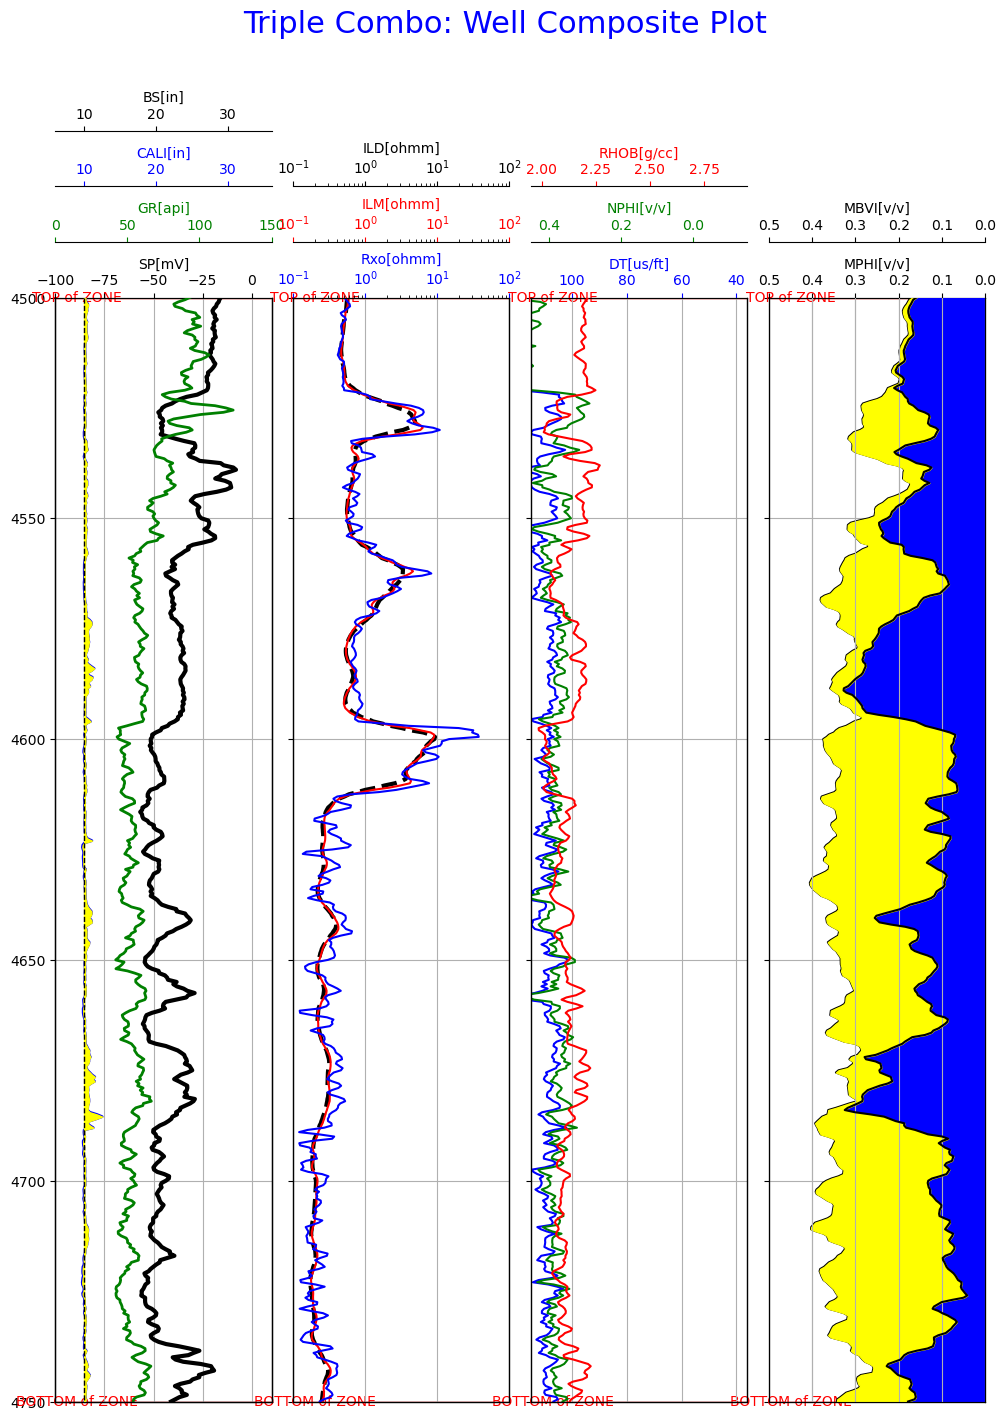

In [16]:
# =============================================================================
#      Display the logs for the whole well
# =============================================================================

triple_combo_plot(data.DEPT.min(),data.DEPT.max())

#  Depth Plot only over Zone of Interest

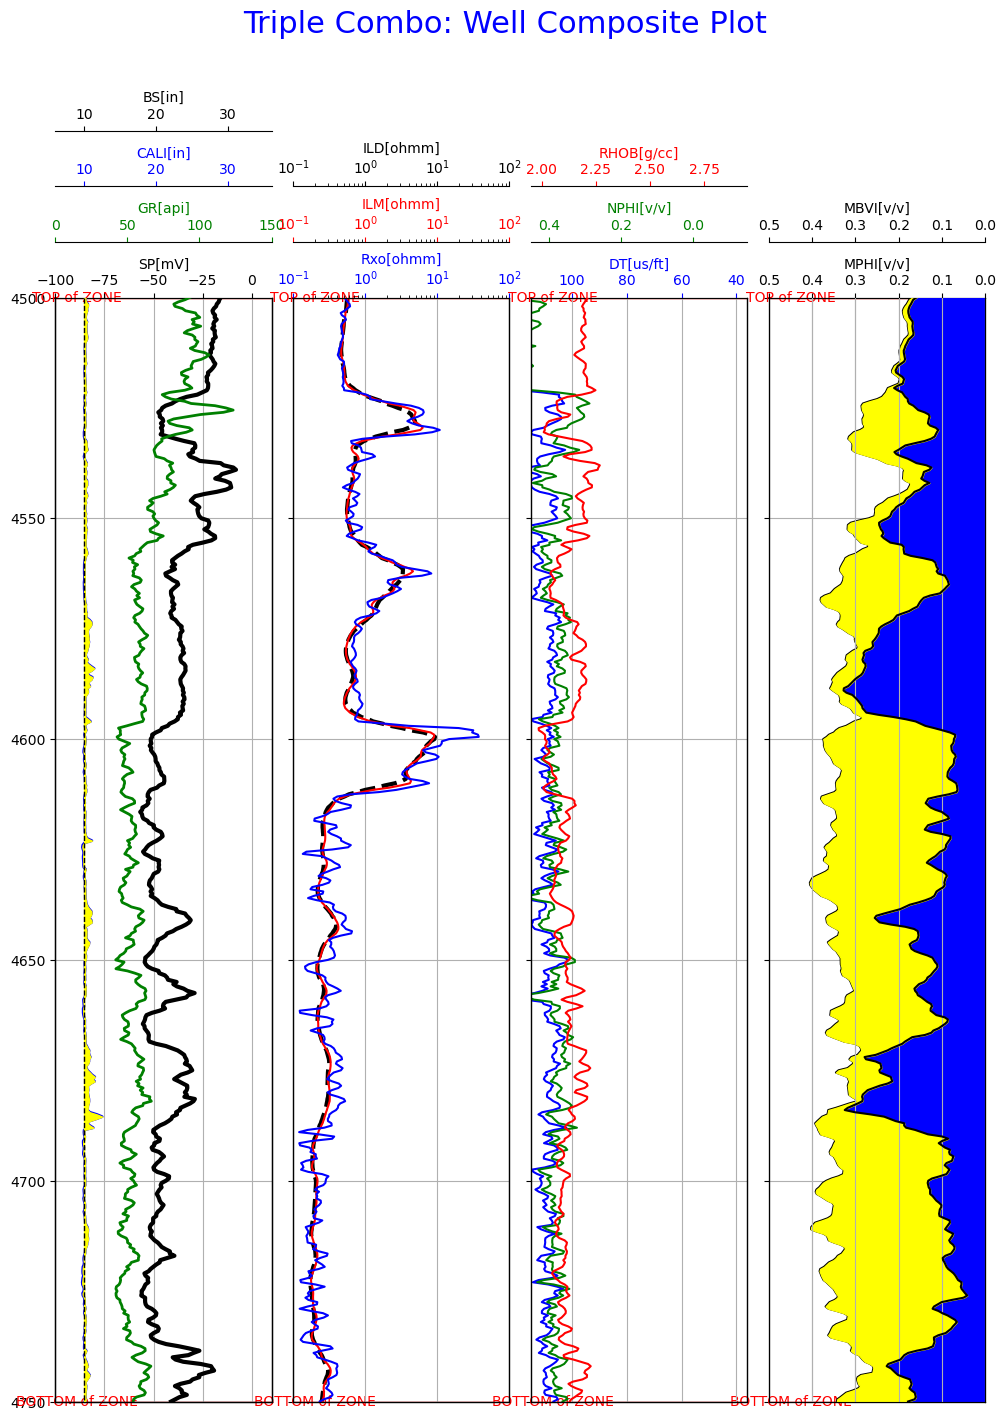

In [17]:
#Plot again using new Top and Bottom Depths. Could you do this with tops?
triple_combo_plot(top_depth,bottom_depth)

# 2) Petrophysical Parameters:

## Petrophysical Parameters to be used in this shaley-sand log analysis:

In [18]:
"""
===============================================================================
           The following are the log parameter inputs for all calculations          
===============================================================================            

===============================================================================
 Shale and Porosity Parameters for many Calculations
    Mihai has a 100% clay point that I do not think is possible. 
    We use a 100% shale point 
===============================================================================
"""
# GR endpoint parameters for shale calculations
gr_clean, gr_shale      = 45  , 120                             # Shale Parmaetrs for GR

# SP endpoint parameters for shale calculations
sp_clean, sp_shale      = -50  , 0                              # Shale Parameters for SP

# Endpoint Parameters for Neutron-Density Shale Triangle
neut_shale, den_shale   = 0.32 , 2.65                           # Shale Parmaters for Neutron-Density
neut_matrix, den_matrix = -0.04 , 2.65                          # Matrix Parmameters for Neutron-Density
neut_fl, den_fl         =  1.0 , 1.1                            # Fluid Parmameters for Neutron-Density

# Fluid Parameters for MRIL tool
mphi_shale              = 0.0                                   # MRIL Parameters

# Fluid Parameters for Sonic tool
dt_matrix, dt_fluid, dt_shale, cp, alpha = 55.5,188.0,90.0,1,5/8 # Sonic Parameters

# Rt Shale parameters
rt_shale = 6
rt_clean = 170




"""
===============================================================================
                      Electrical Properties
===============================================================================

===============================================================================
 We need to define first the variables: m_cem, n_sat. You can start with this
 pair(m_cem=2,_satn=2) as it works well in most of lithologies. If your
 matrix is shaly-mixed, the you can decrease the m_cem to 1.8.
 ==============================================================================
 IMO turtuosity factor 'a' should be 1.0 at 100% porosity where FF = Ro/Rw = 1
 ==============================================================================
"""
m_cem = 1.9       #cementation factor
n_sat = 2.0       #saturation exponent
mslope = 1        # m*_apparent slope vs. Vsh


"""
===============================================================================
 Then choose the water resistivity: Rw. We’ll plot log Resistivity vs.
 log Porosity in Pickett plot. Data can be selected just for the reservoir
 formations (excluding the shaly intervals) by working with the vsh_limit
 (volume of shale) variable.
===============================================================================
"""
Rw = 0.03         # water resistivity at Reservoir Temperature
T   = 150.0       # Reservoir temperature in DegF


"""
 ===============================================================================
          Calculations used with Saturations
 ===============================================================================
"""
TC  = (T-32)/1.8  # Temp DegC

Rw75  = ((T+6.77)*Rw)/(75+6.77)

# Salinity in KPPM
SAL   = (10**((3.562-math.log10(Rw75-0.0123))/0.955))/1000

B     = math.exp(7.3-28.242/math.log(T)-0.2266*math.log(Rw)) 

Bdacy = (1-0.83*math.exp(-math.exp(-2.38+(42.17/TC))/Rw))*(-3.16+1.59*math.log(TC))**2 #SCA Paper SCA2006-29 (3)

print('Res temp =', T, 'Rw at Res Temp =',Rw, 'Rw@75 =', Rw75, 'B =',B, 'Bdacy =',Bdacy,'SAL =', SAL)      

Res temp = 150.0 Rw at Res Temp = 0.03 Rw@75 = 0.057516203986792226 B = 11.683469707767108 Bdacy = 12.157183503406632 SAL = 137.37633876842742


# 3a) PHIT Calculations:

We recmommend our chart-book solution using kNN with actual digitized charts to estimate PHIT.

## Select the SLB **Neutron-Density Chart** that you want to use to calculate PHIT:

**We will calculate a Neutron Porosity vs. Bulk Density Cross-Plot Total porosity (PHIT) using the Schlumberger CNL or TNPH Charts. It is important to use the proper Neutron chart for either fresh or saline fluid densities as specified. The Neutron logs should also be on limestone matrix units to be used with these charts.** 



In [19]:
rdbuttons = pn.widgets.RadioBoxGroup(
    options = ['CNL_1pt0','CNL_1pt1','TNPH_1pt0', 'TNPH_1pt19'],
    value='CNL_1pt1',
    #layout={'widdt':'max-content'},
    name = 'Neutron Log',
    disabled=False
)


print()
print('Select the Neutron log and Salinity Chartbook to use for SLB tools only at this point:')
print()

rdbuttons


Select the Neutron log and Salinity Chartbook to use for SLB tools only at this point:



RadioBoxGroup(name='Neutron Log', options=['CNL_1pt0', 'CNL_1pt1', ...], value='CNL_1pt1')

# Run this cell and all Porosity Calculations below:

In [20]:
chart=rdbuttons.value
print('Neutron-Density Chart =', chart)
print()

Neutron-Density Chart = CNL_1pt1



In [21]:
"""
# =============================================================================
# # ======================================================================= # #
# # # 
# # #      Read in Digitized Chartbook data stored in Excel spreadsheet   # # #
# # #
# # ======================================================================= # #
# =============================================================================
"""


#select the proper Neutron-Denisity Chartbook file
''' 
    Schlumberger CNL Neutron Log at different Fluid Densities
'''
#file = r'./data/CNL_1pt0.xlsx'
#file = r'./data/CNL_1pt1.xlsx'
''' 
    Schlumberger TNPH Neutron Log at different Fluid Densities
'''
#file = r'./data/TNPH_1pt0.xlsx'
#file = r'./data/TNPH_1pt19.xlsx'

if chart == 'CNL_1pt0':
    file = r'./data/CNL_1pt0.xlsx'
elif chart == 'CNL_1pt1':
    file = r'./data/CNL_1pt1.xlsx'
elif chart == 'TNPH_1pt0':
    file = r'./data/TNPH_1pt0.xlsx'
else:
    file = r'./data/TNPH_1pt19.xlsx'

df_chart = pd.read_excel(file,index_col=False)

CNL_chart  = df_chart['Neutron']
RHOB_chart = df_chart['RHOB']
Rho_Matrix_chart  = df_chart['Rho_Matrix']
Porosity_chart = df_chart['Porosity']     

In [22]:
"""
===============================================================================
 === 4. Porosity:
 
 Three logs are available for porosity estimation: sonic, density and
 neutron. Porosity can be evaluated by single or dual combinations of
 any three types mentioned: neutron-density, neutron-sonic and
 sonic-density. Basic porosity formulas are: - Sonic: Willie,
 Raymer-Hunt-Gardner; - Density; - Neutronic;
 
 The NEUTRON-DENSITY gives best result in any type of lithology
===============================================================================
"""

#kNN Used to estimate Cross Plot porosity and Rho Matrix from the appropriate chart:
def PHIT_Knn(CNL,RHOB):
    """
    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # ##
    # ##            This is the beginnin of KNN estimating ND xplt Porosity 
    # ##
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    """  




    #deptharray = []
    porarray   = []; #make list of 0 length
    RHOMAA_array = []
    Porosity_array = []
    rhoarray = []


    #log Data
    for k in range(0,len(logs) ,1):  

            cnl_norm  = (CNL[k]-(-0.05))/(0.6-(-0.05))
            rhob_norm = (RHOB[k]-1.9)/(3-1.9)



            dist_inv    = []
            dist_cnl    = []
            dist_rhob    = []
            inv_dist_array = []
            Por_weight = []
            Rhomatrix_weight =[]
            CNL_norm = []
            RHOB_norm = []

            dist_inv_total = 0
            Por_total     = 0



            #this is the chartbook_reference_data being used 
            for i in range(0,len(df_chart),1):

                    CNL_norm.append((CNL_chart[i] - (-0.05)) / (0.6 - (-0.05)))
                    RHOB_norm.append((RHOB_chart[i] - 1.9) / (3.0 - 1.9))

                    #Euclidian Distance
                    dist_cnl.append((abs(cnl_norm   - CNL_norm[i])))
                    dist_rhob.append( abs(rhob_norm - RHOB_norm[i]))

                    if math.sqrt(dist_cnl[i]**2 + dist_rhob[i]**2) > 0:
                        dist_inv.append( 1  /  math.sqrt( dist_cnl[i]**2 + dist_rhob[i]**2)  )
                    else:
                        dist_inv.append( 1  /  math.sqrt( 0.0001 + dist_cnl[i]**2 + dist_rhob[i]**2)  )


                    #calculalte weights
                    Por_weight      .append(dist_inv[i] * Porosity_chart[i])
                    Rhomatrix_weight.append(dist_inv[i] * Rho_Matrix_chart[i])



                    inv_dist_array.append(dist_inv[i]);  # add items

            # =============================================================================
            ###                    KNN Array
            # # ===========================================================================
            # # #--------------------------------------------------------------------------
                    distance_knn_array = [dist_inv, Por_weight, Rhomatrix_weight]
            #        distance_knn_array = [Permeability, Porosity, G1, PD1, BV1, G2, PD2, BV2]
            # # #--------------------------------------------------------------------------
            # # ===========================================================================
            # =============================================================================
            xnorm=np.array(CNL_norm)
            ynorm=np.array(RHOB_norm)


            #knn_array = np.transpose array
            knn_array = np.transpose(distance_knn_array)
            #print(knn_array)

            #Sort array from large to low by column 0 which is dist_inv 
            #xknn=np.array(knn_array)

            #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
            mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)
            #mat_sort = x[x[:,1].argsort()[::-1]]
            #mat_sort = x[x[:,2].argsort()[::-1]]


            #------------------------------------------------------------------------------
            #    Number of nearest Neighbors
            #------------------------------------------------------------------------------
            n_neighbors = 3
            #------------------------------------------------------------------------------

            dist_inv_total_knn = 0
            por_total_knn      = 0
            rhomatrix_total_knn      = 0



            #kNN Estimates for first 3 rows
            #dist_inv_total = mat_sort[0][0] + mat_sort[1][0] + mat_sort[2][0]
            for i in range(0,n_neighbors,1):
                dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
                por_total_knn  = por_total_knn + mat_sort[i][1]
                rhomatrix_total_knn  = rhomatrix_total_knn + mat_sort[i][2]


            #back to k values and calculate estimations now
            por_est_knn  = por_total_knn  / dist_inv_total_knn
            rhomatrix_est_knn  = rhomatrix_total_knn  / dist_inv_total_knn


    #------------------------------------------------------------------------------ 
    #            Write Data to arrays
    #------------------------------------------------------------------------------
            #deptharray.append(Dep[k]);          # Taken from logs
            porarray.append(por_est_knn);       # Calculated Chartbook Porosity 
            rhoarray.append(rhomatrix_est_knn); # Calculated Chartbook Rhomatrix

    #logs['PHIT']=(porarray)
    #print(len(porarray))
    # Input parameters for Top and Bottom depths 
    #logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    #phit=porarray[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    #print(porarray)
    #print(data)
    return porarray,rhoarray





#Willie-TimeAverage
def phis_shale(dt_shale, dt_matrix, dt_fluid):
    phis_shale = (dt_shale-dt_matrix)/(dt_fluid-dt_matrix)
    return phis_shale
def phis_w(dt_log, dt_matrix, dt_fluid, cp):
    phis_w=(1/cp)*(dt_log-dt_matrix)/(dt_fluid-dt_matrix)
    return phis_w
def phis_w_sh_corr(dt_log, dt_matrix, dt_fluid, cp, dt_shale, vsh):
    phis_w=(1/cp)*(dt_log-dt_matrix)/(dt_fluid-dt_matrix)
    phis_w_sh = (dt_shale-dt_matrix)/(dt_fluid-dt_matrix)
    phis_w_sh_corr = phis_w - vsh * phis_w_sh
    return phis_w_sh_corr

#Raymer-Hunt-Gardner (the alpha(5/8) ranges from 0.625-0.70, 0.67-most, 0.60-gas reservoirs)
def phis_rhg(dt_log, dt_matrix, alpha):
    phis_rhg=(alpha)*(dt_log-dt_matrix)/(dt_log)
    return phis_rhg
def phis_rhg_sh_corr(dt_log, dt_matrix, dt_shale, vsh):
    phis_rhg=(5/8)*(dt_log-dt_matrix)/(dt_log)
    phis_rhg_sh = (dt_shale-dt_matrix)/(dt_fluid-dt_matrix)
    phis_rhg_sh_corr = phis_rhg - vsh * phis_rhg_sh
    return phis_rhg_sh_corr

#Density
def phid(den_log, den_matrix, den_fl, den_shale, vsh):
    phid = (den_log - den_matrix) / (den_fl - den_matrix)
    return phid
def phid_shale(den_shale, den_matrix, den_fl):
    phid_shale = (den_shale - den_matrix) / (den_fl - den_matrix)
    return phid_shale
def phid_sh_corr(den, den_matrix, den_fl, den_shale, vsh):
    phid = (den - den_matrix) / (den_fl - den_matrix)
    phid_sh = (den_shale - den_matrix) / (den_fl - den_matrix)
    phid_sh_corr = phid - vsh * phid_sh
    return phid_sh_corr

# NEUTRON:
def phin_sh_corr(neut, neut_sh, vsh):
    phin_sh_corr = (neut-vsh*neut_sh)
    return phin_sh_corr


#Neutron-Density
def phixnd(phinshc, phidshc):
    phixnd= (phinshc + phidshc) / 2
    return phixnd


def phixnd_gas_corr(phin, phid, phin_sh, phid_sh):
    phixnd_gas_corr= ((phin**2+phin**2)/2)**(0.5)    #for gas intervals (nphi<dphi = crossover)
    return phixnd_gas_corr


phis_sh=phis_shale(dt_shale, dt_matrix, dt_fluid)

#phid_sh=phis_shale(den_shale, den_matrix, den_fl) is this a type using phis_shale and not phid_shale???
phid_sh=phid_shale(den_shale, den_matrix, den_fl)

######phin_sh=45
phin_sh=neut_shale

#####################################################################
# Input parameters for Top and Bottom depths 
logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
#####################################################################

#logs['PHIT'] = PHIT_Knn(CNL, RHOB)
logs['PHIT'] , logs['RHOMAA'] = PHIT_Knn(logs['NPHI'].to_numpy(),logs['RHOB'].to_numpy())

logs['PHIN']=logs.NPHI

logs['PHID']=phid(logs.RHOB, den_matrix, den_fl, den_shale, 0)
#logs['PHID']=phid(logs.RHOB, logs.RHOMAA, den_fl, den_shale, 0)

logs['PHIT_ND']=((logs['PHID']+logs['NPHI'])/2).clip(0,1)
#logs['PHIT_ND']=math.sqrt((logs.PHID*logs.PHID+logs.PHIN*logs.PHIN)/2).clip(0,1)


In [23]:
def knn_Porosity_Plot():
    '''     
            deptharray.append(Dep[k]);          # Taken from logs
            porarray.append(por_est_knn);       # Calculated Chartbook Porosity 
            rhoarray.append(rhomatrix_est_knn); # Calculated Chartbook Rhomatrix
    '''

    y=logs.DEPT

    fig = plt.figure(figsize=(8,12))
    #fig.suptitle('Chart Book Solutions to Porosity and Rho Matrix',fontsize=28)
    #fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.3)
    wellname=las.well.well.value
    fig.suptitle('Chart Book Solutions to Porosity and Rho Matrix: %s' %wellname, fontsize=18, color='blue')
    fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)

    gs = gridspec.GridSpec(1, 2)
    ax1 = fig.add_subplot(gs[:,0])
    ax2 = fig.add_subplot(gs[0,1])

    # Porosity
    ax1.plot(logs.PHIT, y,'r',lw=1, label= 'Chartbook Porosity')
    ax1.plot(logs.PHIT_ND, y,'--b',lw=1, label= 'N-D Avg.')
    ax1.plot(logs.PHID,    y,'--k',lw=1, label= 'Density.')
    ax1.plot(logs.PHIN,    y,'--g',lw=1, label= 'Neutron.')
    ax1.invert_yaxis()
    ax1.grid(True)
    ax1.set_ylabel('DEPTH (feet)')
    #ax11=ax1.twiny()
    ax1.set_xlabel("Chart Book Porosity",color='black')
    ax1.set_xlim(.45, -0.15)
    ax1.legend()


    # Rho Matrix
    ax2.plot(logs.RHOMAA, y,'--',lw=1, color = 'brown', label= 'kNN RHOMAA')                                                               
    #ax2.plot(RHOMAA, y,'-b', lw=1, label= 'RHOMAA from MMin')
    ax2.invert_yaxis()
    ax2.grid(True)
    ax2.set_xlabel("Chart Book RHOMAA",color='black')
    ax2.set_xlim(2.5, 3)
    ax2.legend()
    #ax2.get_yaxis().set_visible(False)
    #ax2=ax2.twiny()

    return fig


# Porosity Plot:

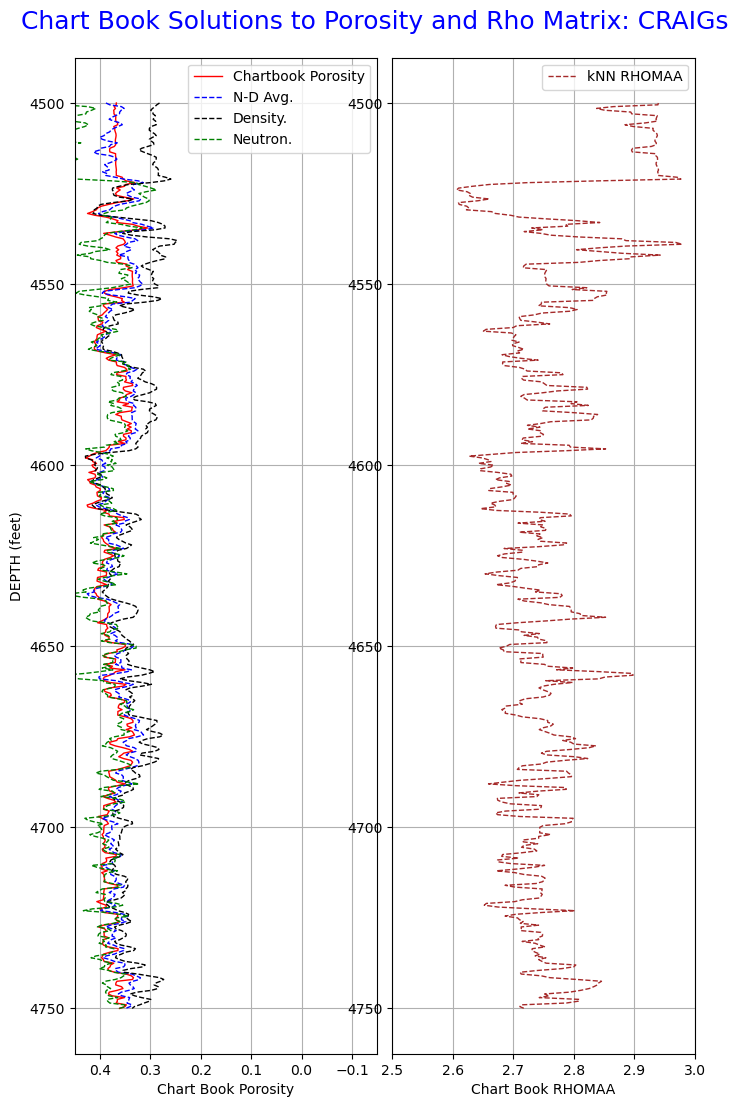

In [24]:
knn_Porosity_Plot()

# 3b) Optimize for Lithology

## Load mineral end point parameters for all logging tool:

In [25]:
responses_table = pd.read_excel("./data/log_responses.xlsx", index_col=0)

response_dict = responses_table.to_dict(orient="dict")

responses ={}
for i in response_dict:
    for j in response_dict[i]:
        responses[(j + "_" + i)] = response_dict[i][j]

#print(responses_table.head())
print()
#responses
pn.pane.DataFrame(responses_table, width=400)

DataFrame(DataFrame, width=400)

## Initialize Volumetric curves and set Optimization boundaries and constraints:

In [26]:
VOL_QUARTZ         = 0.2
VOL_CALCITE        = 0.2
VOL_DOLOMITE       = 0.2
VOL_SH             = 0.2
VOL_MUD            = 0.2



logs["GR_RECON"]   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
logs["NPHI_RECON"] = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
logs["RHOB_RECON"] = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
logs["DTC_RECON"]  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
logs["PEF_RECON"]  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]
logs['Error']      = 1

#Mineral volumen bounds
bnds = ((0, 1), (0, 1), (0, 0.1), (0, 1), (0, 0.45))


def constraint1(x):
    return x[0]+x[1]+x[2]+x[3]+x[4]-1

cons = [{"type": "eq", "fun": constraint1}]

logs.reset_index(inplace=True)



# What logging tools do you want to use in the Optimization?

In [27]:
optim_group = pn.widgets.CheckBoxGroup(
    name='Shale Indicators', value=['GR', 'NPHI','RHOB'], options = ["GR", "NPHI", "RHOB", "DT", "PEF"] ,
    inline=True)

print()
print('Select the logging tools you want to use in your Optimization process')
print()

optim_group


Select the logging tools you want to use in your Optimization process



CheckBoxGroup(inline=True, name='Shale Indicators', options=['GR', 'NPHI', ...], value=['GR', 'NPHI', 'RHOB'])

# Run this cell and all below:

## Read the table containing the components log responses and make a dictionary of responses.

In [28]:
possible_array = ['GR', 'NPHI', 'RHOB', 'DT', 'PEF']
final_array = optim_group.value

tools = {}

for i, tool in enumerate(possible_array):
    if tool in final_array:
        globals()[f"tool{i}"] = 1
        tools[f"tool{i}"] = 1
    else:
        globals()[f"tool{i}"] = 0
        tools[f"tool{i}"] = 0

#print(tools)

for key, value in tools.items():
    print(f"{key} = {value}")

tool0 = 1
tool1 = 1
tool2 = 1
tool3 = 0
tool4 = 0


## Calculate Magic Numbers used to weaight each log curve used in the optimizaton:
- First Calculate the mean of each log curve
- The magic number is the mean of the highest magnitude curve (GR) divided by the mean of the curve. 

### The tool0 type of multipliers are used to eliminate the unwanted tools from the analysis.

In [29]:
mean_GR = np.mean(logs["GR"])
#mean_GR

mean_NPHI = np.mean(logs["NPHI"])
#mean_NPHI

mean_RHOB = np.mean(logs["RHOB"])
#mean_RHOB

mean_PEF = np.mean(logs["PEF"])
#mean_PEF

mean_DTC = np.mean(logs["DTC"])
#mean_DTC

print("Mean GR =",mean_GR, ", Mean NPHI =", mean_NPHI,  ", Mean RHOB =",mean_RHOB,  ", Mean PEF =",mean_PEF,  ", Mean DTC =",mean_DTC)
print()
print("Magic Numbers: NPHI =",mean_GR/mean_NPHI, ", RHOB =",mean_GR/mean_RHOB, ", PEF =",mean_GR/mean_PEF, ", DTC =",mean_GR/mean_DTC)


GR_magic   = (mean_GR/mean_GR)*tool0
NPHI_magic = (mean_GR/mean_NPHI)*tool1
RHOB_magic = (mean_GR/mean_RHOB)*tool2
PEF_magic  = (mean_GR/mean_PEF)*tool3
DTC_magic  = (mean_GR/mean_DTC)*tool4


def error_recon(volumes, *args):

    VOL_QUARTZ, VOL_CALCITE, VOL_DOLOMITE, VOL_SH, VOL_MUD = volumes

    GR, NPHI, RHOB, DTC, PEF = args

    GR_RECON   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
    NPHI_RECON = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
    RHOB_RECON = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
    DTC_RECON  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
    PEF_RECON  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]


    #Some magic numbers to adjust the precision of differents magnitude orders (needs improvement)
    #return (GR-GR_RECON)**2 + (NPHI*300- NPHI_RECON*300)**2 + (RHOB*100 - 100*RHOB_RECON)**2 + (DTC - DTC_RECON)**2 + (PEF -PEF_RECON)**2
    #return (GR-GR_RECON)**2  + ((NPHI- NPHI_RECON)*(mean_GR/mean_NPHI))**2 + ((RHOB - RHOB_RECON)*(mean_GR/mean_RHOB))**2 + ((DTC - DTC_RECON)*(mean_GR/mean_DTC))**2 + ((PEF - PEF_RECON)*(mean_GR/mean_PEF))**2
    return (GR-GR_RECON)**2  + ((NPHI- NPHI_RECON)*(NPHI_magic))**2 + ((RHOB - RHOB_RECON)*(RHOB_magic))**2 + ((DTC - DTC_RECON)*(DTC_magic))**2 + ((PEF - PEF_RECON)*(PEF_magic))**2


Mean GR = 60.49736646706586 , Mean NPHI = 0.38760767864271456 , Mean RHOB = 2.1253644710578845 , Mean PEF = 3.439236127744511 , Mean DTC = 110.40270459081837

Magic Numbers: NPHI = 156.07886479160948 , RHOB = 28.464466820109088 , PEF = 17.590349781170943 , DTC = 0.5479699676858923


## Optimization:

In [30]:
for i in range(len(logs)):

    res = minimize(error_recon, ((0, 0, 0, 0, 0)), args=(logs.loc[i, "GR"], logs.loc[i, "NPHI"], logs.loc[i, "RHOB"], logs.loc[i, "DTC"], logs.loc[i, "PEF"]), bounds= bnds, constraints=cons)

    VOL_QUARTZ    = res.x[0]
    VOL_CALCITE   = res.x[1]
    VOL_DOLOMITE  = res.x[2]
    VOL_SH        = res.x[3]
    VOL_MUD       = res.x[4]
    
    logs.loc[i, "GR_RECON"]   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
    logs.loc[i, "NPHI_RECON"] = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
    logs.loc[i, "RHOB_RECON"] = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
    logs.loc[i, "DTC_RECON"]  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
    logs.loc[i, "PEF_RECON"]  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]

    logs.loc[i, "VOL_QUARTZ"]  = VOL_QUARTZ
    logs.loc[i, "VOL_CALCITE"] = VOL_CALCITE
    logs.loc[i, "VOL_DOLOMITE"]= VOL_DOLOMITE
    logs.loc[i, "VOL_SH"]      = VOL_SH
    logs.loc[i, "VOL_MUD"]     = VOL_MUD
    
    
    rhob_norm = (logs.loc[i,"RHOB"] - 1.9)/(3.0 - 1.9)
    rhob_norm_theo = (logs.loc[i, "RHOB_RECON"] - 1.9)/(3.0 - 1.9)
    tnph_norm = ((logs.loc[i,"NPHI"] - (-0.05))/(0.6 - (-0.05)))
    tnph_norm_theo = (logs.loc[i, "NPHI_RECON"] - (-0.05))/(0.6 - (-0.05))    
    gr_norm = ( logs.loc[i, "GR"] -  0)/(200 - 0)
    gr_norm_theo = (logs.loc[i, "GR_RECON"] - 0)/(200 - 0)    
    pef_norm = ( logs.loc[i, "PEF"] -  1)/(6 - 1)
    pef_norm_theo = (logs.loc[i, "PEF_RECON"] - 1)/(6 - 1)    
    dtc_norm = ( logs.loc[i, "DTC"] -  40)/(140 - 40)
    dtc_norm_theo = (logs.loc[i, "DTC_RECON"] - 40)/(140 - 40)    


    #logs.loc[i, "Error"] = (0.333*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo)+(gr_norm-gr_norm_theo)+(pef_norm-pef_nor+(dtc_norm-dtc_norm_theo)))
    # Removed PEF because it is the same as RHOB and probably only there as a place holer for PEF
    logs.loc[i, "Error"] = (abs((( gr_norm-gr_norm_theo)*tool0
                                +  (tnph_norm-tnph_norm_theo)*tool1
                                +  (rhob_norm-rhob_norm_theo)*tool2
                                +  (dtc_norm-dtc_norm_theo)*tool3
                                +  (pef_norm-pef_norm_theo)*tool4 )))

 
print()
print(logs['Error'].describe())    
print()


count    5.010000e+02
mean     5.306572e-02
std      5.052736e-02
min      5.895686e-09
25%      1.773736e-02
50%      4.485251e-02
75%      7.274195e-02
max      2.979134e-01
Name: Error, dtype: float64



In [31]:
def Plot_lith():
    
    fig = plt.figure(figsize=(20, 10))

    ax =[]

    ax.append(fig.add_subplot(1, 9, (1, 1)))
    ax.append(fig.add_subplot(1, 9, (2, 2), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (3, 3), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (4, 4), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (5, 5), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (6, 6), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (7, 7), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (8, 8), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (9, 9), sharey=ax[0]))


    ax[0].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
    ax[0].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(50))
    ax[0].invert_yaxis()
    ax[0].plot(logs["GR"], logs["DEPT"], color="green")
    ax[0].set_xlabel("GR [°API]", color="green")
    ax[0].tick_params(which="both", top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[0].xaxis.set_label_position("top")
    ax[0].set_xlim(0, 200)
    ax[0].grid(True, which="both")


    t1 = ax[1].twiny()
    t1.plot(logs["RHOB"], logs["DEPT"], color="red")
    t1.set_xlabel("RHOB [g/cc]", color ="red")
    t1.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t1.xaxis.set_label_position("top")
    t1.spines.top.set_position(("axes",1.1))
    t1.set_xlim(1.95, 2.95)


    #t2 = ax[1].twiny()
    #t2.plot(logs["DTC"], logs["DEPT"], color="green")
    #t2.set_xlabel("DTC [us/ft]")
    #t2.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    #t2.xaxis.set_label_position("top")

    #t2.spines.top.set_position(("axes",1.06))
    #t2.set_xlim(140, 40)

    ax[1].plot(logs["NPHI"], logs["DEPT"], color="blue")
    ax[1].set_xlabel("NPHI [v/v]", color="blue")
    ax[1].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[1].xaxis.set_label_position("top")
    ax[1].set_xlim(0.45, -0.05)
    ax[1].grid(True, which="both")

    #ax[2].semilogx(logs["ILD"], logs["DEPT"], color="black")
    ax[2].plot(logs["ILD"], logs["DEPT"], "--", color="black")
    ax[2].set_xscale('log')    
    ax[2].set_xlabel("ILD [ohm*m]")
    ax[2].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[2].xaxis.set_label_position("top")
    ax[2].set_xlim(.2, 200)
    ax[2].grid(True, which="both")


    ax[3].plot(logs["GR"], logs["DEPT"], "--", color="black")
    ax[3].plot(logs["GR_RECON"], logs["DEPT"], "-", color="red")
    ax[3].set_xlim(0, 200)
    ax[3].set_xlabel("GR [°API]\n recon", color ="red")
    ax[3].xaxis.set_label_position("top")
    ax[3].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[3].grid(True, which="both")

    
    ax[4].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[4].set_xlabel("NPHI [v/v]\n recon", color ="red")
    ax[4].xaxis.set_label_position("top")
    ax[4].plot(logs["NPHI"], logs["DEPT"], "--", color="black")
    ax[4].plot(logs["NPHI_RECON"], logs["DEPT"], "-", color="red")
    ax[4].set_xlim(0.45, -0.05)
    ax[4].grid(True, which="both")


    ax[5].set_xlabel("RHOB [g/cc]\n recon", color ="red")
    ax[5].xaxis.set_label_position("top")
    ax[5].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[5].plot(logs["RHOB"], logs["DEPT"], "--", color="black")
    ax[5].plot(logs["RHOB_RECON"], logs["DEPT"], "-", color="red")
    ax[5].set_xlim(1.95, 2.95)
    ax[5].grid(True, which="both")


    ax[6].set_xlabel("DTC [us/ft]\n recon", color ="red")
    ax[6].xaxis.set_label_position("top")
    ax[6].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[6].plot(logs["DTC"], logs["DEPT"], "--", color="black")
    ax[6].plot(logs["DTC_RECON"], logs["DEPT"], "-", color="red")
    ax[6].set_xlim(140, 40)
    ax[6].grid(True, which="both")

    #ax[7].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    #ax[7].plot(logs["PEF"], logs["DEPT"], "--", color="black")
    #ax[7].plot(logs["PEF_RECON"], logs["DEPT"], "-", color="red")
    #ax[7].set_xlim(0, 5)


    ax[7].set_xlabel("VOL_SH [v/v]")
    ax[7].xaxis.set_label_position("top")
    ax[7].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[7].plot(logs["VOL_SH"]                                                             , logs["DEPT"], color="black",  linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']                                          , logs["DEPT"], color="black", linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']                      , logs["DEPT"], color="black", linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'] , logs["DEPT"], color="black", linewidth=0)
    ax[7].set_xlim(0, 1)
    ax[7].fill_betweenx(logs["DEPT"], 0.0                                                  , logs["VOL_SH"]                                                            , facecolor='#d1d1d1' , hatch='-.-.',label= 'VOL_SH')
    ax[7].fill_betweenx(logs["DEPT"], logs["VOL_SH"]                                       , logs["VOL_SH"]+logs['VOL_QUARTZ']                                         , facecolor='#ffff00' ,hatch='..',label='VOL_QUARTZ')
    ax[7].fill_betweenx(logs["DEPT"], logs["VOL_SH"]+logs['VOL_QUARTZ']                    , logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']                     , facecolor='#00ffff' ,hatch='|-|-',label='VOL_CALCITE')
    ax[7].fill_betweenx(logs['DEPT'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'], facecolor='#00ff00' ,hatch='/-/-',label='VOL_DOLOMITE')
    ax[7].fill_betweenx(logs['DEPT'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'] ,1, color="black")
    ax[7].legend(loc='upper left')


    #ax[7].fill_betweenx(logs["DEPT"], 0.5, logs["VOL_SH"], where=logs["VO L_SH"]>0.5, color="gray", alpha=0.5)

    ax[8].set_xlabel("PHIT [v/v]")
    ax[8].xaxis.set_label_position("top")
    ax[8].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[8].plot(logs["VOL_MUD"], logs["DEPT"], "-", color="black")
    ax[8].set_xlim(0.5, 0.)
    #ax[8].fill_betweenx(logs["DEPT"], 0.12, logs["VOL_MUD"], where=logs["VOL_MUD"]>0.12, color="green", alpha=1, label = "PHIT")
    ax[8].fill_betweenx(logs["DEPT"], 0.0, logs["VOL_MUD"], color="cyan", alpha=1, label = "PHIT")
    ax[8].fill_betweenx(logs["DEPT"], 0.12, logs["VOL_MUD"], where=logs["VOL_MUD"]>0.12, color="olive", alpha=1, label = "Net Res")  
    #ax[8].plot(logs["Error"], logs["DEPT"], color="red")
    #ax[8].fill_betweenx(logs["DEPT"], 0.0, logs["Error"], color="red", alpha=1.0, label = "Error")
    ax[8].legend(loc='upper left')
    ax[8].grid(True, which="both")

    #fig.tight_layout()
    fig.savefig("fig1.png", bbox_inches="tight")


    plt.show()
    return fig

# Lith Plot:

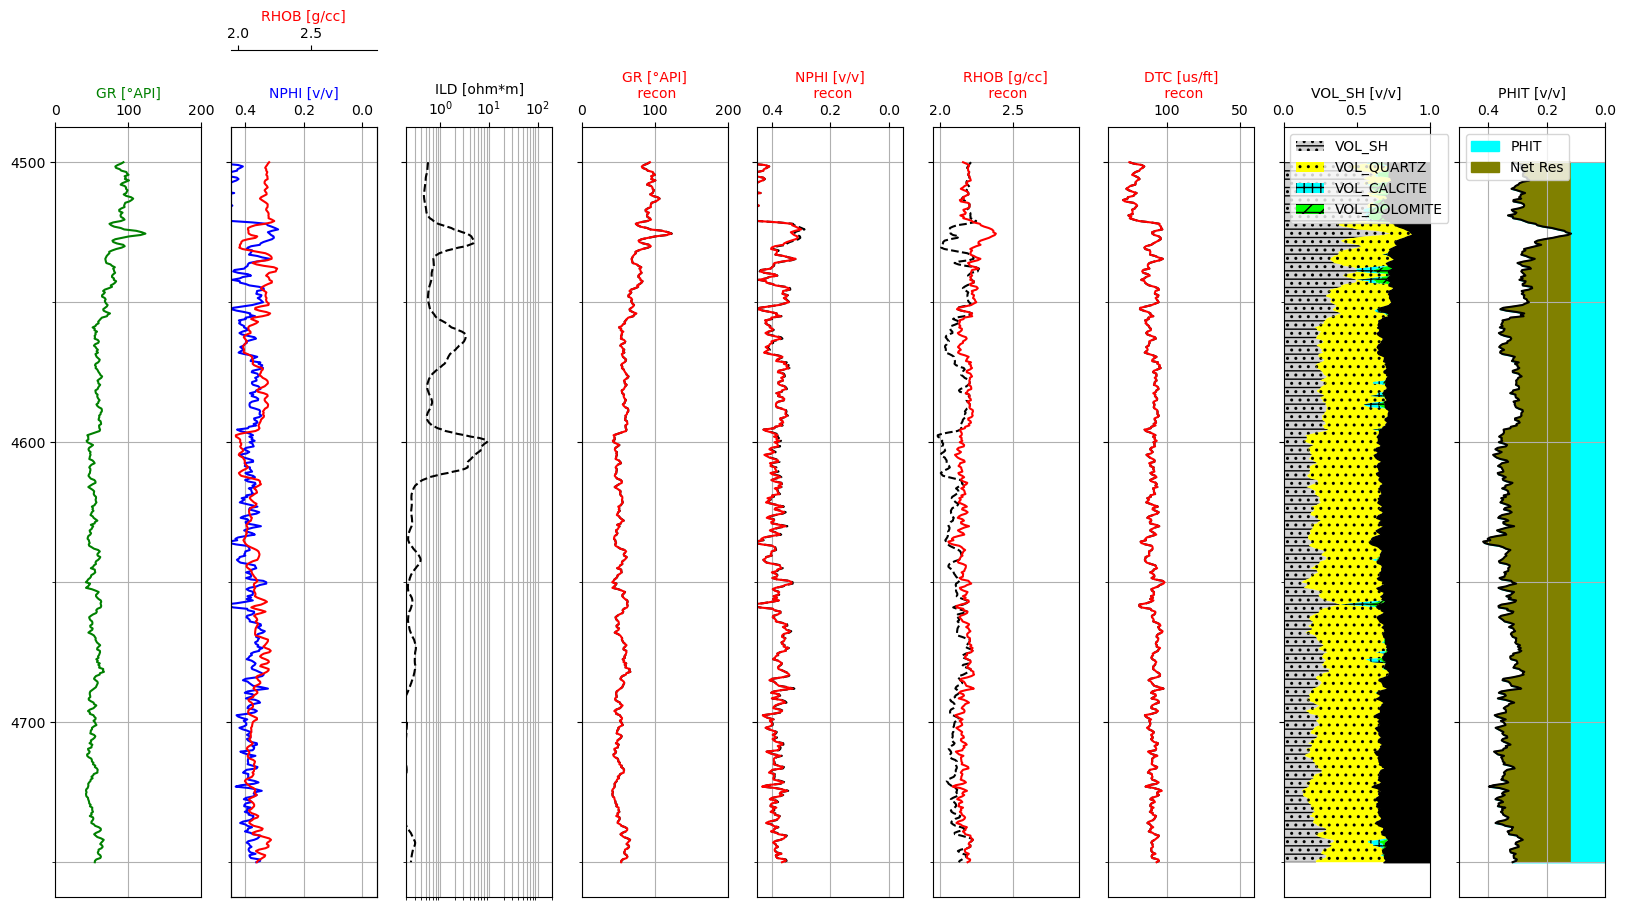

In [32]:
Plot_lith()

# 4) Calculate Shale Volumes

### Plot Definition files:

In [33]:
'''
Final Shale Parameters:
'''

def shale_plot3( sp_clean, sp_shale, gr_clean, gr_shale, neut_shale, dt_matrix, dt_shale):
    
    # =============================================================================
    # We will create several displays (GR,SP vs DEPTH track, histograms, N-D
    # crossplot, vsh track) in order to see and choose the right parameters
    # for our clay/clean formations as well as to compare the results of all
    # vsh methods calculated above.
    # =============================================================================



    #logs=data.iloc[[top_depth],[bottom_depth]]
    #logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    #print (logs.GR,logs.LLD)
    #Setting GRAPH ELEMENTS

    fig = plt.figure(figsize=(20,12.9))
    #fig.suptitle('Shale Parameter Plot: Volume of Shale from Different Methods',color='blue' , fontsize=18)
    #fig.subplots_adjust(top=0.85,wspace=0.3, hspace =0.3)

    gs = gridspec.GridSpec(4, 4)
    ax1 = fig.add_subplot(gs[:,0])
    ax3 = fig.add_subplot(gs[0,1])
    ax2 = fig.add_subplot(gs[1,1])
    ax4 = fig.add_subplot(gs[2,1])
    ax5 = fig.add_subplot(gs[3,1])
    ax6 = fig.add_subplot(gs[:,2],sharey = ax1)
    ax7 = fig.add_subplot(gs[:,3])
 

    # Graph for GR,SP
    #ax1.twiny()
    ax1.invert_yaxis()
    ax1.grid(True)
    ax1.set_ylabel('DEPTH')
    ax1.plot(logs.GR, logs.DEPT, color='green',linewidth = 3.0,label= 'GR')
    #ax1.set_xlabel('GR [api]', color='green')
    ax1.axvline(x=gr_clean,  color='blue',  linestyle='-',linewidth = 3.0, label= 'gr_clean')
    ax1.axvline(x=gr_shale,  color='brown', linestyle='-.',linewidth = 3.0, label= 'gr_shale')
    #ax1.legend()
 
    #ax1=ax1.twiny()
    ax1.plot(logs.SP, logs.DEPT, color='black', linewidth = 3.0,label= 'SP')
    ax1.set_title('SP                     GR', color = 'blue')
    ax1.set_xlabel("SP [mV],  GR [api]",color='black')
    ax1.axvline(x=sp_clean,  color='red',   linestyle='-',linewidth = 3.0, label= 'sp_clean')
    ax1.axvline(x=sp_shale,  color='gray' ,  linestyle='-',linewidth = 3.0, label= 'sp_shale')
    ax1.legend()


    #The histogram of GR
    ax2.hist(logs.GR.dropna(),bins=20,color='green')
    ax2.axvline(x=gr_clean,  color='blue',  linestyle='-', label= 'gr_clean')
    ax2.axvline(x=gr_shale,  color='brown', linestyle='-.', label= 'gr_shale')
    #ax2.fill_betweenx(logs.GR, gr_clean, gr_shale,color='yellow',label= 'GR',alpha=0.1)    
    ax2.axvspan(gr_clean,gr_shale,alpha=0.1,color='yellow',label='GR')
    ax2.set_xlim(0,150)
    ax2.set_title('GR [api] Histogram', color ='green')
    #ax2.set_xlabel('GR [api]')
    ax2.set_ylabel('Frequency')
    ax2.grid(True)

    #The histogram of SP  
    ax3.hist(logs.SP.dropna(),bins=20, color='black')
    ax3.set_xlim(-75,25)
    ax3.set_title('SP [mV] Histogram', color = 'black')    
    #ax3.set_xlabel('SP [mV]')
    ax3.set_ylabel('Frequency')
    ax3.axvline(x=sp_clean,  color='red'  ,  linestyle='-',linewidth = 3.0, label= 'sp_clean')
    ax3.axvline(x=sp_shale,  color='gray' ,  linestyle='-',linewidth = 3.0, label= 'sp_shale')
    #ax3.fill_betweenx(logs.GR, sp_clean, sp_shale,  color='gray',label= 'SP',alpha=0.1)    
    ax3.axvspan(sp_clean,sp_shale,alpha=0.1,color='yellow',label='SP')
    ax3.grid(True)

    # N-MPHI XPlot for Volume of Shale
    ax4.plot(logs.NPHI, logs.MPHI,'ro',markersize=4)
    ax4.set_title('NPHI - MPHI Xplot', color = 'blue')
    #ax4.set_xlabel('NPHI [v/v]')
    ax4.set_xlim(-.05,1.0)
    ax4.set_ylim(0,1.0)
    ax4.set_ylabel('MPHI [V/V]')
    ax4.grid(True)
    ax4.text(0.05, 0, 'clean line', color='red', fontsize=8)
    ax4.text(neut_shale, 0, 'shale point',color='red', fontsize=8)
    ax4.text(1, 1, 'fluid point',color='red', fontsize=8)

    # Plot Shale Triangle N-Mphi
    ax4.plot([neut_matrix,neut_fl],[0,1], marker='o', color='blue') # this is clean line
    ax4.plot([neut_matrix,neut_shale],[0,mphi_shale], marker='o', color='blue') #this is to the shale point
    ax4.plot([neut_shale,1],[mphi_shale,1], marker='o', color='blue') #this is from the shale point to 100% porosity line
    ax4.plot(neut_shale,mphi_shale,'bo')#,color='blue')

    ax4.fill_between([0,0], [1,1], [neut_shale,mphi_shale], color='yellow', alpha=0.1)    
  
    
    # N-D XPlot for Volume of Shale
    ax5.plot(logs.NPHI, logs.RHOB,'ro',markersize=4)
    ax5.set_title('NPHI - RHOB Xplot', color = 'blue')
    ax5.set_xlabel('NPHI [v/v]')
    ax5.set_xlim(-.05,1.0)
    ax5.set_ylim(3,1.0)
    ax5.set_ylabel('RHOB [g/cc]')
    ax5.grid(True)
    ax5.text(0.05, 2.1, 'clean line', color='red', fontsize=8)
    ax5.text(neut_shale, 2.95, 'shale point',color='red', fontsize=8)
    ax5.text(0.6, 1.2, 'fluid point',color='red', fontsize=8)

    # Plot Shale Triangle N-D
    ax5.plot([neut_matrix,neut_fl],[den_matrix,den_fl], marker='o', color='blue') # this is clean line
    ax5.plot([neut_matrix,neut_shale],[den_matrix,den_shale], marker='o', color='blue') #this is to the shale point
    ax5.plot([neut_shale,1],[den_shale,den_fl], marker='o', color='blue') #this is from the shale point to 100% porosity line
    ax5.plot(neut_shale,den_shale,'bo')#,color='blue')

    ax5.fill_between([0,2.65], [1,1], [neut_shale,2.65], color='yellow', alpha=0.1)    
    
    
    ''' Endpoint Parameters for Neutron-Density Shale Triangle
    neut_shale, den_shale   = 0.32 , 2.65                           # Shale Parmaters for Neutron-Density
    neut_matrix, den_matrix = -0.04 , 2.65                          # Matrix Parmameters for Neutron-Density
    neut_fl, den_fl         =  1.0 , 1.1                            # Fluid Parmameters for Neutron-Density
   '''

    #plt.title("Volume of Shale")
    #ax6.twiny()    
    ax6.plot(vshgr(logs.GR, gr_clean, gr_shale), logs.DEPT, label ='Vsh_GR',color="green", linewidth = 3.0)
    ax6.plot(vshnd(logs.NPHI,logs.RHOB,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale), logs.DEPT,label ='Vsh_ND',color="red")
    ax6.plot(vshsp(logs.SP, sp_clean, sp_shale), logs.DEPT,label ='Vsh_SP',color="black", linewidth = 3.0)
    ax6.plot(vshdt(logs.DT, dt_matrix, dt_shale), logs.DEPT,label ='Vsh_DT',color="blue", linewidth = 1.0)
    ax6.plot(vshdtden(logs.DT,logs.RHOB,  dt_matrix,den_matrix,  dt_fluid,den_fl,  dt_shale,den_shale), logs.DEPT,label ='Vsh_DT_Den',color="olive", linewidth = 1.0)
    ax6.plot(logs.VOL_SH, logs.DEPT,label ='Vsh Optim',color="orange", linewidth = 3.0)
    ax6.plot(vshnmphi(logs.NPHI, logs.MPHI , neut_shale, mphi_shale), logs.DEPT,label ='Vsh_NeutMphi',color="cyan", linewidth = 3.0)
    ax6.set_title('Calculated Shale Volumes', color = 'blue')
    ax6.legend(loc='best',fontsize='x-small')
    ax6.set_xlim(0,1)
    ax6.set_ylim(top_depth,bottom_depth)
    ax6.invert_yaxis()
    ax6.grid(True)
    ax6.set_xlabel('Vsh [v.v]')

    
    '''
    #plt.title("Volume of Shale")
    #ax6.twiny()    
    ax6.plot(vshgr(logs.GR, gr_clean, gr_shale), logs.DEPT, label ='Vsh_GR',color="green", linewidth = 1.0)
    ax6.plot(vshnd(logs.NPHI,logs.RHOB,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale), logs.DEPT,label ='Vsh_ND',color="red", linewidth = 1.0)
    ax6.plot(vshsp(logs.SP, sp_clean, sp_shale), logs.DEPT,label ='Vsh_SP',color="black", linewidth = 1.0)
    ax6.plot(vshdt(logs.DT, dt_matrix, dt_shale), logs.DEPT,label ='Vsh_DT',color="blue", linewidth = 1.0)
    ax6.plot(vshdtden(logs.DT,logs.RHOB,  dt_matrix,den_matrix,  dt_fluid,den_fl,  dt_shale,den_shale), logs.DEPT,label ='Vsh_DT_Den',color="olive", linewidth = 1.0)
    ax6.plot(logs.VOL_SH, logs.DEPT,label ='Vsh Optim',color="orange", linewidth = 1.0)
    
    #(n,k,  dt_matrix,den_matrix,  dt_fluid,den_fl,  dt_shale,den_shale)
    #ax6.plot(vshnmphi(logs.NPHI, logs.MPHI , neut_shale, mphi_shale), logs.DEPT,label ='Vsh_NeutMphi',color="blue", linewidth = 3.0)
    ax6.set_title('Calculated Shale Volumes', color = 'blue')
    ax6.legend(loc='best',fontsize='x-small')
    ax6.set_xlim(0,1)
    ax6.set_ylim(top_depth,bottom_depth)
    ax6.invert_yaxis()
    ax6.grid(True)
    ax6.set_xlabel('Vsh [v.v]')
   
    '''
    
    #ax7.twiny()
    ax7.grid(True)
    ax7.set_xlim(0.5,0)
    ax7.set_ylim(top_depth,bottom_depth)
    ax7.invert_yaxis()
    #ax7.spines['top'].set_position(('outward',40))
    ax7.set_title('MRIL Log', color = 'blue')
    ax7.set_xlabel('MBVI[v/v]')
    ax7.plot(logs.MBVI, logs.DEPT, label='MBVI[v/v]', color='black')
    ax7.plot(logs.MPHI, logs.DEPT, label='MPHI[v/v]', color='black')
    ax7.set_xlabel('MBVI[v/v]', color='black')    
    #ax7.tick_params(axis='x', colors='black')
    ax7.fill_betweenx(logs.DEPT,logs.MBVI, 0,color='blue',label= 'MBVI')
    ax7.fill_betweenx(logs.DEPT,logs.MPHI, logs.MBVI,color='yellow',label= 'Free Fluid')    
    
    
    
    #plt.savefig ('vsh_plot.png', dpi=200, format='png')

    # =============================================================================
    # Use the histrograms to re-evaluate: - GR min, max (clean, clay) - SP
    # min, max (clean, clay) - RT min, max (clean, clay) From ND Xplot extract
    # the clean line and clay point.
    # 
    # All vshgr (you can apply any correction here), vshsp, vshrt and vshnd
    # curves are plotted in the same track for comparison. It is obvious that
    # the vshgr and vshnd match very well, comparing with the rest.
    # 
    # To simplify the intepretation we will accept the vshgr as the vsh.
    # Another approch is to consider vsh as the minimum value obtained through
    # several methods (vsh = min (vshgr,vshsp,vshnd)) or Hodges-Lehman Median Filter
    # =============================================================================

    return fig


In [34]:
'''
Final Shale Parameters:
'''

def shale_plot4(sp_clean, sp_shale, gr_clean, gr_shale, neut_shale):
    
    # =============================================================================
    # We will create several displays (GR,SP vs DEPTH track, histograms, N-D
    # crossplot, vsh track) in order to see and choose the right parameters
    # for our clay/clean formations as well as to compare the results of all
    # vsh methods calculated above.
    # =============================================================================



    #logs=data.iloc[[top_depth],[bottom_depth]]
    #logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    #print (logs.GR,logs.LLD)
    #Setting GRAPH ELEMENTS

    fig = plt.figure(figsize=(20,15))
    #fig.suptitle('Shale Parameter Plot: Volume of Shale from Different Methods',color='blue' , fontsize=18)
    #fig.subplots_adjust(top=0.85,wspace=0.3, hspace =0.3)

    gs = gridspec.GridSpec(4, 4)
    ax1 = fig.add_subplot(gs[:,0])
    ax3 = fig.add_subplot(gs[0,1])
    ax2 = fig.add_subplot(gs[1,1])
    ax4 = fig.add_subplot(gs[2,1])
    ax5 = fig.add_subplot(gs[3,1])
    ax6 = fig.add_subplot(gs[:,2],sharey = ax1)
    ax7 = fig.add_subplot(gs[:,3])
 

    # Graph for GR,SP
    #ax1.twiny()
    ax1.invert_yaxis()
    ax1.grid(True)
    ax1.set_ylabel('DEPTH')
    ax1.plot(logs.GR, logs.DEPT, color='green',linewidth = 3.0,label= 'GR')
    #ax1.set_xlabel('GR [api]', color='green')
    ax1.axvline(x=gr_clean,  color='blue',  linestyle='-',linewidth = 3.0, label= 'gr_clean')
    ax1.axvline(x=gr_shale,  color='brown', linestyle='-.',linewidth = 3.0, label= 'gr_shale')
    #ax1.legend()
 
    #ax1=ax1.twiny()
    ax1.plot(logs.SP, logs.DEPT, color='black', linewidth = 3.0,label= 'SP')
    ax1.set_title('SP                     GR', color = 'blue')
    ax1.set_xlabel("SP [mV],  GR [api]",color='black')
    ax1.axvline(x=sp_clean,  color='red',   linestyle='-',linewidth = 3.0, label= 'sp_clean')
    ax1.axvline(x=sp_shale,  color='gray' ,  linestyle='-',linewidth = 3.0, label= 'sp_shale')
    ax1.legend()


    #The histogram of GR
    ax2.hist(logs.GR.dropna(),bins=20,color='green')
    ax2.axvline(x=gr_clean,  color='blue',  linestyle='-', label= 'gr_clean')
    ax2.axvline(x=gr_shale,  color='brown', linestyle='-.', label= 'gr_shale')
    #ax2.fill_betweenx(logs.GR, gr_clean, gr_shale,color='yellow',label= 'GR',alpha=0.1)    
    ax2.axvspan(gr_clean,gr_shale,alpha=0.1,color='yellow',label='GR')
    ax2.set_xlim(0,150)
    ax2.set_title('GR [api] Histogram', color ='green')
    #ax2.set_xlabel('GR [api]')
    ax2.set_ylabel('Frequency')
    ax2.grid(True)

    #The histogram of SP  
    ax3.hist(logs.SP.dropna(),bins=20, color='black')
    ax3.set_xlim(-75,25)
    ax3.set_title('SP [mV] Histogram', color = 'black')    
    #ax3.set_xlabel('SP [mV]')
    ax3.set_ylabel('Frequency')
    ax3.axvline(x=sp_clean,  color='red'  ,  linestyle='-',linewidth = 3.0, label= 'sp_clean')
    ax3.axvline(x=sp_shale,  color='gray' ,  linestyle='-',linewidth = 3.0, label= 'sp_shale')
    #ax3.fill_betweenx(logs.GR, sp_clean, sp_shale,  color='gray',label= 'SP',alpha=0.1)    
    ax3.axvspan(sp_clean,sp_shale,alpha=0.1,color='yellow',label='SP')
    ax3.grid(True)

    # N-MPHI XPlot for Volume of Shale
    ax4.plot(logs.NPHI, logs.MPHI,'ro',markersize=4)
    ax4.set_title('NPHI - MPHI Xplot', color = 'blue')
    #ax4.set_xlabel('NPHI [v/v]')
    ax4.set_xlim(-.05,1.0)
    ax4.set_ylim(0,1.0)
    ax4.set_ylabel('MPHI [V/V]')
    ax4.grid(True)
    ax4.text(0.05, 0, 'clean line', color='red', fontsize=8)
    ax4.text(neut_shale, 0, 'shale point',color='red', fontsize=8)
    ax4.text(1, 1, 'fluid point',color='red', fontsize=8)

    # Plot Shale Triangle N-Mphi
    ax4.plot([neut_matrix,neut_fl],[0,1], marker='o', color='blue') # this is clean line
    ax4.plot([neut_matrix,neut_shale],[0,mphi_shale], marker='o', color='blue') #this is to the shale point
    ax4.plot([neut_shale,1],[mphi_shale,1], marker='o', color='blue') #this is from the shale point to 100% porosity line
    ax4.plot(neut_shale,mphi_shale,'bo')#,color='blue')

    ax4.fill_between([0,0], [1,1], [neut_shale,mphi_shale], color='yellow', alpha=0.1)    
  
    
    # N-D XPlot for Volume of Shale
    ax5.plot(logs.NPHI, logs.RHOB,'ro',markersize=4)
    ax5.set_title('NPHI - RHOB Xplot', color = 'blue')
    ax5.set_xlabel('NPHI [v/v]')
    ax5.set_xlim(-.05,1.0)
    ax5.set_ylim(3,1.0)
    ax5.set_ylabel('RHOB [g/cc]')
    ax5.grid(True)
    ax5.text(0.05, 2.1, 'clean line', color='red', fontsize=8)
    ax5.text(neut_shale, 2.95, 'shale point',color='red', fontsize=8)
    ax5.text(0.6, 1.2, 'fluid point',color='red', fontsize=8)

    # Plot Shale Triangle N-D
    ax5.plot([neut_matrix,neut_fl],[den_matrix,den_fl], marker='o', color='blue') # this is clean line
    ax5.plot([neut_matrix,neut_shale],[den_matrix,den_shale], marker='o', color='blue') #this is to the shale point
    ax5.plot([neut_shale,1],[den_shale,den_fl], marker='o', color='blue') #this is from the shale point to 100% porosity line
    ax5.plot(neut_shale,den_shale,'bo')#,color='blue')

    ax5.fill_between([0,2.65], [1,1], [neut_shale,2.65], color='yellow', alpha=0.1)    
    
    
    ''' Endpoint Parameters for Neutron-Density Shale Triangle
    neut_shale, den_shale   = 0.32 , 2.65                           # Shale Parmaters for Neutron-Density
    neut_matrix, den_matrix = -0.04 , 2.65                          # Matrix Parmameters for Neutron-Density
    neut_fl, den_fl         =  1.0 , 1.1                            # Fluid Parmameters for Neutron-Density
   '''

    #plt.title("Volume of Shale")
    #ax6.twiny()    
    ax6.plot(logs.vshgr, logs.DEPT, label ='Vsh_GR',color="green", linewidth = 3.0)
    ax6.plot(logs.vshnd, logs.DEPT,label ='Vsh_ND',color="red")
    ax6.plot(logs.vshsp, logs.DEPT,label ='Vsh_SP',color="black", linewidth = 1.0)
    ax6.plot(logs.vshnmphi, logs.DEPT,label ='Vsh_NeutMphi',color="blue", linewidth = 3.0)
    ax6.plot(logs.vshdt, logs.DEPT,label ='Vsh_DT',color="blue", linewidth = 1.0)
    ax6.plot(logs.vshdtden, logs.DEPT,label ='Vsh_DT_Den',color="olive", linewidth = 1.0)
    ax6.plot(logs.VOL_SH, logs.DEPT,label ='Vsh Optimization',color="orange", linewidth = 3.0)
    ax6.plot(logs.vshmedian, logs.DEPT,label ='Vsh Median',color="purple", linewidth = 5.0)
    ax6.plot(logs.vsh_hl, logs.DEPT,label ='Vsh Hodg-Lehman',color="cyan", linewidth = 5.0)
    ax6.set_title('Calculated Shale Volumes', color = 'blue')
    ax6.legend(loc='best',fontsize='x-small')
    ax6.set_xlim(0,1)
    ax6.set_ylim(top_depth,bottom_depth)
    ax6.invert_yaxis()
    ax6.grid(True)
    ax6.set_xlabel('Vsh [v.v]')

    
 
    
    #ax7.twiny()
    ax7.grid(True)
    ax7.set_xlim(0.5,0)
    ax7.set_ylim(top_depth,bottom_depth)
    ax7.invert_yaxis()
    #ax7.spines['top'].set_position(('outward',40))
    ax7.set_title('MRIL Log', color = 'blue')
    ax7.set_xlabel('MBVI[v/v]')
    ax7.plot(logs.MBVI, logs.DEPT, label='MBVI[v/v]', color='black')
    ax7.plot(logs.MPHI, logs.DEPT, label='MPHI[v/v]', color='black')
    ax7.set_xlabel('MBVI[v/v]', color='black')    
    #ax7.tick_params(axis='x', colors='black')
    ax7.fill_betweenx(logs.DEPT,logs.MBVI, 0,color='blue',label= 'MBVI')
    ax7.fill_betweenx(logs.DEPT,logs.MPHI, logs.MBVI,color='yellow',label= 'Free Fluid')    
    
    
    
    #plt.savefig ('vsh_plot.png', dpi=200, format='png')

    # =============================================================================
    # Use the histrograms to re-evaluate: - GR min, max (clean, clay) - SP
    # min, max (clean, clay) - RT min, max (clean, clay) From ND Xplot extract
    # the clean line and clay point.
    # 
    # All vshgr (you can apply any correction here), vshsp, vshrt and vshnd
    # curves are plotted in the same track for comparison. It is obvious that
    # the vshgr and vshnd match very well, comparing with the rest.
    # 
    # To simplify the intepretation we will accept the vshgr as the vsh.
    # Another approch is to consider vsh as the minimum value obtained through
    # several methods (vsh = min (vshgr,vshsp,vshnd)) or Hodges-Lehman Median Filter
    # =============================================================================

    return fig

    


In [35]:
"""
===============================================================================
 === 3. Calculate Volume of Shale
 
 The first step of a basic well log analysis will begin with the volume
 of Shale calculation.
 
 There are several methods used to perform that, clasified as: - Single
 methods: Gamma Ray Log, Spontaneous Potential, vshrt or by - Dual
 Methods: Neutron-Density, it is based on a N-D Crossplot, where a clean
 line and a clay point will be defined, as you will see in the graphs
 below.
===============================================================================
"""
#vshgr
#---the setup below is correction = None or linear GR as recommended by Heslep
def vshgr(gr_log, gr_clean, gr_shale, correction=None):

    igr=(gr_log-gr_clean)/(gr_shale-gr_clean)      #Linear Gamma Ray
    vshgr_larionov_young=0.083*(2**(3.7*igr)-1)   #Larionov (1969) - Tertiary rocks
    vshgr_larionov_old=0.33*(2**(2*igr)-1)        #Larionov (1969) - Older rocks
    vshgr_clavier=1.7-(3.38-(igr+0.7)**2)**0.5    #Clavier (1971)
    vshgr_steiber=0.5*igr/(1.5-igr)               #Steiber (1969) - Tertiary rocks

    if correction == "young":
        vshgr=vshgr_larionov_young
    elif correction == "older":
        vshgr=vshgr_larionov_old
    elif correction=="clavier":
        vshgr=vshgr_clavier
    elif correction=="steiber":
        vshgr=vshgr_steiber
    else:
        vshgr=igr
    return vshgr

def vshgr2(gr_log, gr_clean, gr_shale):
    (gr_log - gr_clean)/(gr_shale - gr_clean)      #Linear Gamma Ray
    return vshgr

#vshsp
def vshsp(sp_log, sp_clean, sp_shale):
    vshsp=(sp_log-sp_clean)/(sp_shale-sp_clean)
    return vshsp

#dt_matrix, dt_fluid, dt_shale
#vsh dt
def vshdt(dt_log, dt_matrix, dt_shale):
    vshdt=(dt_log - dt_matrix)/(dt_shale-dt_matrix)
    return vshdt


#vshrt
def vshrt(rt_log, rt_clean,rt_shale):
    vrt=(rt_shale/rt_log)*(rt_clean-rt_log)/(rt_clean-rt_shale)
    if (rt_log > 2* rt_shale):
        vshrt = 0.5 * (2 * vrt)** (0.67*(vrt+1)) 
    else:
        vshrt = vrt
    return vshrt


#vshnd
def vshnd(neut_log,den_log,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale):
    term1 = (den_fl-den_matrix)*(neut_log-neut_matrix)-(den_log-den_matrix)*(neut_fl-neut_matrix)
    term2 =(den_fl-den_matrix)*(neut_shale-neut_matrix)-(den_shale-den_matrix)*(neut_fl-neut_matrix)
    vshnd=term1/term2
    return vshnd

# vsh Dt vs. bulk density
def vshdtden(dt_log,den_log,  dt_matrix,den_matrix,  dt_fluid,den_fl,  dt_shale,den_shale):
    term1 = (den_fl - den_matrix)*(dt_log-dt_matrix)   - (den_log - den_matrix)*(dt_fluid - dt_matrix)
    term2 = (den_fl - den_matrix)*(dt_shale-dt_matrix) - (den_shale-den_matrix)*(dt_fluid - dt_matrix)
    vshdtden=term1/term2
    return vshdtden



#vsh_Neutron_MPHI
def vshnmphi(nphi, mphi , nphi_sh, mphi_sh):
    #--------------------------------------------------
    #
    #    COMPUTE VSH FROM MPHI-NPHI Shale TRIANGLE 
    #
    #--------------------------------------------------    
    #mphi_shale = 0.0
    phi = (mphi * nphi_sh - nphi * mphi_sh)/(nphi_sh - mphi_sh)
    vshnmphi = (nphi - phi)/(nphi_sh)
    return vshnmphi
 
# ======= This was the original from Mahai and I do not use clay ==============
# neut_matrix, den_matrixtrix = 15, 2.6 #Define clean sand line 
# neut_fl, den_fl = 40, 2 
# =============================================================================

# Input parameters for Top and Bottom depths 
##################logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]

# calculate the vsh functions, by looping with pandas series values through vsh functions defined above
#  without looping - the function will throw an error

#initialize various Vsh
#vshgr_temp,vshnd_temp, vshrt_temp, vshsp_temp , vshnmphi_temp =[],[],[],[], []
vshgr_temp,vshnd_temp, vshrt_temp, vshsp_temp , vshdt_temp, vshrt_temp,  vshnmphi_temp, vshdtden_temp =[],[],[],[], [], [], [], []


# ===== this is an example of for a,b in zip(alist,blist): ====================
# alist = ['a1', 'a2', 'a3']
# blist = ['b1', 'b2', 'b3']
# 
# for a, b in zip(alist, blist):
#     print a, b
# 
# =============================================================================
# =============================================================================
# This is key for the input of log data to be used in Vsh calculations
# =============================================================================
#for (i,j,k,l,m,n) in zip(logs.GR,logs.NPHI,logs.RHOB,logs.ILD,logs.SP,logs.MPHI):
#    vshgr_temp.append(vshgr(i, gr_clean, gr_shale))
#    vshnd_temp.append(vshnd(j,k,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale))    
#    vshsp_temp.append(vshsp(m, sp_clean, sp_shale))
#    vshnmphi_temp.append(vshnmphi(j, n, neut_shale, 0))
#
# =============================================================================
# This is key for the input of log data to be used in Vsh calculations
# =============================================================================
#                           i       j         k         l      m        n
for (i,j,k,l,m,n,o) in zip(logs.GR,logs.NPHI,logs.RHOB,logs.ILD,logs.SP,logs.DT,logs.MPHI):
    vshgr_temp.append(vshgr(i, gr_clean, gr_shale))
    vshnd_temp.append(vshnd(j,k,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale))    
    vshsp_temp.append(vshsp(m, sp_clean, sp_shale))
    vshdt_temp.append(vshdt(n, dt_matrix, dt_shale) )   
    vshrt_temp.append(vshrt(j, rt_clean, rt_shale) )   
    vshdtden_temp.append(vshdtden(n,k,  dt_matrix,den_matrix,  dt_fluid,den_fl,  dt_shale,den_shale) )
    vshnmphi_temp.append(vshnmphi(j, o, neut_shale, 0))
# =============================================================================
    
    
# =============================================================================
# This is the input of log data used in Vsh calculations
# =============================================================================
#======== test this as it prints GR, NPHI, RHOB, ILD, SP  =====================
#    print(i,j,k,l,m) #where i=GR, j=NPHI, k=RHOB, l=ILD and m=SP
#==============================================================================
    
logs.is_copy = False # without will throw an exception

logs['vshgr']=vshgr_temp
logs['vshnd']=vshnd_temp
logs['vshsp']=vshsp_temp
logs['vshdt']=vshdt_temp
logs['vshrt']=vshrt_temp
logs['vshdtden']=vshdtden_temp
logs['vshnmphi']=vshnmphi_temp


del vshgr_temp, vshnd_temp, vshsp_temp, vshdt_temp, vshrt_temp, vshnmphi_temp         #remove the arrays to free-up memory

logs.head()

DEPTH    BS     CALI    DRHO       DT       GR     ILD     ILM      MBVI  \
0  4500.0  10.0  10.1790  0.0010  125.413  93.3120  0.5620  0.5630  0.158930   
1  4500.5  10.0  10.1923  0.0003  122.433  90.0702  0.5587  0.5687  0.166430   
2  4501.0  10.0  10.2940 -0.0030  116.966  85.3410  0.5570  0.5720  0.169075   
3  4501.5  10.0  10.5195 -0.0058  115.244  82.2392  0.5532  0.5722  0.171720   
4  4502.0  10.0  10.5120 -0.0050  116.323  83.0450  0.5490  0.5680  0.174890   

       MFFI  ...  VOL_DOLOMITE    VOL_SH   VOL_MUD     vshgr     vshnd  \
0  0.009500  ...      0.100000  0.583569  0.315770  0.644160  0.669714   
1  0.009420  ...      0.100000  0.563102  0.302914  0.600936  0.597675   
2  0.009645  ...      0.005079  0.492992  0.282689  0.537880  0.448788   
3  0.009870  ...      0.000000  0.446995  0.285272  0.496523  0.391610   
4  0.010800  ...      0.000000  0.455389  0.290216  0.507267  0.403253   

      vshsp     vshdt      vshrt  vshdtden  vshnmphi  
0  0.683740  2.026464  12.545625  0.943668  1.018344  
1  0.669784  1.940087  13.088126  0.836973  0.931338  
2  0.662500  1.781623  14.626197  0.664138  0.767016  
3  0.643540  1.731710  15.191753  0.596385  0.708803  
4  0.636240  1.762986  14.896217  0.613289  0.721281  

[5 rows x 53 columns]

# Interactive Shale Parameter Picking:

Column
    [0] Column
        [0] FloatSlider(end=25, name='sp_clean', start=-100, step=0.5, value=-50)
        [1] FloatSlider(end=25, name='sp_shale', start=-100, step=0.5)
        [2] FloatSlider(end=150, name='gr_clean', step=0.5, value=45)
        [3] FloatSlider(end=150, name='gr_shale', step=0.5, value=120)
        [4] FloatSlider(end=0.6, name='neutron_shale', step=0.01, value=0.32)
        [5] FloatSlider(end=140, name='dt_matrix', start=40, step=1.0, value=55.5)
        [6] FloatSlider(end=140, name='dt_shale', start=40, step=1.0, value=90.0)
    [1] Row
        [0] Matplotlib(Figure, height=928, name='interactive00119', width=1440)
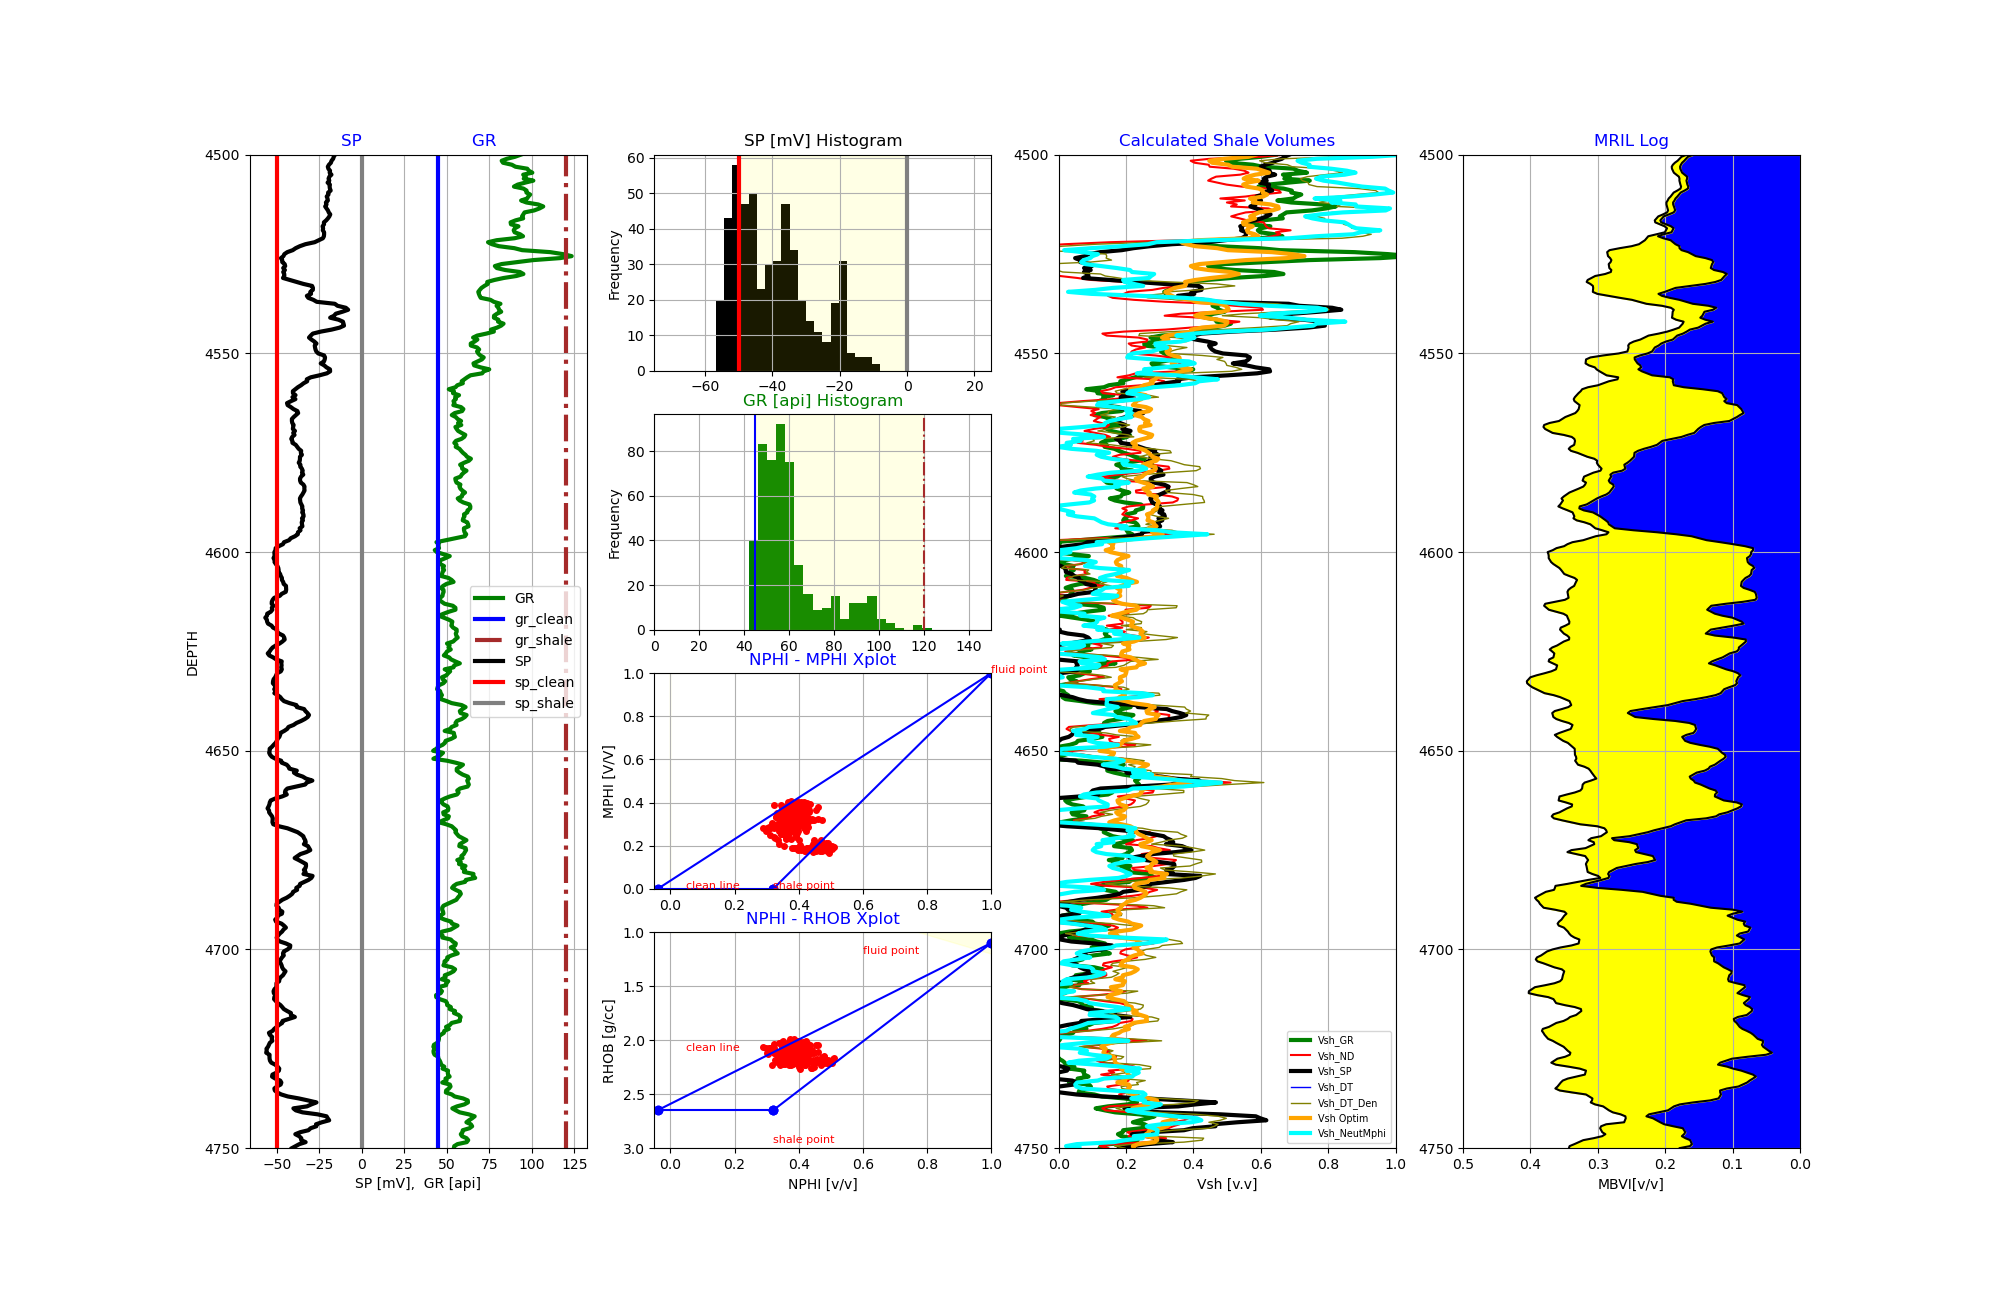

In [36]:
'''
Panel version that works
'''
dtclean_slider  = pn.widgets.FloatSlider(start=40,end=140,step=1.0,value=dt_matrix,name='dt_matrix')
dtshale_slider  = pn.widgets.FloatSlider(start=40,end=140,step=1.0,value=dt_shale,name='dt_shale')

spclean_slider  = pn.widgets.FloatSlider(start=-100,end=25,step=0.5,value=sp_clean,name='sp_clean')
spshale_slider  = pn.widgets.FloatSlider(start=-100,end=25,step=0.5,value=sp_shale,name='sp_shale')
grclean_slider  = pn.widgets.FloatSlider(start=0,end=150,step=0.5,value=gr_clean,name='gr_clean')
grshale_slider  = pn.widgets.FloatSlider(start=0,end=150,step=0.5,value=gr_shale,name='gr_shale')
neutshale_slider  = pn.widgets.FloatSlider(start=0,end=0.60,step=0.01,value=neut_shale,name='neutron_shale')
#mphishale_slider  = pn.widgets.FloatSlider(start=0,end=0.30,step=0.01,value=mphi_shale,name='mphi_shale')


pn.interact(shale_plot3, sp_clean = spclean_slider, sp_shale = spshale_slider, dt_matrix = dtclean_slider, dt_shale = dtshale_slider, gr_clean = grclean_slider, gr_shale = grshale_slider, neut_shale=neutshale_slider)


# Run this cell and all below:

In [37]:
sp_clean = spclean_slider.value 
sp_shale = spshale_slider.value
gr_clean = grclean_slider.value 
gr_shale = grshale_slider.value
neut_shale = neutshale_slider.value
#mphi_shale = mphishale_slider.value
dt_clean = dtclean_slider.value 
dt_shale = dtshale_slider.value

print('SP_cl',sp_clean,', SP_sh =',sp_shale,', GR_cl =',gr_clean, ', GR_sh =', gr_shale, ', Neut_sh =',neut_shale,', Mphi_sh =',mphi_shale,', DT_cl =',dt_clean, ', DT_sh =', dt_shale)



SP_cl -50 , SP_sh = 0 , GR_cl = 45 , GR_sh = 120 , Neut_sh = 0.32 , Mphi_sh = 0.0 , DT_cl = 55.5 , DT_sh = 90.0


### In Geolog we use a Panel server, and the best way to retrieve the Panel slide bar values from the server is to write out the constans to a file and then read in that file in the next module. The following is how we do that.

In [38]:
def write_shale_parameters_to_file(file_path, sp_clean, sp_shale, gr_clean, gr_shale, neut_shale, dt_clean, dt_shale):
    try:
        with open(file_path, 'w') as file:
            file.write("sp_clean: {}\n".format(sp_clean))
            file.write("sp_shale: {}\n".format(sp_shale))
            file.write("gr_clean: {}\n".format(gr_clean))
            file.write("gr_shale: {}\n".format(gr_shale))
            file.write("neut_shale: {}\n".format(neut_shale))
            file.write("dt_clean: {}\n".format(dt_clean))
            file.write("dt_shale: {}\n".format(dt_shale))
        print("Shale parameters successfully written to '{}'.".format(file_path))
    except Exception as e:
        print("Error writing shale parameters to file: {}".format(e))

# Sample shale parameters, replace these with the actual values you want to write
sp_clean = spclean_slider.value 
sp_shale = spshale_slider.value
gr_clean = grclean_slider.value 
gr_shale = grshale_slider.value
neut_shale = neutshale_slider.value
#mphi_shale = mphishale_slider.value
dt_clean = dtclean_slider.value 
dt_shale = dtshale_slider.value



# Replace 'shale_parameters.txt' with the desired file path
file_path = './data/parameters/shale_parameters.txt'
write_shale_parameters_to_file(file_path, sp_clean, sp_shale, gr_clean, gr_shale, neut_shale, dt_clean, dt_shale)


Shale parameters successfully written to './data/parameters/shale_parameters.txt'.


In [39]:
def read_shale_parameters_from_file(file_path):
    parameters = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                key, value = line.strip().split(':')
                parameters[key.strip()] = float(value.strip())
        return parameters
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return None
    except Exception as e:
        print("Error reading shale parameters from file: {}".format(e))
        return None

# Replace 'shale_parameters.txt' with the same file path used for writing
file_path = './data/parameters/shale_parameters.txt'
read_parameters = read_shale_parameters_from_file(file_path)

if read_parameters:
    sp_clean = read_parameters['sp_clean']
    sp_shale = read_parameters['sp_shale']
    gr_clean = read_parameters['gr_clean']
    gr_shale = read_parameters['gr_shale']
    neut_shale = read_parameters['neut_shale']
    dt_clean = read_parameters['dt_clean']
    dt_shale = read_parameters['dt_shale']

    print("Read shale parameters from file:")
    print("sp_clean:", sp_clean)
    print("sp_shale:", sp_shale)
    print("gr_clean:", gr_clean)
    print("gr_shale:", gr_shale)
    print("neut_shale:", neut_shale)
    print("dt_clean:", dt_clean)
    print("dt_shale:", dt_shale)


Read shale parameters from file:
sp_clean: -50.0
sp_shale: 0.0
gr_clean: 45.0
gr_shale: 120.0
neut_shale: 0.32
dt_clean: 55.5
dt_shale: 90.0


In [40]:
"""
===============================================================================
 === 3. Calculate Volume of Shale
 
 The first step of a basic well log analysis will begin with the volume
 of Shale calculation.
 
 There are several methods used to perform that, clasified as: - Single
 methods: Gamma Ray Log, Spontaneous Potential, vshrt or by - Dual
 Methods: Neutron-Density, it is based on a N-D Crossplot, where a clean
 line and a clay point will be defined, as you will see in the graphs
 below.
===============================================================================
"""
#vshgr
#---the setup below is correction = None or linear GR as recommended by Heslep
def vshgr(gr_log, gr_clean, gr_shale, correction=None):

    igr=(gr_log-gr_clean)/(gr_shale-gr_clean)      #Linear Gamma Ray
    vshgr_larionov_young=0.083*(2**(3.7*igr)-1)   #Larionov (1969) - Tertiary rocks
    vshgr_larionov_old=0.33*(2**(2*igr)-1)        #Larionov (1969) - Older rocks
    vshgr_clavier=1.7-(3.38-(igr+0.7)**2)**0.5    #Clavier (1971)
    vshgr_steiber=0.5*igr/(1.5-igr)               #Steiber (1969) - Tertiary rocks

    if correction == "young":
        vshgr=vshgr_larionov_young
    elif correction == "older":
        vshgr=vshgr_larionov_old
    elif correction=="clavier":
        vshgr=vshgr_clavier
    elif correction=="steiber":
        vshgr=vshgr_steiber
    else:
        vshgr=igr
    return vshgr

def vshgr2(gr_log, gr_clean, gr_shale):
    (gr_log - gr_clean)/(gr_shale - gr_clean)      #Linear Gamma Ray
    return vshgr

#vshsp
def vshsp(sp_log, sp_clean, sp_shale):
    vshsp=(sp_log-sp_clean)/(sp_shale-sp_clean)
    return vshsp

#dt_matrix, dt_fluid, dt_shale
#vsh dt
def vshdt(dt_log, dt_matrix, dt_shale):
    vshdt=(dt_log - dt_matrix)/(dt_shale-dt_matrix)
    return vshdt


#vshrt
def vshrt(rt_log, rt_clean,rt_shale):
    vrt=(rt_shale/rt_log)*(rt_clean-rt_log)/(rt_clean-rt_shale)
    if (rt_log > 2* rt_shale):
        vshrt = 0.5 * (2 * vrt)** (0.67*(vrt+1)) 
    else:
        vshrt = vrt
    return vshrt


#vshnd
def vshnd(neut_log,den_log,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale):
    term1 = (den_fl-den_matrix)*(neut_log-neut_matrix)-(den_log-den_matrix)*(neut_fl-neut_matrix)
    term2 =(den_fl-den_matrix)*(neut_shale-neut_matrix)-(den_shale-den_matrix)*(neut_fl-neut_matrix)
    vshnd=term1/term2
    return vshnd

# vsh Dt vs. bulk density
def vshdtden(dt_log,den_log,  dt_matrix,den_matrix,  dt_fluid,den_fl,  dt_shale,den_shale):
    term1 = (den_fl - den_matrix)*(dt_log-dt_matrix)   - (den_log - den_matrix)*(dt_fluid - dt_matrix)
    term2 = (den_fl - den_matrix)*(dt_shale-dt_matrix) - (den_shale-den_matrix)*(dt_fluid - dt_matrix)
    vshdtden=term1/term2
    return vshdtden



#vsh_Neutron_MPHI
def vshnmphi(nphi, mphi , nphi_sh, mphi_sh):
    #--------------------------------------------------
    #
    #    COMPUTE VSH FROM MPHI-NPHI Shale TRIANGLE 
    #
    #--------------------------------------------------    
    #mphi_shale = 0.0
    phi = (mphi * nphi_sh - nphi * mphi_sh)/(nphi_sh - mphi_sh)
    vshnmphi = (nphi - phi)/(nphi_sh)
    return vshnmphi
 
# ======= This was the original from Mahai and I do not use clay ==============
# neut_matrix, den_matrixtrix = 15, 2.6 #Define clean sand line 
# neut_fl, den_fl = 40, 2 
# =============================================================================

# Input parameters for Top and Bottom depths 
##################logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]

# calculate the vsh functions, by looping with pandas series values through vsh functions defined above
#  without looping - the function will throw an error

#initialize various Vsh
#vshgr_temp,vshnd_temp, vshrt_temp, vshsp_temp , vshnmphi_temp =[],[],[],[], []
vshgr_temp,vshnd_temp, vshrt_temp, vshsp_temp , vshdt_temp, vshrt_temp,  vshnmphi_temp, vshdtden_temp =[],[],[],[], [], [], [], []


# ===== this is an example of for a,b in zip(alist,blist): ====================
# alist = ['a1', 'a2', 'a3']
# blist = ['b1', 'b2', 'b3']
# 
# for a, b in zip(alist, blist):
#     print a, b
# 
# =============================================================================
# =============================================================================
# This is key for the input of log data to be used in Vsh calculations
# =============================================================================
#for (i,j,k,l,m,n) in zip(logs.GR,logs.NPHI,logs.RHOB,logs.ILD,logs.SP,logs.MPHI):
#    vshgr_temp.append(vshgr(i, gr_clean, gr_shale))
#    vshnd_temp.append(vshnd(j,k,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale))    
#    vshsp_temp.append(vshsp(m, sp_clean, sp_shale))
#    vshnmphi_temp.append(vshnmphi(j, n, neut_shale, 0))
#
# =============================================================================
# This is key for the input of log data to be used in Vsh calculations
# =============================================================================
#                           i       j         k         l      m        n
for (i,j,k,l,m,n,o) in zip(logs.GR,logs.NPHI,logs.RHOB,logs.ILD,logs.SP,logs.DT,logs.MPHI):
    vshgr_temp.append(vshgr(i, gr_clean, gr_shale))
    vshnd_temp.append(vshnd(j,k,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale))    
    vshsp_temp.append(vshsp(m, sp_clean, sp_shale))
    vshdt_temp.append(vshdt(n, dt_matrix, dt_shale) )   
    vshrt_temp.append(vshrt(j, rt_clean, rt_shale) )   
    vshdtden_temp.append(vshdtden(n,k,  dt_matrix,den_matrix,  dt_fluid,den_fl,  dt_shale,den_shale) )
    vshnmphi_temp.append(vshnmphi(j, o, neut_shale, 0))
# =============================================================================
    
    
# =============================================================================
# This is the input of log data used in Vsh calculations
# =============================================================================
#======== test this as it prints GR, NPHI, RHOB, ILD, SP  =====================
#    print(i,j,k,l,m) #where i=GR, j=NPHI, k=RHOB, l=ILD and m=SP
#==============================================================================
    
logs.is_copy = False # without will throw an exception

logs['vshgr']=vshgr_temp
logs['vshnd']=vshnd_temp
logs['vshsp']=vshsp_temp
logs['vshdt']=vshdt_temp
logs['vshrt']=vshrt_temp
logs['vshdtden']=vshdtden_temp
logs['vshnmphi']=vshnmphi_temp


del vshgr_temp, vshnd_temp, vshsp_temp, vshdt_temp, vshrt_temp, vshnmphi_temp         #remove the arrays to free-up memory

logs.head()

DEPTH    BS     CALI    DRHO       DT       GR     ILD     ILM      MBVI  \
0  4500.0  10.0  10.1790  0.0010  125.413  93.3120  0.5620  0.5630  0.158930   
1  4500.5  10.0  10.1923  0.0003  122.433  90.0702  0.5587  0.5687  0.166430   
2  4501.0  10.0  10.2940 -0.0030  116.966  85.3410  0.5570  0.5720  0.169075   
3  4501.5  10.0  10.5195 -0.0058  115.244  82.2392  0.5532  0.5722  0.171720   
4  4502.0  10.0  10.5120 -0.0050  116.323  83.0450  0.5490  0.5680  0.174890   

       MFFI  ...  VOL_DOLOMITE    VOL_SH   VOL_MUD     vshgr     vshnd  \
0  0.009500  ...      0.100000  0.583569  0.315770  0.644160  0.669714   
1  0.009420  ...      0.100000  0.563102  0.302914  0.600936  0.597675   
2  0.009645  ...      0.005079  0.492992  0.282689  0.537880  0.448788   
3  0.009870  ...      0.000000  0.446995  0.285272  0.496523  0.391610   
4  0.010800  ...      0.000000  0.455389  0.290216  0.507267  0.403253   

      vshsp     vshdt      vshrt  vshdtden  vshnmphi  
0  0.683740  2.026464  12.545625  0.943668  1.018344  
1  0.669784  1.940087  13.088126  0.836973  0.931338  
2  0.662500  1.781623  14.626197  0.664138  0.767016  
3  0.643540  1.731710  15.191753  0.596385  0.708803  
4  0.636240  1.762986  14.896217  0.613289  0.721281  

[5 rows x 53 columns]

## Hodges-Lehmann vs. Median filtered Vsh:

The Hodges-Lehmann approach and the median filter are two different techniques used for averaging or filtering data, including shale indicators. Let's discuss each of them separately:

1. Hodges-Lehmann approach:
The Hodges-Lehmann approach is a statistical method used to estimate the location parameter of a distribution, particularly when dealing with skewed or heavy-tailed data. It provides a robust estimate of the central tendency by calculating the median of pairwise averages.

To apply the Hodges-Lehmann approach to averaging multiple shale indicators, you would follow these steps:
1. Take all pairwise combinations of the shale indicators.
2. Calculate the average of each pair.
3. Find the median of these averaged values.

The resulting value represents the estimated central tendency of the shale indicators using the Hodges-Lehmann approach.

2. Median filter:
A median filter, on the other hand, is a digital signal processing technique used to reduce noise or smooth a signal by taking the median value of a sliding window of data points. It is commonly employed when dealing with signals containing impulsive noise or outliers.

To apply a median filter to the shale indicators, you would perform the following steps:
1. Define the window size, which determines the number of neighboring data points considered in the filtering process.
2. Slide the window across the shale indicators, one data point at a time.
3. At each position, take the median value of the data points within the window.
4. Replace the current data point with the median value.

The result is a smoothed version of the shale indicators, where outliers or noise have been reduced.

In summary, the Hodges-Lehmann approach estimates the central tendency of the shale indicators by calculating the median of pairwise averages, while a median filter smooths the data by replacing each point with the median value in a sliding window. The choice between these techniques depends on the specific goals and characteristics of your data.

### Median filtered method of calculating Vsh:

# What Shale Indicators do you want to consider?"

In [41]:
checkbox_group = pn.widgets.CheckBoxGroup(
    name='Shale Indicators', value=['vshgr', 'vshsp','vshnmphi','vshnd','VOL_SH'], options = ["vshgr", "vshsp", "vshnd", "vshdt", "vshdtden", "vshnmphi","VOL_SH"] ,
    inline=True)

checkbox_group

CheckBoxGroup(inline=True, name='Shale Indicators', options=['vshgr', 'vshsp', ...], value=['vshgr', 'vshsp', ...])

# Run this cell and all below:

In [42]:
print(checkbox_group.value)
vsh_array = logs[checkbox_group.value].to_numpy()
print(vsh_array)

['vshgr', 'vshsp', 'vshnmphi', 'vshnd', 'VOL_SH']
[[0.64416    0.68374    1.01834375 0.66971416 0.58356932]
 [0.600936   0.669784   0.9313375  0.59767545 0.56310162]
 [0.53788    0.6625     0.76701562 0.44878763 0.49299246]
 ...
 [0.15016    0.265      0.05378125 0.16071685 0.23539959]
 [0.12476267 0.22249    0.02185    0.12184247 0.22018206]
 [0.12157333 0.17874    0.06153125 0.14715502 0.22233363]]


# Multiple Clay Indicators

### First: Median filtered method of calculating Vsh:

In [43]:
# Convert specific columns 
#array = logs[['vshgr', 'vshsp','vshnd','vshnmphi']].to_numpy()
#array.shape   

medianvsh = []

for i in range(0,len(logs.vshgr),1):
    
    #medianvsh.append(np.median(array[i]))
    medianvsh.append(np.median(vsh_array[i]))

    
logs['vshmedian'] = medianvsh

print(logs['vshmedian'])

0      0.669714
1      0.600936
2      0.537880
3      0.496523
4      0.507267
         ...   
496    0.287500
497    0.266649
498    0.160717
499    0.124763
500    0.147155
Name: vshmedian, Length: 501, dtype: float64


### Second: Hodges-Lehman method of calculating Vsh:

In [44]:
import itertools
import statistics

def hodges_lehmann(data):
    pairs = list(itertools.combinations(data, 2))
    averages = [(x + y) / 2 for x, y in pairs]
    hodges_lehmann_median = statistics.median(averages)
    return hodges_lehmann_median


# Convert specific columns 
#array = logs[['vshgr', 'vshsp','vshnd','vshnmphi']].to_numpy()

vsh_hl = []

for i in range(0,len(logs),1):
    
    #vsh_hl.append(hodges_lehmann(array[i]))
    vsh_hl.append(hodges_lehmann(vsh_array[i]))

    
logs['vsh_hl'] = vsh_hl
print(logs.vsh_hl)

0      0.670339
1      0.634545
2      0.588968
3      0.547737
4      0.554041
         ...   
496    0.262003
497    0.252400
498    0.176085
499    0.147157
500    0.146045
Name: vsh_hl, Length: 501, dtype: float64


# Final Shale Plots:

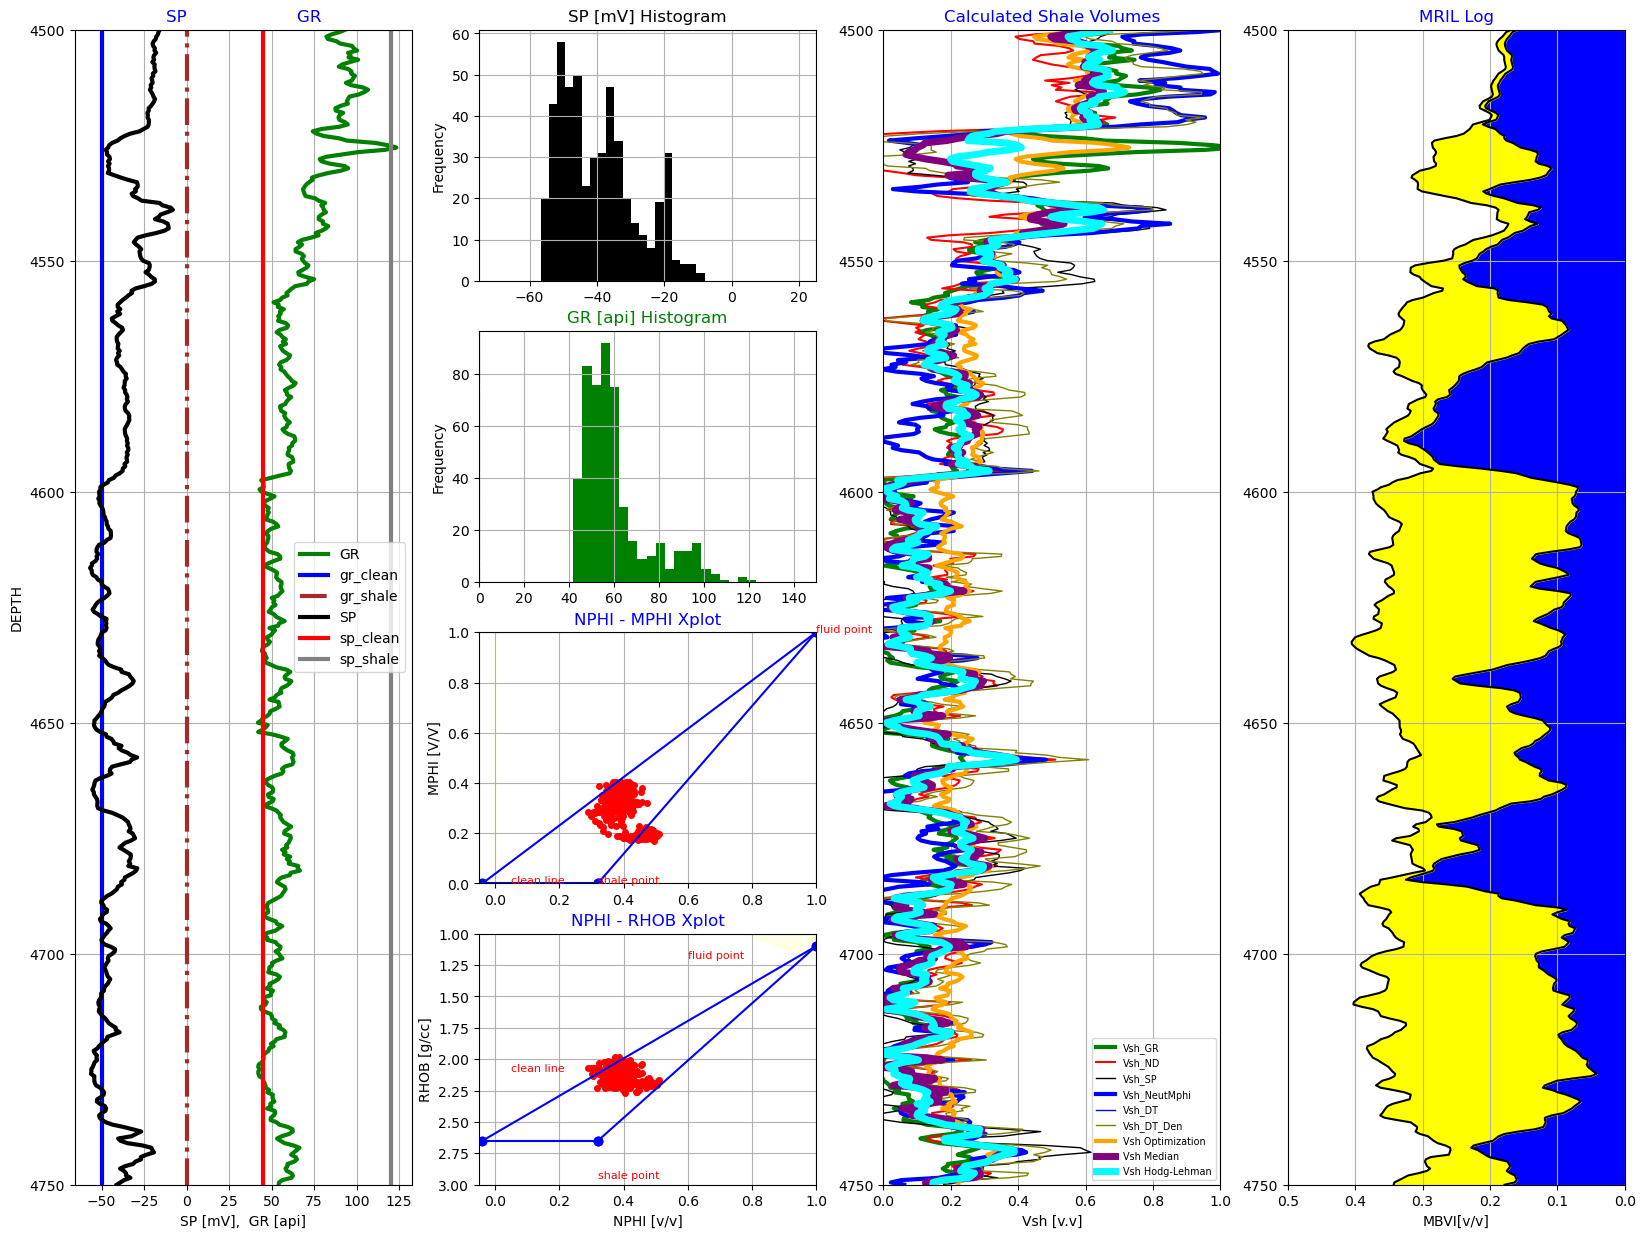

In [45]:
# Plot Intermediate Depth Plot
#intermediate_plot(top_depth,bottom_depth)
shale_plot4(gr_clean, gr_shale, sp_clean, sp_shale,neut_shale)


In [46]:
vshmethod = widgets.RadioButtons(
    options = ["GR", "SP", "DT", "Neut-Den", "Dt_Den", "Neut-Mphi", "Median Filtered", "Hodges-Lehmann","Optimization"] ,
    value="Hodges-Lehmann",
    layout={'widdt':'max-content'},
    description = 'Vsh Method:',
    disabled=False
)

vshmethod

RadioButtons(description='Vsh Method:', index=7, options=('GR', 'SP', 'DT', 'Neut-Den', 'Dt_Den', 'Neut-Mphi',…

# Run this cell and all below to make final Shale and Porosity calculations:

__(We could use multiple clay indicators with a Hodges-Lehman approach, but not yet implemented)__

In this example we recommend using the Neutron-MPHI Cross Plot shale triangle to estimate shale volumes or Median Filtered Vsh from all shale sources. For the Neutron-MPHI both the Neutron and NMR MPHI are responding to the hydrogen protons in the formation, but the Neutron log also sees the bound water on the shales (OH), which makes this a very good shale indicator. 

In [47]:
method=vshmethod.value


if method == 'GR':
    logs['vsh'] = (logs['vshgr']).clip(0,1)
elif method == 'SP':
    logs['vsh'] = (logs['vshsp']).clip(0,1)
elif method == 'DT':
    logs['vsh'] = (logs['vshdt']).clip(0,1)
elif method == 'Neut-Den':
    logs['vsh'] = (logs['vshnd']).clip(0,1)
elif method == 'Neut-Mphi':
    logs['vsh'] = (logs['vshnmphi']).clip(0,1)
elif method == 'Median Filtered':
    logs['vsh'] = (logs['vshmedian']).clip(0,1)
elif method == 'Hodges-Lehmann':
    logs['vsh'] = (logs['vsh_hl']).clip(0,1)
elif method == 'Optimization':
    logs['vsh'] = (logs['VOL_SH']).clip(0,1)
    
    
print('Vshale Method used =', method)
print()
print(logs['vsh'])

#calculate the vsh functions, by looping with pandas series values through vsh functions defined above
logs['PHISw']=phis_w(logs.DT, dt_matrix, dt_fluid, cp)
logs['PHISwshc']=phis_w_sh_corr(logs.DT, dt_matrix, dt_fluid, cp, dt_shale, logs.vsh).clip(0,1)

logs['PHISrhg']=phis_rhg(logs.DT, dt_matrix, alpha)
logs['PHISrhgshc']=phis_rhg_sh_corr(logs.DT, dt_matrix, dt_shale, logs.vsh).clip(0,1)


logs['PHIDshc']=phid_sh_corr(logs.RHOB, den_matrix, den_fl, den_shale, logs.vsh).clip(0,1)


logs['PHINshc']=phin_sh_corr(logs.NPHI, phin_sh, logs.vsh).clip(0,1)

logs['PHIxND']=phixnd(logs.PHINshc,logs.PHIDshc).clip(0,1)

#logs['PHIT']=logs['PHIxND']
logs['PHIT'] , logs['RHOMAA'] = PHIT_Knn(logs['NPHI'].to_numpy(),logs['RHOB'].to_numpy())



Vshale Method used = Hodges-Lehmann

0      0.670339
1      0.634545
2      0.588968
3      0.547737
4      0.554041
         ...   
496    0.262003
497    0.252400
498    0.176085
499    0.147157
500    0.146045
Name: vsh, Length: 501, dtype: float64


# 5) Model Clay Bound Water (CBW) to account for Clay Conductance and calculate PHIE:

Ostroff's method of plotting Vsh vs. CBW has been found to be the best method to model CBW over the interval of interest.

It is important to plot the volume of CBW vs. Vshale to assess if there are some light hydrocarbon intervals resulting on a suppressed effective porosity MPHI allowing for excess CBW. We typically make a cross plot of Vsh vs. CBW to observe if the trend is linear or if there are some sample points in the cross plot that show too much CBW. 

![cbw_vsh.png](cbw_vsh2.png)

Calculate CBWa by taking the difference between PHIT and MBVI

## CBW Calculations

In [48]:
logs['CBWa'] = (logs['PHIT'] - logs['MPHI']).clip(0,1)


#logs['CBW'] = (por_shale*logs['vsh']).clip(0,1)

In [49]:
def cbw_int_plot(CBW_Int):
    fig=plt.figure(figsize=(6,6))
    plt.title('Vsh vs.CBWa', color = 'blue')
    #if Sw_quick(m_cem,n_sat,Rw) > 0.8:
    plt.plot(logs.vsh,logs.CBWa,'r.', label='',color='red')
    #plt.plot(logs.vsh,logs.vsh*CBW_Int,'k-', label='',color='black')
    plt.plot(np.arange(10), np.arange(10) * CBW_Int, "k-", label="")
    plt.xlim(0.0,1)
    plt.ylim(0.0,1.0)
    plt.ylabel('CBWa [v/v]', color = 'blue')
    plt.xlabel('Vsh [v/v]', color = 'blue')
    #plt.grid(True, which='both',ls='-',color='gray')
    plt.grid()
    
    '''
    if plot:
        plt.show()
    else:
        plt.close(fig)
    '''
    
    return fig

A typical trend will have a y-intercept of 0 with a slope from 0.15 to approximately 0.25 We will first try to model CBW from Vsh using a slope of 0.25. We call this a CBW_Int at Vsh = 1.

The initial CBW_Int set at 0.25:



# Interactive Adjust the CBW_Int correlation if needed from plot below:

Column
    [0] Column
        [0] FloatSlider(end=0.5, name='CBW_Intercept', step=0.01, value=0.25)
    [1] Row
        [0] Matplotlib(Figure, height=432, name='interactive00138', width=432)
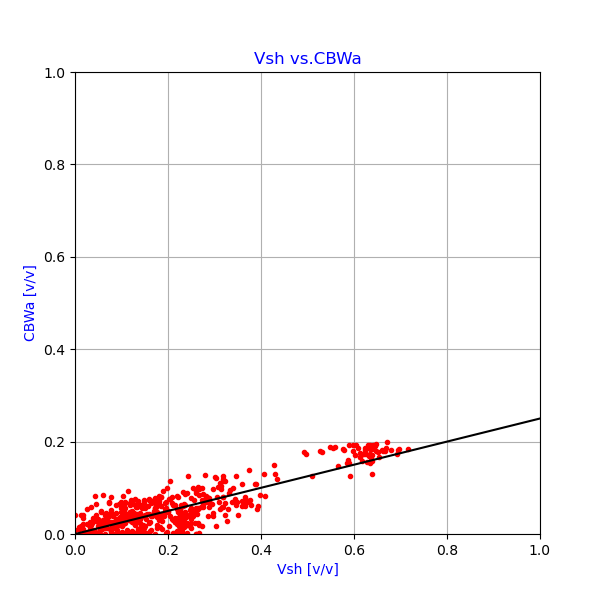

In [50]:
'''
This is the Panel version for Notebok that works well
'''

CBW_Int_slider  = pn.widgets.FloatSlider(name='CBW_Intercept',start=0,end=0.5,step=0.01,value=0.25)

pn.interact(cbw_int_plot, CBW_Int = CBW_Int_slider)


# Run this cell and all cells below:

### Calculate CBW and PHIE:

In [51]:
CBW_Int = CBW_Int_slider.value 
print(CBW_Int)


logs['CBW'] = (logs['vsh'] * CBW_Int).clip(0,1)

logs['PHIE']=(logs['PHIT'] - CBW_Int*logs['vsh']).clip(0,1)


0.25


### In Geolog we use a Panel server, and the best way to retrieve the Panel slide bar values from the server is to write out the constans to a file and then read in that file in the next module. The following is how we do that.

In [52]:
# Save the new CBW_Int value to a file
with open("./data/parameters/new_cbw_int.txt", "w") as f:
    f.write(str(CBW_Int_slider.value))


In [53]:
def read_constant_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            constant = float(file.read().strip())
            return constant
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except ValueError:
        print(f"Invalid data in '{file_path}'. The file should contain only a single constant.")

# Replace 'new_cbw_int.txt' with the actual path to your file
file_path = './data/parameters/new_cbw_int.txt'
CBW_Int = read_constant_from_file(file_path)

if CBW_Int is not None:
    print("The CBW_Int from the file is:", CBW_Int)


The CBW_Int from the file is: 0.25


### Panel and Param method - not used in this Notebook, but used in Geolog for the server version:

*** You should now have a very good model for CBW volume ***

### Calculate Swb and Qv:
Calculate Swb and Qv from the Hill, Shirley and Klein equation. Qv is used in Waxman-Smits saturation calculations.

In [54]:
print(CBW_Int)


# Calculations for Swb used in Dual Water and WaxSmits
logs['Swb'] =( 1 - logs['PHIE']/logs['PHIT']).clip(0,1)

# Qv from Swb using Hill, Shirley and Klein
logs['Qv'] = (logs['Swb']/(0.6425/((den_fl*SAL)**0.5) +0.22)).clip(0,5)


0.25


# 6) Create a variable m* model for Waxman Smits Equation:

Use Vsh vs. m* apparent cross plot to calculate a variable m* over interval of interest.

The Dual-Water method has a variable w used in this analysis too as defined by George Coates.

The following cross plot is Vsh vs. m*_apparent:
In the plot below the black points are the fit of the wet trend in the plot below that define how m* varies with Vsh. This black line is calculated:

    m* = Vsh * mslope + m_cem
    
m_cem is the Archie m in the saturation equation at Vsh = 0, and mslope is the slope of the black line that defines how m* will vary with increasing volumes of shale. For this interpretation it is important to adjust m_cem and mslope to fit the wet data trend observed on the cross plot:

Below is a cross plot of Vsh vs. m*_apparent that is used to model a variable m* with changes in Vsh.

![mna_vsh.png](mna_vsh2.png)

The objective of this section is to model m*_apparent vs. Vsh to calculate m*. The wet trend (dark blue samples represent the very high water saturations) is very distinctive and m* increases linearly with increased Vsh in the plot above. 



## Pickett Plot m and Rw as well as apparent m* to plot against Vsh to model Saturations:

### Calculate the apparent m* to plot against Vsh to model m*:

In [55]:
#ild = logs['ILD'].to_numpy()
#phit = logs['ILD'].to_numpy()

def Plot_sw( m, n, rw, mslope ):
    
    ild = logs['ILD'].to_numpy()
    phit = logs['PHIT'].to_numpy()
    qv=logs['Qv'].to_numpy()
 
    bvw = []
    bvo=[]
    swt = []
    mstarapp = []


    #log Data
    for k in range(0,len(logs) ,1):  

        #TNPH    = CNL[k]
        #RHOB2   = RHOB[k]
        #GR      = gr[k]
        ILD     = ild[k]
        PHIT    = phit[k]
        QV      = qv[k]
        #RHOMAA2 = rhoarray[k]

        #PORDEN  = (RHOMAA2 - RHOB2)/(RHOMAA2 - FD)

        # =================================================================================
        #       Saturation Calculations
        # =================================================================================
        BVW = PHIT * ( (1/PHIT**m) * (rw/ILD) )**(1/n)

        if BVW > PHIT:
            BVW=PHIT
        else:
            BVW=BVW

        Swt = BVW/PHIT
        BVO = (PHIT*(1-Swt))
        MSTARAPP = np.log10(rw/(ILD*(1+rw*B*QV))) / np.log10(PHIT)
        bvo.append(BVO)
        swt.append(Swt)    
        bvw.append(BVW)    
        mstarapp.append(MSTARAPP)
        #Mstarrapp = Mstarapp(rw,ILD, B, QV, logs['PHIT'].to_numpy())

    ######fig, axs = plt.subplot_mosaic([['left', 'right'],['middle','middle'],['bottom', 'bottom']])
    #fig, axs = plt.subplot_mosaic([['left', 'middle','right'],['bottom', 'bottom','bottom']])
    fig, axs = plt.subplot_mosaic([['left', 'middle','right']])

    #fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
    fig.suptitle('Saturations from Logs',color='blue' , fontsize=16)
    fig.subplots_adjust(top=0.90,wspace=0.2, hspace =.15)
    fig.set_figheight(5)
    fig.set_figwidth(15)
   

    y=logs.DEPT

    # Depth Plot 
    axs['left'].plot(logs.PHIT, y,'-r', lw=1)#, label= 'PHIT')
    axs['left'].plot(bvw, y,'-k', lw=1)#, label= 'BVW')
    axs['left'].set_title("Bulk Volume Plot",color='blue')    
    axs['left'].set_xlabel("BVO/BVW",color='blue')
    axs['left'].set_ylabel("Depth",color='blue')
    axs['left'].set_xlim(0.5, 0.0)
    axs['left'].set_ylim(max(y), min(y))
    axs['left'].fill_betweenx(y,logs.PHIT,bvw, color='green', label= 'BVO')
    axs['left'].fill_betweenx(y,bvw,0, color='cyan', label= 'BVW')
    axs['left'].legend()
    axs['left'].grid()

    # Depth Plot 
    #plt.axhline(y=0.5, color='r', linestyle='-')
    axs['right'].axvline(x=m,  color='r', linestyle='-', label= 'm')
    axs['right'].axvline(x=n,  color='b', linestyle='-.', label= 'n')
    axs['right'].set_title("m&n",color='blue')    
    axs['right'].set_xlabel("Electrical Properties",color='blue')
    #axs['right'].set_ylabel("Depth",color='blue')
    axs['right'].set_xlim(1, 3)
    axs['right'].set_ylim(max(y), min(y))
    #axs['right'].fill_betweenx(y,porarray,bvw, color='green', label= 'BVO')
    #axs['right'].fill_betweenx(y,bvw,0, color='cyan', label= 'BVW')
    axs['right'].legend()
    axs['right'].grid()
    #axs[0, 1].remove()  # don't display empty ax
    
    #axs['left'].sharey(axs['right'])
    #axs['right'].sharey(axs['left'])
    
    # Pickett Plot
    axs['middle'].loglog(logs.ILD,logs.PHIT, 'ro')
    axs['middle'].set_xlim(0.01,1000)
    axs['middle'].set_ylim(0.01,1)
    axs['middle'].set_title('Pickett Plot', color = 'blue')
    axs['middle'].set_ylabel('PHIT [v/v]', color = 'blue')
    axs['middle'].set_xlabel('ILD [ohmm]', color = 'blue')
    axs['middle'].grid()
    ######axs['middle'].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))
    ######axs['middle'].yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))   
    
    #calculate the saturation lines
    sw_plot=(1.0,0.8,0.6,0.4,0.2)
    phit_plot=(0.01,1)
    rt_plot=np.zeros((len(sw_plot),len(phit_plot)))

    for i in range (0,len(sw_plot)):
        for j in range (0,len(phit_plot)):
            rt_result=((rw)/(sw_plot[i]**n)*(1/(phit_plot[j]**m)))
            rt_plot[i,j]=rt_result      
    for i in range(0,len(sw_plot)):
        axs['middle'].plot(rt_plot[i],phit_plot, linewidth=2, label='SW '+str(int(sw_plot[i]*100))+'%')
        axs['middle'].legend (loc='best')
    axs['middle'].grid(True, which='both',ls='-' ,color='gray')

    
    phit_buck_plot = (0.05,0.07,0.1,0.15,0.2,0.25,0.3,0.35)
    sw_buck_plot   = (1,0.75,0.5,0.33,0.25,0.2,0.16,0.14)

    mapp_figure=plt.figure(figsize=(4,4))
    plt.title('Vsh vs.Mstar_Apparent', color = 'blue')
    #plt.plot(logs.vsh,logs.Mstarapp,'r.', label='')
    plt.plot(logs.vsh,mstarapp,'r.', label='')   
    #plt.plot(logs.vsh[swt>0.8],mstarapp[swt>0.8],'b.', label='')  
    plt.plot(logs.vsh,logs.vsh*mslope + m,'k-', label='')#,color='black')
    plt.xlim(0.0,1)
    plt.ylim(0,7)
    plt.ylabel('Mstar Apparent', color = 'blue')
    plt.xlabel('Vsh [v/v]', color = 'blue')
    plt.grid(True, which='both',ls='-',color='gray')
    
    return fig

    
    

In [56]:
def calc_bvw( m, n, rw, mslope ):
    
    ild = logs['ILD'].to_numpy()
    phit = logs['PHIT'].to_numpy()
    qv=logs['Qv'].to_numpy()
 
    bvw = []
    bvo=[]
    swt = []
    mstarapp = []


    #log Data
    for k in range(0,len(logs) ,1):  

        #TNPH    = CNL[k]
        #RHOB2   = RHOB[k]
        #GR      = gr[k]
        ILD     = ild[k]
        PHIT    = phit[k]
        QV      = qv[k]
        #RHOMAA2 = rhoarray[k]

        #PORDEN  = (RHOMAA2 - RHOB2)/(RHOMAA2 - FD)

        # =================================================================================
        #       Saturation Calculations
        # =================================================================================
        BVW = PHIT * ( (1/PHIT**m) * (rw/ILD) )**(1/n)

        if BVW > PHIT:
            BVW=PHIT
        else:
            BVW=BVW

        Swt = BVW/PHIT
        BVO = (PHIT*(1-Swt))
        MSTARAPP = np.log10(rw/(ILD*(1+rw*B*QV))) / np.log10(PHIT)
        bvo.append(BVO)
        swt.append(Swt)    
        bvw.append(BVW)    
        mstarapp.append(MSTARAPP)
        #Mstarrapp = Mstarapp(rw,ILD, B, QV, logs['PHIT'].to_numpy())
    return m,n,rw,bvw,swt

#ild = logs['ILD'].to_numpy()
#phit = logs['ILD'].to_numpy()


def Plot_sw2( m, n, rw, mslope ):
    
    ild = logs['ILD'].to_numpy()
    phit = logs['PHIT'].to_numpy()
    qv=logs['Qv'].to_numpy()
 
    bvw = []
    bvo=[]
    swt = []
    mstarapp = []


    #log Data
    for k in range(0,len(logs) ,1):  

        #TNPH    = CNL[k]
        #RHOB2   = RHOB[k]
        #GR      = gr[k]
        ILD     = ild[k]
        PHIT    = phit[k]
        QV      = qv[k]
        #RHOMAA2 = rhoarray[k]

        #PORDEN  = (RHOMAA2 - RHOB2)/(RHOMAA2 - FD)

        # =================================================================================
        #       Saturation Calculations
        # =================================================================================
        BVW = PHIT * ( (1/PHIT**m) * (rw/ILD) )**(1/n)

        if BVW > PHIT:
            BVW=PHIT
        else:
            BVW=BVW

        Swt = BVW/PHIT
        BVO = (PHIT*(1-Swt))
        MSTARAPP = np.log10(rw/(ILD*(1+rw*B*QV))) / np.log10(PHIT)
        bvo.append(BVO)
        swt.append(Swt)    
        bvw.append(BVW)    
        mstarapp.append(MSTARAPP)
        #Mstarrapp = Mstarapp(rw,ILD, B, QV, logs['PHIT'].to_numpy())

    ######fig, axs = plt.subplot_mosaic([['left', 'right'],['middle','middle'],['bottom', 'bottom']])
    #fig, axs = plt.subplot_mosaic([['left', 'middle','right'],['bottom', 'bottom','bottom']])
    fig, axs = plt.subplot_mosaic([['left', 'middle','right']])

                              #constrained_layout=True)

    #fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
    fig.suptitle('Saturations from Logs',color='blue' , fontsize=16)
    fig.subplots_adjust(top=0.90,wspace=0.2, hspace =.15)
    fig.set_figheight(5)
    fig.set_figwidth(15)
   

    y=logs.DEPT

    # Depth Plot 
    axs['left'].plot(logs.PHIT, y,'-r', lw=1)#, label= 'PHIT')
    axs['left'].plot(bvw, y,'-k', lw=1)#, label= 'BVW')
    axs['left'].set_title("Bulk Volume Plot",color='blue')    
    axs['left'].set_xlabel("BVO/BVW",color='blue')
    axs['left'].set_ylabel("Depth",color='blue')
    axs['left'].set_xlim(0.5, 0.0)
    axs['left'].set_ylim(max(y), min(y))
    axs['left'].fill_betweenx(y,logs.PHIT,bvw, color='green', label= 'BVO')
    axs['left'].fill_betweenx(y,bvw,0, color='cyan', label= 'BVW')
    axs['left'].legend()
    axs['left'].grid()

    # Mstar Plot
    axs['right'].set_title('Vsh vs.Mstar_Apparent', color = 'blue')
    #plt.plot(logs.vsh,logs.Mstarapp,'r.', label='')
    axs['right'].plot(logs.vsh,mstarapp,'r.',label='')   
    #axs['right'].plot(logs.vsh,mstarapp, c=logs.vsh,cmap=cm.jet,label='')   
    #plt.plot(logs.vsh[swt>0.8],mstarapp[swt>0.8],'b.', label='')  
    #axs['right'].plot(logs.vsh,logs.vsh*mslope + m,'k-', label='')#,color='black')
    axs['right'].plot(np.arange(10), np.arange(10) * mslope + m, "k-", label="")
    axs['right'].set_xlim(0.0,1)
    axs['right'].set_ylim(0,7)
    axs['right'].set_ylabel('Mstar Apparent', color = 'blue')
    axs['right'].set_xlabel('Vsh [v/v]', color = 'blue')
    axs['right'].grid(True, which='both',ls='-',color='gray')
    
    # Pickett Plot
    axs['middle'].loglog(logs.ILD,logs.PHIT, 'ro')
    axs['middle'].set_xlim(0.01,1000)
    axs['middle'].set_ylim(0.01,1)
    axs['middle'].set_title('Pickett Plot', color = 'blue')
    axs['middle'].set_ylabel('PHIT [v/v]', color = 'blue')
    axs['middle'].set_xlabel('ILD [ohmm]', color = 'blue')
    axs['middle'].grid()
    ######axs['middle'].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))
    ######axs['middle'].yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))   
    
    #calculate the saturation lines
    sw_plot=(1.0,0.8,0.6,0.4,0.2)
    phit_plot=(0.01,1)
    rt_plot=np.zeros((len(sw_plot),len(phit_plot)))

    for i in range (0,len(sw_plot)):
        for j in range (0,len(phit_plot)):
            rt_result=((rw)/(sw_plot[i]**n)*(1/(phit_plot[j]**m)))
            rt_plot[i,j]=rt_result      
    for i in range(0,len(sw_plot)):
        axs['middle'].plot(rt_plot[i],phit_plot, linewidth=2, label='SW '+str(int(sw_plot[i]*100))+'%')
        axs['middle'].legend (loc='best')
    axs['middle'].grid(True, which='both',ls='-' ,color='gray')

    
    phit_buck_plot = (0.05,0.07,0.1,0.15,0.2,0.25,0.3,0.35)
    sw_buck_plot   = (1,0.75,0.5,0.33,0.25,0.2,0.16,0.14)

    #fig.show()
    
    # use return fig to see plots
    return fig



def mstar_plot( m, n, rw, mslope ):
    
    ild = logs['ILD'].to_numpy()
    phit = logs['PHIT'].to_numpy()
    qv=logs['Qv'].to_numpy()
 
    mstarapp = []


    #log Data
    for k in range(0,len(logs) ,1):  

        ILD     = ild[k]
        PHIT    = phit[k]
        QV      = qv[k]
        MSTARAPP = np.log10(rw/(ILD*(1+rw*B*QV))) / np.log10(PHIT)
        mstarapp.append(MSTARAPP)
 
    mapp_figure=plt.figure(figsize=(4,4))
    plt.title('Vsh vs.Mstar_Apparent', color = 'blue')
    #plt.plot(logs.vsh,logs.Mstarapp,'r.', label='')
    plt.plot(logs.vsh,mstarapp,'r.', label='')   
    #plt.plot(logs.vsh[swt>0.8],mstarapp[swt>0.8],'b.', label='')  
    plt.plot(logs.vsh,logs.vsh*mslope + m,'k-', label='')#,color='black')
    plt.xlim(0.0,1)
    plt.ylim(0,7)
    plt.ylabel('Mstar Apparent', color = 'blue')
    plt.xlabel('Vsh [v/v]', color = 'blue')
    plt.grid(True, which='both',ls='-',color='gray')
    
    return mapp_figure



def bvw_plot( m , n ,rw, mslope):
    m_cem = m
    n_sat = n
    mslope = mslope
    #bvw  = calc_bvw(m, n,rw,mslope)    
    #swt  = calc_bvw(m,n,rw,mslope)
    return Plot_sw2( m, n, rw, mslope ), m_cem, n_sat, mslope
    #mstar_plot( m, n, rw, mslope )


In [57]:
print(m_cem,n_sat,Rw, mslope)

1.9 2.0 0.03 1


# Interactive m, n, Rw and Mstar:

Column
    [0] Column
        [0] FloatSlider(end=3.0, format=PrintfTickFormatter(id='10..., name="Cementation E..., start=1.0, step=0.01, value=1.9)
        [1] FloatSlider(end=3.0, format=PrintfTickFormatter(id='10..., name="Saturation Exponent '..., start=1.0, step=0.01, value=2.0)
        [2] FloatSlider(end=0.1, format=PrintfTickFormatter(id='10..., name='Rw = ', start=0.01, step=0.001, value=0.03)
        [3] FloatSlider(end=4.0, format=PrintfTickFormatter(id='10..., name='m* Slope = ', start=0.01, step=0.01, value=1)
    [1] Row
        [0] Matplotlib(Figure, height=360, name='interactive00151', width=1080)
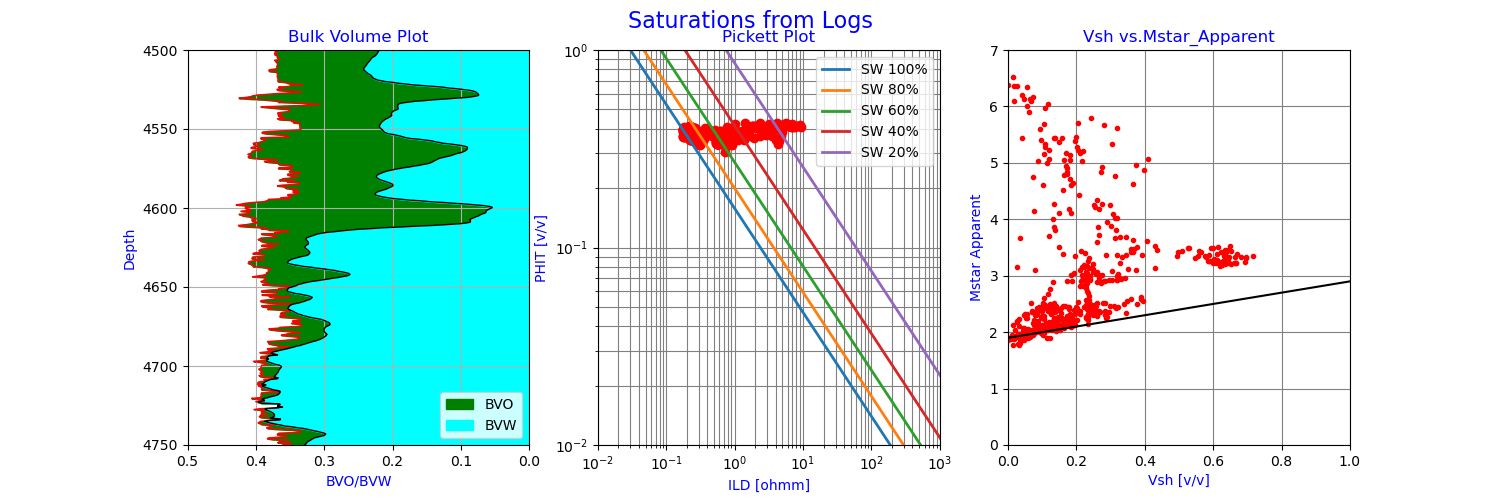

In [58]:
'''
Panel Version
'''

#float_slider = pn.widgets.FloatSlider(name='Float Slider', start=0, end=3.141, step=0.01, value=1.57)
m_slider  = pn.widgets.FloatSlider(name="Cementation Exponent 'm_cem' = ", start=1.00, end=3.00, step=0.01, value=m_cem, format=PrintfTickFormatter(format='%.2f'))
n_slider  = pn.widgets.FloatSlider(name="Saturation Exponent 'n_sat' = ", start=1.00, end=3.00, step=0.01, value=n_sat, format=PrintfTickFormatter(format='%.2f'))
rw_slider = pn.widgets.FloatSlider(name='Rw = ', start=0.01, end=0.1, step=0.001, value=Rw, format=PrintfTickFormatter(format='%.3f'))
mslope_slider = pn.widgets.FloatSlider(name='m* Slope = ', start=0.01, end=4.0, step=0.01, value=1, format=PrintfTickFormatter(format='%.3f'))


pn.interact(Plot_sw2, m = m_slider, n = n_slider, rw = rw_slider, mslope = mslope_slider)
#pane  = pn.interact(bvw_plot, m = m_slider, n = n_slider, rw = rw_slider, mslope = mslope_slider)

# Run this cell and all cells below to finish:

In [83]:
m_cem = round(m_slider.value,2) 
n_sat = round(n_slider.value,2)
Rw = round(rw_slider.value,4)
mslope = round(mslope_slider.value,2)


print('m =',m_cem,'n =',n_sat,'Rw =',Rw, 'mslope =', mslope)

logs['MSTAR']=logs.vsh*mslope + m_cem


m = 1.9 n = 2.0 Rw = 0.03 mslope = 1.68


### In Geolog we use a Panel server, and the best way to retrieve the Panel slide bar values from the server is to write out the constans to a file and then read in that file in the next module. The following is how we do that.

In [84]:
                     
def write_constants_to_file(file_path, m_cem, n_sat, Rw, mslope):
    try:
        with open(file_path, 'w') as file:
            file.write("m_cem: {}\n".format(m_cem))
            file.write("n_sat: {}\n".format(n_sat))
            file.write("Rw: {}\n".format(Rw))
            file.write("mslope: {}\n".format(mslope))
        print("Constants successfully written to '{}'.".format(file_path))
    except Exception as e:
        print("Error writing constants to file: {}".format(e))

# Sample constants, replace these with the actual values you want to write
m_cem = round(m_slider.value,2) 
n_sat = round(n_slider.value,2)
Rw = round(rw_slider.value,4)
mslope = round(mslope_slider.value,2)

# Replace 'Pickett.txt' with the desired file path
file_path = './data/parameters/Pickett.txt'
write_constants_to_file(file_path, m_cem, n_sat, Rw, mslope)
                       
                       
                       

Constants successfully written to './data/parameters/Pickett.txt'.


In [85]:
def read_constants_from_file(file_path):
    constants = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                key, value = line.strip().split(':')
                constants[key.strip()] = float(value.strip())
        return constants
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return None
    except Exception as e:
        print("Error reading constants from file: {}".format(e))
        return None

# Replace 'Pickett.txt' with the same file path used for writing
file_path = './data/parameters/Pickett.txt'
read_constants = read_constants_from_file(file_path)

if read_constants:
    m_cem = read_constants['m_cem']
    n_sat = read_constants['n_sat']
    Rw = read_constants['Rw']
    mslope = read_constants['mslope']

    print("Read constants from file:")
    print("m_cem:", m_cem)
    print("n_sat:", n_sat)
    print("Rw:", Rw)
    print("mslope:", mslope)


Read constants from file:
m_cem: 1.9
n_sat: 2.0
Rw: 0.03
mslope: 1.68


In [86]:
#m_cem = m_slider.value 
#n_sat = n_slider.value
#Rw = round(rw_slider.value,4)
#mslope = mslope_slider.value


print('m =',m_cem,'n =',n_sat,'Rw =',Rw, 'mslope =', mslope)

logs['MSTAR']=logs.vsh*mslope + m_cem


m = 1.9 n = 2.0 Rw = 0.03 mslope = 1.68


**Now you should have a well defined variable m* for Waxman-Smits*

## 7) Saturation Equations and Final Sw Calculations:

Dual-Water, Waxman-Smits and Archie

In [87]:
"""
# =============================================================================
# # From the Picket plot results we estimate Rw.
# =============================================================================


===============================================================================
 === 5. Water Saturation
 
 Before calculating the water saturation we need a value for the Rw(Resistivity of water)
 
 ===== Resistivity of water
 
 It can be determined from: - water catalogs - DST test water analysis -
 Rw from SP (needs information about Rmud and … ) - Rwa Method (Rw from a
 100% water zone)
 
 Assume that we have no ideea about the Rw of water, then best practice is a
 PICKETT plot. This plot is logarithmic plot using Gus Archie’s equation:
 
 ===== Archie Water Saturation Eq.
 
 Sw^n_sat = (a * Rw) / (Rt * PHI ^ m_cem)
 
 Equation can be re-write in a logarithm way and plotted in a log graph
 RT vs PHI:
 
 log(PHI) = - (1 / m_cem) * log(R_t) - n_sat * log(Sw) + log( a * Rw)

 IMO we should use 'a' = 1 since at 100% Porosity Ro/Rw = 1
"""
print()


# Add the equation in a function named: sw_archie,
def sw_archie(Rw, Rt, Poro, m_cem, n_sat):
        F = 1 / (Poro**m_cem)
        Sw_archie = (F * Rw/Rt)**(1/n_sat)
        return Sw_archie


def sw_dw(Rw, T, RwT, Rt, PHIT, PHIE, Swb, MBVI, MPHI):
        '''
        dualwater(Rw, Rt, PHIT, por_shale, Vsh, Rsh)
        **Dual-Water (clavier, 1977) with later modifications/rearrangements.
          Formulas from Doveton "Principles of mathematical petrophysics"
        *Input parameters:
         - PHIT - total porosity
         - por_shale - shale porosity
         - Rw - formation water resistivity [ohmm]
         - Swb - clay-bound water saturation 
         - Sw_dw - total water saturation
         *Returns:
         - Sw_dw - Total water saturation (or water saturation in Total pore space)
         - CBVWT - Coates DW CBW in Total Porossity system

         1. Coates, G.R., Gardner, J.S., and Miller, D.L., 1994, 
            Applying pulse-echo NMR to shaly sand formation evaluation, 
            paper B, 35th Annual SPWLA Logging Symposium Transactions, 22 p.
        '''

        #--------------------------------------------------
        #
        #  BEGINNING OF MRIAN AS PROPOSED BY COATES, et al
        #
        #----- COMPUTE BASIC DATA -------------------------
        #RwT = T
        CW = (T+7.)/(Rw*(RwT+7.))
        #----  CCW FROM COATES   
        CCW = 0.000216*(T-16.7)*(T+504.4)
        Ct   = 1/Rt
        #--------------------------------------------------
        #Swb = 1.0 - (PHIE/PHIT)
        Swia=MBVI/MPHI
        #Swia = Swb #estimate
        #--------------------------------------------------
        CBW = Swb * PHIT
        # MBVI in Total Porosity System
        BVIT  = MBVI + CBW
        SWBI  = CBW/PHIT
        #----- COMPUTE DCW ------------------------------
        ALPHA = 1 #for now with Salinity > 40,000 ppm
        DCWW=CW+ALPHA*Swb*(CCW-CW)
        DCWI=CW+ALPHA*SWBI*(CCW-CW)
        #----- W @ Sw = 1 -----------------------------------
        #WW=math.log10(Ct/DCWW)/(math.log10(PHIT))
        #----- W @ Sw AT BVI --------------------------------
        #WI=math.log10(Ct/DCWI)/(math.log10(BVIT))
        #----- THE ACTUAL W ---------------------------------
        Wq = 0.4*Swia + 1.65
        #Wq = 0.4*Swia + 1.9
        #----- WW AND WI CONSTRAN W ------------------------
        #----- COMPUTE CBVW TOTAL -----------------------
        #AA=CW
        #BB=ALPHA*(CBW)*(CW-CCW)
        #CC=Ct
        #CBVWA = (BB + math.sqrt(BB*BB + 4*AA*CC))/(2*AA)
        CBVWA = (ALPHA*(CBW)*(CW-CCW) + ((ALPHA*(CBW)*(CW-CCW))**2 + 4*CW*Ct)**(1/2))/(2*CW)
        CBVWT = CBVWA**(2/Wq)
        #---- COMPUTE Bulk Volume Water CBVWE in Effective System ----------
        #CBVWE = CBVWT-CBW    
        Sw_dw = CBVWT/PHIT
        return Sw_dw
        #------------------------------------------------------------
        #      END OF GEORGE COATES' MRIAN                                        
        #-------------------------------------------------------------

def waxmansmits(Rw, T, RwT, Rt, PHIT, PHIE, den_fl, MSTAR, Rw75, Qv, B):
        '''
        waxmansmits(Rw, Rt, PhiT, aa, mm, CEC)
        **Waxman-Smits CEC method obtains Qv from Hill, Shirley and Klein
          Eq solved for n=2
        *Input parameters:
         - PHIT - total porosity
         - m_cem -  cementation exponent is adjusted for Swb
         - Rw - formation water resistivity ohmm
         - B - cation mobility (mho cm2 / meq)
         - Qv - concentration of exchange cations per volume unit (meq/ml pore space)
         - CEC - cation exchange capacity of shale(meq/100 gm of sample)
         - den_ma - mineral graind density (g/cc)
         - m_cem - best determined from SCAL      
        *Returns:
         - Sw_Total_WS - total water saturation from Waxman-Smits
         - Sw_WS =(  ((1/PHIT**mstar)*Rw)/Rt*(1+Rw*B*QV)/Sw )**(1/nstar)
        '''
        
        #Crain's Waxman-Smits in lieu of using iterative. 
        #Swc = 0.5 * ((- B * Qv * RW2) + ((B * Qv *  RW2)**2 + 4 * F * RW@FT / RESD) ^ 0.5)**(2 / N)
        
        swt_crain = 0.5 * (    (- B*Qv*Rw75) + (  (B*Qv*Rw75)**2  +  4*(1/PHIT**MSTAR)*Rw/Rt)**0.5)**(2/2)
        
        return swt_crain

    
#def PHIT_Knn(CNL,RHOB):    
#This iterative is not working because of the iterative in a DataFrame. Sorting it out.
def waxsmits_it(rt, phit,  mstar, qv, rw, b):    
    
    swt_out = []

    #log Data
    for k in range(0,len(logs) ,1):  
        
            Rt2      = rt[k]
            PHIT2    = phit[k]
            QV2      = qv[k]
            MSTAR2   = mstar[k]
            #Rw      = rw
            #B       = b

            #RHOMAA2 = rhoarray[k]

            #PORDEN  = (RHOMAA2 - RHOB2)/(RHOMAA2 - FD)

            #------------------------------------------------------------
            #      WAXMAN-SMITS ITERATIVE approach to calculating Swt                                   
            #------------------------------------------------------------
            #------------------------------------------------------------       

            swap=0
            for i in range(0, 100, 1):
                swap = swap + .01
                swt_i =(((1/PHIT2**MSTAR2)*Rw)/(Rt2*(1+Rw*B*QV2/swap)))**(1/2)
                if swt_i <= swap:
                    exit
            #swt_i=0.5
            # limit sw between 0 and 1:    
            if swt_i >  1:
                swt_i = 1
            elif swt_i <= 0:
                swt_i = 0.0001
            else:
                swt_i = swt_i   


            swt_out.append(swt_i)

    return swt_out


logs['Sw_archie']=(sw_archie(Rw,logs.ILD,logs.PHIT,m_cem,n_sat)).clip(0,1)
#Calculate the BVW (bulk volume of water) for Archie:
logs['BVW']=(logs['Sw_archie']*logs['PHIT']).clip(0,1)

logs['Sw_dw'] =(sw_dw(Rw, T, T, logs.ILD, logs.PHIT, logs.PHIE, logs.Swb,logs.MBVI, logs.MPHI)).clip(0,1)
#Calculate the BVW Effective for DW:
logs['CBVWE']=(logs['Sw_dw']*logs['PHIT'] - logs['CBW']).clip(0,1)

logs['Sw_ws'] = waxmansmits(Rw, T, T, logs.ILD, logs.PHIT, logs.PHIE, den_fl, logs.MSTAR, Rw75, logs.Qv, B).clip(0,1)
logs['WSCBVWE_crain']=(logs['Sw_ws']*logs['PHIT'] - logs['CBW']).clip(0,1)

#def waxsmits_it(rt, phit,  mstar, qv, Rw, B):    
logs['Sw_wsi'] = waxsmits_it(logs['ILD'].to_numpy(),logs['PHIT'].to_numpy(),logs['MSTAR'].to_numpy(),logs['Qv'].to_numpy(), Rw, Bdacy)
logs['WSCBVWE']=(logs['Sw_wsi']*logs['PHIT'] - logs['CBW']).clip(0,1)
logs['BVO_WS'] = logs['PHIE'] - logs['WSCBVWE']  # BVO in the effective is the same as BVO in the total porosity system.
logs['SOE_WS'] = logs['BVO_WS']/logs['PHIE']
logs['SWE_WS'] = 1 - logs['SOE_WS']


logs['matrix']=(1 - logs.CBW - logs.PHIE).clip(0,1)


In [88]:
def Wax_Smits_Plot():
    
    y=logs.DEPT

    fig = plt.figure(figsize=(8,10))
    #fig.suptitle('Chart Book Solutions to Porosity and Rho Matrix',fontsize=28)
    #fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.3)
    wellname=las.well.well.value
    fig.suptitle('Sw from Waxman-Smits: %s'%wellname, fontsize=18, color='blue')
    fig.subplots_adjust(top=0.9, wspace=0.05, hspace =0.1)

    gs = gridspec.GridSpec(1, 3)
    ax1 = fig.add_subplot(gs[:,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[:,2])

    # Depth Plot 
    ax1.plot(logs.PHIT          , y,'-k', lw=1)#, label= 'PHIT')
    ax1.plot(logs.PHIE          , y,'-k', lw=1)#, label= 'PHIT')
    ax1.plot(logs.WSCBVWE       , y,'-k', lw=2, label= 'Ws Iterative')
    ax1.plot(logs.WSCBVWE_crain , y,'-r', lw=1, label= 'WS Crain')
    ax1.plot(logs.CBVWE         , y,'-b', lw=1, label= 'Dw')
    ax1.plot(logs.MBVI          , y,'-.', lw=1, label= 'MBVI',color='red')#linestyle='dotted')
    ax1.set_title("Bulk Volume Plot",color='blue')    
    ax1.set_xlabel("BVO/BVW",color='blue')
    ax1.set_ylabel("Depth",color='blue')
    ax1.set_xlim(0.5, 0.0)
    #ax1.invert_yaxis()
    ax1.set_ylim(max(y), min(y))
    ax1.fill_betweenx(logs.DEPT,logs.PHIT, logs.PHIE, facecolor='#d1d1d1' ,hatch='......', label= 'CBW')
    ax1.fill_betweenx(y,logs.PHIE,logs.WSCBVWE, color='green')#, label= 'BVO')
    ax1.fill_betweenx(y,logs.WSCBVWE,0, color='cyan')#, label= 'BVW')
    #ax1.fill_betweenx(y,logs.MBVI,0, color='blue')#, label= 'BVW')
    ax1.legend(loc = "lower left")
    ax1.grid()


    # Sw
    ax2.plot(logs.Sw_wsi, y,'-k',lw=1, label= 'Sw WS Iterative')     
    ax2.plot(logs.Sw_ws,  y,'-r',lw=1, label= 'Sw WS Crain')     
    ax2.plot(logs.Sw_dw , y,'-b',lw=1, label= 'Sw Dw')    
    ax2.fill_betweenx(logs.DEPT,logs.Sw_wsi, 1,color='green',label= 'Sw_WSi')
    ax2.plot(logs.Qv    , y     ,lw=1, label= 'Qv',linestyle='dotted',color='brown')     
    #ax2.plot(RHOMAA, y,'-b', lw=1, label= 'RHOMAA from MMin')
    ax2.set_ylim(max(y), min(y))
    ax2.grid(True)
    ax2.set_xlabel("Sw",color='blue')
    ax2.set_title("PHIT/Qv type of Sw",color='blue')    
    ax2.set_xlim(1, 0)
    ax2.legend()
    #ax2.get_yaxis().set_visible(False)
    ax2=ax2.twiny()

    #ax3=ax[3].twiny()
    ax3.grid(True)
    ax3.set_xlim(0.5,0)
    ax3.set_ylim(max(y), min(y))
    #ax3.spines['top'].set_position(('outward',40))
    ax3.set_xlabel('MBVI[v/v]')
    ax3.plot(logs.MBVI, y, label='MBVI[v/v]', color='black')
    ax3.plot(logs.MPHI, y, label='MPHI[v/v]', color='black')
    ax3.set_title("NMR Porosity",color='blue')    
    ax3.set_xlabel('NMR Porisity[v/v]', color='blue')    
    ax3.tick_params(axis='x', colors='black')
    ax3.fill_betweenx(logs.DEPT,logs.MBVI, 0,color='blue',label= 'MBVI')
    ax3.fill_betweenx(logs.DEPT,logs.MPHI, logs.MBVI,color='yellow',label= 'Free Fluid')    
    ax3.legend(loc = "lower left")
    
    return fig


# Final Depth Plot, Histograms and Save Results:

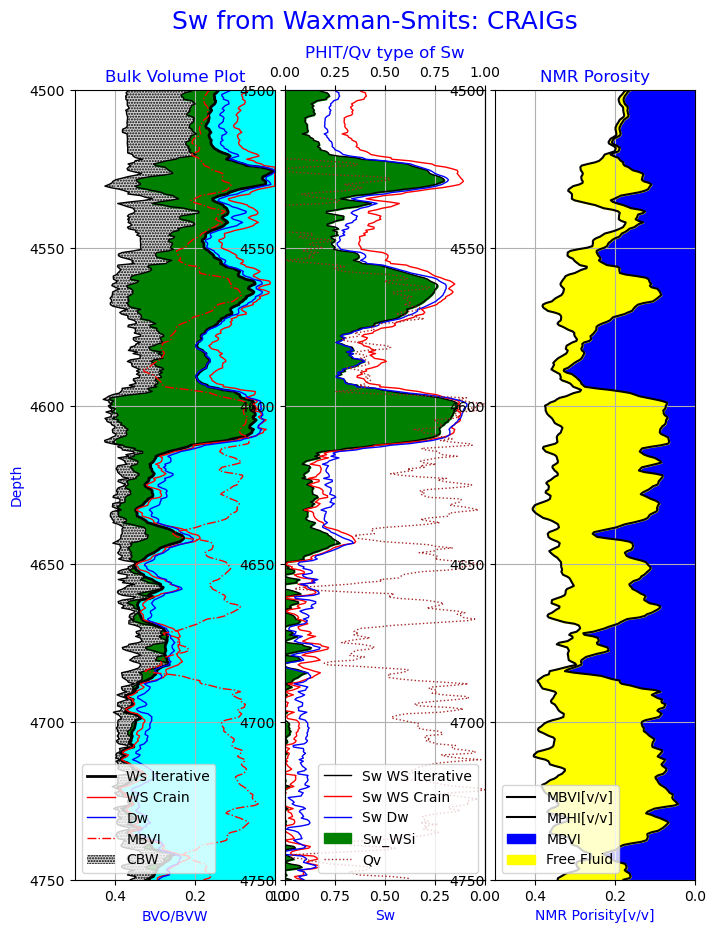

In [89]:
Wax_Smits_Plot()

# Permeability, Relative Permeability and Productive Index of Oil and Water

---
## Relative Permeability and Fractional Flow in Reservoir Engineering:
---

The Corey relative permeability technique, also known as Corey-Brooks or Corey-Krümmelbein method, is a widely used empirical approach to model the relative permeability curves of two-phase flow in porous media, typically for oil-water or gas-water systems. Developed by L.C. Corey in 1954, this technique provides a simple and practical way to estimate the relative permeabilities of oil and water (or gas and water) at different fluid saturations. The method is particularly valuable when direct measurements of relative permeability are not available or are challenging to obtain.

in this example we are using python’s Panel widgets to set the Corey Exponents (Corey_m and Corey_n), Connate Water (Swc) and Residual Oil (Sor), Viscosity of Oil (μo) and Viscosity of Water (μw) to construct our Relative Permeability and Fractional Flow Curves.

>
>![cbw_vsh](RelativePerm.gif)
>



**1. Relative Permeability:**
In reservoir engineering, relative permeability is a fundamental concept used to describe the effective permeability of fluids within a porous rock formation. A reservoir rock is typically composed of interconnected pores, and when it contains multiple fluids (e.g., oil, water, gas), the flow behavior of each fluid is influenced by the presence of the others. Relative permeability accounts for this interaction and quantifies the ability of a fluid to flow through the rock at different fluid saturations.

At the beginning of reservoir production, the reservoir may contain a mixture of oil, water, and gas. As production proceeds, the saturation of each fluid phase changes, impacting the fluid flow behavior within the reservoir. Relative permeability curves characterize the relationship between fluid saturation and the effective permeability of each phase.

For example, in an oil-water reservoir, the oil relative permeability (Kro) is high at low water saturation, allowing oil to flow more easily through the rock. As water saturation increases due to water flooding or water injection during secondary recovery, the water relative permeability (Krw) becomes significant. Krw then displaces oil, leading to a reduction in oil production rates.

**2. Fractional Flow:**
Fractional flow is a critical concept in reservoir engineering that describes the displacement of fluids in porous rock formations, particularly in the context of oil-water systems. During secondary recovery methods, such as water flooding, water is injected into the reservoir to maintain reservoir pressure and displace the oil.

Fractional flow (Fw) represents the ratio of the water phase velocity to the total velocity of both oil and water phases. It plays a crucial role in understanding reservoir productivity during secondary recovery. The fractional flow equation accounts for the relative permeability of both phases and the effect of fluid viscosities:

            Fw = 1 / (1 + Kro * μw / (Krw * μo))

Where:
- Fw: Fractional flow of water
- Kro: Oil relative permeability
- Krw: Water relative permeability
- μo: Oil viscosity at reservoir conditions
- μw: Water viscosity at reservoir conditions

The fractional flow profile shifts towards Fw = 1 as the reservoir is water-flooded or injected with water. At this point, water becomes the dominant phase, displacing oil and leading to a decline in oil production rates. Reservoir engineers consider fractional flow behavior, along with relative permeability, to optimize water injection rates and enhance oil recovery efficiency.

**Conclusion:**
Relative permeability and fractional flow are essential concepts in reservoir engineering that govern fluid flow behavior in porous rock formations. Relative permeability describes the effective permeability of fluids at different saturations, while fractional flow characterizes the proportion of water phase velocity to the total velocity.

Understanding relative permeability and fractional flow is vital for optimizing reservoir management strategies and maximizing oil recovery rates. By employing secondary recovery methods based on these concepts, engineers can enhance reservoir productivity, improve hydrocarbon recovery, and ensure efficient and sustainable oil production from subsurface reservoirs.

## Pirson and Honapour method:

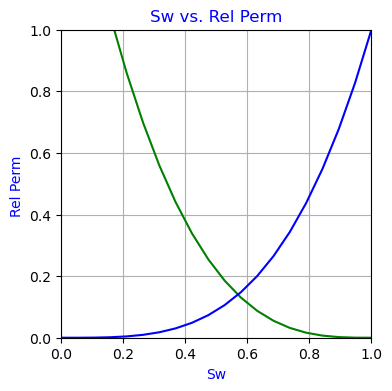

In [90]:
def relperm_plot2():
    fig = plt.figure(figsize=(4, 4))
    plt.title('Sw vs. Rel Perm', color='blue')
    #plt.plot(logs.VSH,logs.CBWa,'r.')
    sw=np.linspace(0, 1, 20)

    plt.plot(sw, 1.2624*((1-(sw)-0)/(1-0))*(((1-sw)-0)/(1-0.15))**2 , "g-", label="Kro")
    plt.plot(sw, (sw**0.5) * (sw**3.0) , "b-", label="Krw")

    
    plt.xlim(0.0, 1)
    plt.ylim(0.0, 1.0)
    plt.ylabel('Rel Perm ', color='blue')
    plt.xlabel('Sw', color='blue')
    plt.grid()
    
    return fig


relperm_plot2()

## Corey method:

Column
    [0] Column
        [0] FloatSlider(end=5, name='Corey Exponent m: Krw', value=3)
        [1] FloatSlider(end=5, name='Corey Exponent n: Kro', value=3)
        [2] FloatSlider(name='Connate Water: Swc', step=0.01, value=0.15)
        [3] FloatSlider(name='Residual Oil: Sor')
        [4] FloatSlider(end=10, name='Viscosity of Oil: μo', start=0.1, value=0.85)
        [5] FloatSlider(name='Viscosity of Water: μw', start=0.1, value=0.59)
    [1] Row
        [0] Matplotlib(Figure, height=432, name='interactive00218', width=432)
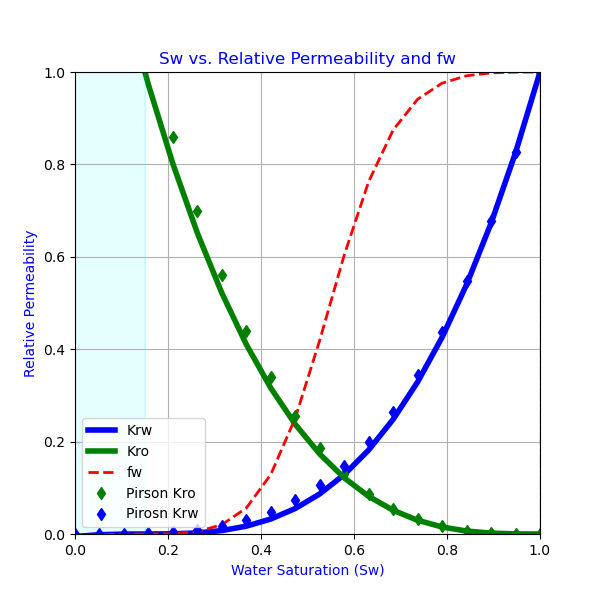

In [91]:
Kro_max = 1  # Maximum oil relative permeability
Krw_max = 1  # Maximum water relative permeability


# Define Corey's model functions for Kro and Krw
def kro_corey(Sw, Swc, Sor, Kro_max, n):
    return Kro_max * ((1 - Sw - Sor) / (1 - Swc - Sor))**n

def krw_corey(Sw, Swc, Sor, Krw_max, m):
    return Krw_max * ((Sw - Swc) / (1 - Swc - Sor))**m

# Define fractional flow function
def fractional_flow(Kro, Krw, μo, μw):
    return 1 / (1 + Kro * μw / (Krw * μo))

def relperm_plot(m, n, Swc, Sor,μo, μw):
    # Generate water saturation values (Sw) from 0 to 1
    Sw_values = np.linspace(0, 1, 20)

    # Calculate Kro and Krw using Corey's model
    Kro_values = kro_corey(Sw_values, Swc, Sor, Kro_max, n)
    Krw_values = krw_corey(Sw_values, Swc, Sor, Krw_max, m)
    
    
    # Define oil and water viscosities
    #μo = VisLive  # Oil viscosity (replace with your actual value)
    #μw = visw   # Water viscosity (replace with your actual value)
   
    # Calculate fractional flow (Fw)
    Fw_values = fractional_flow(Kro_values, Krw_values, μo, μw)
    
    
    # Plot the relative permeability curves
    fig = plt.figure(figsize=(6, 6))
    plt.plot(Sw_values, Krw_values, 'b-', label='Krw', linewidth = 4)
    plt.plot(Sw_values, Kro_values, 'g-', label='Kro', linewidth = 4)
    plt.plot(Sw_values, Fw_values , 'r--', label='fw' , linewidth = 2)
    plt.plot(Sw_values, 1.2624*((1-(Sw_values)-0)/(1-0))*(((1-Sw_values)-0)/(1-0.15))**2 , "gd", label="Pirson Kro")
    plt.plot(Sw_values, (Sw_values**0.5) * (Sw_values**3.0) , "bd", label="Pirosn Krw")

    # Add labels and legend
    plt.xlabel('Water Saturation (Sw)', color = 'blue')
    plt.ylabel('Relative Permeability', color = 'blue')
    plt.title('Sw vs. Relative Permeability and fw', color = 'blue')
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)
    plt.axvline(x=Swc,  color='cyan',    alpha=0.1,linestyle='-', label= '')
    plt.axvline(x=1-Sor,  color='brown', alpha=0.1,linestyle='-.', label= '')
    plt.axvspan(0,Swc   ,alpha=0.1,color='cyan',label='')
    plt.axvspan(1-Sor,1 ,alpha=0.1,color='brown',label='')
   
    plt.legend()
    plt.grid(True)

    # Show the plot
    #plt.show()
    
    return fig


'''
This is the Panel version for Notebok that works well
'''
corey_m_slider    = pn.widgets.FloatSlider(name='Corey Exponent m: Krw',start=0,end=5,step=0.1,value=3)
corey_n_slider    = pn.widgets.FloatSlider(name='Corey Exponent n: Kro',start=0,end=5,step=0.1,value=3)
corey_swc_slider  = pn.widgets.FloatSlider(name='Connate Water: Swc',start=0,end=1,step=0.01,value=0.15)
corey_sor_slider  = pn.widgets.FloatSlider(name='Residual Oil: Sor' ,start=0,end=1,step=0.1,value=0)
viso_slider       = pn.widgets.FloatSlider(name='Viscosity of Oil: μo' ,start=0.1,end=10,step=0.1,value=0.85)
visw_slider       = pn.widgets.FloatSlider(name='Viscosity of Water: μw' ,start=0.1,end=1,step=0.1,value=0.59)

pn.interact(relperm_plot,  m = corey_m_slider, n = corey_n_slider, Swc = corey_swc_slider, Sor = corey_sor_slider, μo = viso_slider, μw = visw_slider )


## Calculate Reservoir Fluid Properties:

In [92]:
rwt = T  # Rw temterature
#print(T)
rws = Rw
API = 33 # API of Oll
GOR = 540 # GOR of Oil in scf/STB
Gas_Sp_Grav = 0.65 


# Constants
tr = 460 + T

# Compute RW at Formation Temp (DEG F)
rwg = rws * (rwt + 7.) / (T + 7.)

# Salinity KPPM
rw75 = ((rwt + 6.77) * rws) / (75 + 6.77)

# Sal in PPM
sal = round((10 ** ((3.562 - np.log10(rw75 - 0.0123)) / 0.955)),0)

# Other variable calculations (not provided in the code)

# Get Viscosity of Water
#visw = -0.23581 + 35.225 * temp**(-0.77557)
visw = round(np.exp(0.90888431 - 0.0053020552*T*np.log(T) + 0.0012545298*T**1.5 + 0.000021391828*sal/np.log(sal)),2)

print( 'Rw =',Rw,  ', rwg =',rwg, ', rw75 =', round(rw75,3), ', Salinity of Formation Brine [ppm] =',sal)

# Matthews and Russell and Meehan: Live oil viscosity
def calc_vis(API, GOR, T):
    '''
    'No pressure dependancy included. No reason given!
    'VERSION 6 sep 2005
    '''
    Vis72      = 10 ** (np.exp(6.9824 - 0.04658 * API) * 72 ** (-1.163)) - 1   
    VisTemp    = (Vis72 + 1) ** ((T / 72) ** -1.163) - 1
    #OFTRfact  = 1
    VisLive = (10.715 * (GOR + 100) ** (-0.515)) * VisTemp ** ( 5.44 * (GOR + 150) ** (-0.338))             
    #had to put in the OFTR_factor in to get better match with the oil reservoir viscosity data in the OFTR tables

    # Standing's correlation for FVFO Pg 22-10 of P.E.H.
    Oil_Sp_Grav = 141.5 / (131.5 + API)
    f = GOR * (Gas_Sp_Grav / Oil_Sp_Grav)**0.5 + 1.25 * T
    Bo = 0.972 + 0.000147 * f**1.175
    #Bw = 1.0 / (1 + 2.25e-5 * (Press - 14.7) - 6.5e-8 * (Press - 14.7)**2)


    return VisLive, Bo


VisLive, Bo = calc_vis(API, GOR, T)
Bw = 1.022
bo = round(Bo,2)
vislive = round(VisLive,2)

print()
print( 'Reservoir Fluids:\n VisLive Oil =', vislive,', Visc of Water =',visw,', Bo =',bo,', Bw =',Bw)



Rw = 0.03 , rwg = 0.03 , rw75 = 0.058 , Salinity of Formation Brine [ppm] = 137376.0

Reservoir Fluids:
 VisLive Oil = 0.85 , Visc of Water = 0.59 , Bo = 1.27 , Bw = 1.022


# Corey Method to set Corey Exponents and Sor:

**We can use the following Panel widgets to select the Corey Exponents (Corey_m and Corey_n), Connate Water (Swc) and Residual Oil (Sor).**

Since we have an NMR MBVI as Bulk Volume Irreducible, in this workflow we will define Swc as:

     Swc = MBVI / PHIE

for a variable Swc over the interval. 

Sor should be set at 0.0 since we want to estimate fractional flow from the Drainage Relative Permeability curves and not Imbibition Relative Permeability Curves used for Water Floods. 



In [93]:
Kro_max = 1  # Maximum oil relative permeability
Krw_max = 1  # Maximum water relative permeability
#Sor     = 0  # Sor of a Oil Displacing Water Relative Permeability Curves


# Define Corey's model functions for Kro and Krw
def kro_corey(Sw, Swc, Sor, Kro_max, n):
    return Kro_max * ((1 - Sw - Sor) / (1 - Swc - Sor))**n

def krw_corey(Sw, Swc, Sor, Krw_max, m):
    return Krw_max * ((Sw - Swc) / (1 - Swc - Sor))**m

def swfr_1(Sw, Swc):
    return ((Sw - Swc) / (1 - Swc))

# Define fractional flow function
def fractional_flow(Kro, Krw, μo, μw):
    return 1 / (1 + Kro * μw / (Krw * μo))

def relperm_plot(m, n, Swc, Sor):
    # Generate water saturation values (Sw) from 0 to 1
    Sw_values = np.linspace(0, 1, 20)

    # Calculate Kro and Krw using Corey's model
    Kro_values = kro_corey(Sw_values, Swc, Sor, Kro_max, n)
    Krw_values = krw_corey(Sw_values, Swc, Sor, Krw_max, m)
    swfr_values = swfr_1(Sw_values, Swc)

    # Define oil and water viscosities
    μo = VisLive  # Oil viscosity (replace with your actual value)
    μw = visw     # Water viscosity (replace with your actual value)

    # Calculate fractional flow (Fw)
    Fw_values = fractional_flow(Kro_values, Krw_values, μo, μw)

    # Coates MPHI denominator in Coates' Permeability Equation
    coef = 10


    # Put your code here !!!
    logs['PERM'] = (  (logs['PHIE']*100/coef)**2  * ((logs['PHIE']-logs['MBVI'])/logs['MBVI'])    )**2
    logs['vol_wirr_c'] = logs['MBVI']
    logs['swi'] = logs['vol_wirr_c'] / logs['PHIE']

    logs['SOE_WS'] = logs['BVO_WS']/logs['PHIE']

    logs['So'] = logs['SOE_WS']
    logs['swe']= 1- logs['So']
    logs['swfr'] = ((logs['swe'] - logs['swi']) / (1 - logs['swi'])).clip(0.001,1)

 
    logs['kro'] = kro_corey(logs['swe'], logs['swi'], Sor, 1, n).clip(0.0001, 1)
    logs['krw'] = krw_corey(logs['swe'], logs['swi'], Sor, 1, m).clip(0.0001,1)

    for i in range(0,len(logs)):
        if pd.isna(logs['krw'][i]):
            logs['krw'][i] = 0.001



    logs['fw'] = (1 / (1 + (logs['kro'] * visw) / (logs['krw'] * VisLive))).clip(0,1)

    #----------------------------------------------------------------------------
    #     PI for each level from the Core Lab CORE ANALYSIS manual
    #     Each level has a common height. 
    #----------------------------------------------------------------------------

    logs['prodo'] = round(((0.00093 * logs['PERM']) / (VisLive * Bo)) * (1 - logs['fw']),2)
    logs['prodw'] = round(((0.00093 *  logs['PERM']) / (visw * Bw)) * logs['fw'],2)



    logs['accumoil']   = logs['prodo'][::-1].cumsum()    
    logs['accumwater'] = logs['prodw'][::-1].cumsum()    

    fig, axs = plt.subplot_mosaic([['left','right']])
    #fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
    fig.suptitle('Production from Rel Perm Curves',color='red' , fontsize=24)
    fig.subplots_adjust(top=0.8,wspace=0.3, hspace =.15)
    fig.set_figheight(8)
    fig.set_figwidth(12)
    
    
    axs['left'].plot(Sw_values, Krw_values, 'b-', label='Krw', linewidth = 4)
    axs['left'].plot(Sw_values, Kro_values, 'g-', label='Kro', linewidth = 4)
    axs['left'].plot(Sw_values, Fw_values , 'r--', label='fw' , linewidth = 2)
    axs['left'].plot(Sw_values, 1.2624*(((1-Sw_values)-0)/(1-0))*(((1-Sw_values)-0)/(1-Swc))**2 , "gd", label="Pirson Kro")
    axs['left'].plot(Sw_values, (swfr_values**0.5) * (Sw_values**3.0), "bd", label="Pirosn Krw")

    # Add labels and legend
    axs['left'].set_xlabel('Water Saturation (Sw)', color = 'blue')
    axs['left'].set_ylabel('Relative Permeability', color = 'blue')
    axs['left'].set_title('Sw vs. Relative Permeability and fw', color = 'blue')
    axs['left'].set_xlim(0.0, 1.0)
    axs['left'].set_ylim(0.0, 1.0)
    axs['left'].axvline(x=Swc,  color='cyan',    alpha=0.1,linestyle='-', label= '')
    axs['left'].axvline(x=1-Sor,  color='brown', alpha=0.1,linestyle='-.', label= '')
    axs['left'].axvspan(0,Swc   ,alpha=0.1,color='cyan',label='')
    axs['left'].axvspan(1-Sor,1 ,alpha=0.1,color='brown',label='')
    axs['left'].legend()
    axs['left'].grid(True)

    """
    #7th track: Perm, Produced Oil and Produced Water
    """
    axs['right'].set_xlim(0.001,200)
    axs['right'].set_ylim(4750,4500)    
    axs['right'].set_xscale('log')
    #axs['right'].plot(logs.PERM, logs.DEPT,label='Perm[mD]', color='red', linewidth = 3) 
    axs['right'].set_xlabel('Production',color='blue')
    axs['right'].set_ylabel('Depth',color='blue')
    axs['right'].set_title('Production Estimated from Corey Rel Perm', color = 'blue')
   
    axs['right'].plot(logs.prodw, logs.DEPT, color='cyan') 
    axs['right'].plot(logs.prodo, logs.DEPT, color='green') 
    axs['right'].fill_betweenx(logs.DEPT,logs.prodw, 0,color='cyan',label= 'Movable Water')
    axs['right'].fill_betweenx(logs.DEPT,logs.prodo, 0,color='green',label= 'Movable Oil')
    axs['right'].plot(logs.accumoil, logs.DEPT,label='ACCUM Oil[]', color='black',linewidth = 7, linestyle = '--') 
    axs['right'].grid(True)  
    axs['right'].legend(loc='lower right')

    return fig




# Interactive Rel Perm from Corey Exponents, Connate Water (Swc) and Residual Oil (Sor): 

### In the Depth plot below, only the Corey Exponents are used to estimate production since Sor should be set to 0 for Oil-Displacing-Water relative permeability and Connate Water comes from the NMR MBVI.

Column
    [0] Column
        [0] FloatSlider(end=5, name='Corey Exponent m: Krw', step=0.01, value=3)
        [1] FloatSlider(end=5, name='Corey Exponent n: Kro', step=0.01, value=3)
        [2] FloatSlider(name='Connate Water: Swc', step=0.01, value=0.15)
        [3] FloatSlider(name='Residual Oil: Sor', step=0.01)
    [1] Row
        [0] Matplotlib(Figure, height=576, name='interactive00236', width=864)
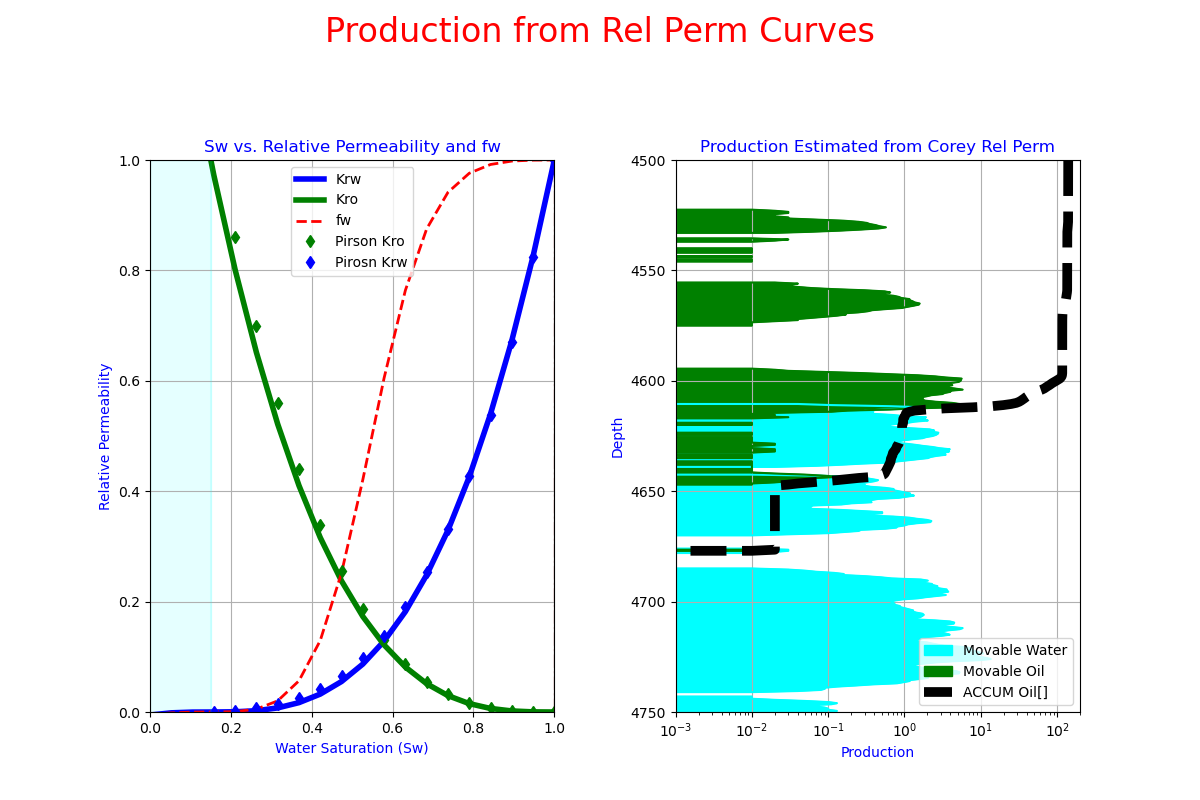

In [94]:
'''
This is the Panel version for Notebok that works well
'''
corey_m_slider    = pn.widgets.FloatSlider(name='Corey Exponent m: Krw',start=0,end=5,step=0.01,value=3)
corey_n_slider    = pn.widgets.FloatSlider(name='Corey Exponent n: Kro',start=0,end=5,step=0.01,value=3)
corey_swc_slider  = pn.widgets.FloatSlider(name='Connate Water: Swc',start=0,end=1,step=0.01,value=0.15)
corey_sor_slider  = pn.widgets.FloatSlider(name='Residual Oil: Sor' ,start=0,end=1,step=0.01,value=0)

pn.interact(relperm_plot,  m = corey_m_slider, n = corey_n_slider, Swc = corey_swc_slider, Sor = corey_sor_slider )


In [95]:
rdbuttons2 = pn.widgets.RadioBoxGroup(
    options = ['Corey','Pirson'],
    value='Corey',
    #layout={'widdt':'max-content'},
    name = 'Relative Permeability Method',
    disabled=False
)


print()
print('Select the method you want to use to model Relative Permeability:')
print()

rdbuttons2


Select the method you want to use to model Relative Permeability:



RadioBoxGroup(name='Relative Permeability M..., options=['Corey', 'Pirson'], value='Corey')

# Run this cell and all below:

In [96]:
method=rdbuttons2.value
print('Relative Permeability Method:', method)
print()

Relative Permeability Method: Corey



In [97]:
corey_m = corey_m_slider.value
corey_n = corey_n_slider.value
Swc = corey_swc_slider.value
Sor = corey_sor_slider.value

print(corey_m, corey_n, Swc, Sor)

3 3 0.15 0


In [98]:
# Coates MPHI denominator in Coates' Permeability Equation
coef = 10


# Put your code here !!!
logs['PERM'] = (  (logs['PHIE']*100/coef)**2  * ((logs['PHIE']-logs['MBVI'])/logs['MBVI'])    )**2
logs['vol_wirr_c'] = logs['MBVI']
logs['swi'] = logs['vol_wirr_c'] / logs['PHIE']

logs['SOE_WS'] = logs['BVO_WS']/logs['PHIE']

logs['So'] = logs['SOE_WS']
logs['swe']= 1- logs['So']
logs['swfr'] = ((logs['swe'] - logs['swi']) / (1 - logs['swi'])).clip(0.001,1)

if method == 'Pirson':

    #Hon/Pirson fw from Honopour-A8-Kro    
    logs['kro'] = (1.2624*((logs['So']-0)/(1-0))*((logs['So']-0)/(1-logs['swi']))**2 ).clip(0.001,1)
    logs['krw'] = ((logs['swfr']**0.5) * (logs['swe']**3.0)).clip(0.001,1)

elif method == 'Corey':

    logs['kro'] = kro_corey(logs['swe'], logs['swi'], Sor, Kro_max, corey_n).clip(0.0001, 1)
    logs['krw'] = krw_corey(logs['swe'], logs['swi'], Sor, Krw_max, corey_m).clip(0.0001,1)

for i in range(0,len(logs)):
    if pd.isna(logs['krw'][i]):
        logs['krw'][i] = 0.001



logs['fw'] = (1 / (1 + (logs['kro'] * visw) / (logs['krw'] * VisLive))).clip(0,1)

#----------------------------------------------------------------------------
#     PI for each level from the Core Lab CORE ANALYSIS manual
#     Each level has a common height. 
#----------------------------------------------------------------------------

logs['prodo'] = round(((0.00093 * logs['PERM']) / (VisLive * Bo)) * (1 - logs['fw']),2)
logs['prodw'] = round(((0.00093 *  logs['PERM']) / (visw * Bw)) * logs['fw'],2)



logs['accumoil']   = logs['prodo'][::-1].cumsum()    
logs['accumwater'] = logs['prodw'][::-1].cumsum()    


In [99]:
logs.head()

DEPTH    BS     CALI    DRHO       DT       GR     ILD     ILM      MBVI  \
0  4500.0  10.0  10.1790  0.0010  125.413  93.3120  0.5620  0.5630  0.158930   
1  4500.5  10.0  10.1923  0.0003  122.433  90.0702  0.5587  0.5687  0.166430   
2  4501.0  10.0  10.2940 -0.0030  116.966  85.3410  0.5570  0.5720  0.169075   
3  4501.5  10.0  10.5195 -0.0058  115.244  82.2392  0.5532  0.5722  0.171720   
4  4502.0  10.0  10.5120 -0.0050  116.323  83.0450  0.5490  0.5680  0.174890   

       MFFI  ...        So       swe   swfr  kro     krw        fw  prodo  \
0  0.009500  ...  0.305094  0.694906  0.001  1.0  0.0001  0.000145    0.0   
1  0.009420  ...  0.318360  0.681640  0.001  1.0  0.0001  0.000145    0.0   
2  0.009645  ...  0.350421  0.649579  0.001  1.0  0.0001  0.000145    0.0   
3  0.009870  ...  0.348502  0.651498  0.001  1.0  0.0001  0.000145    0.0   
4  0.010800  ...  0.354662  0.645338  0.001  1.0  0.0001  0.000145    0.0   

   prodw  accumoil  accumwater  
0    0.0    140.11      435.39  
1    0.0    140.11      435.39  
2    0.0    140.11      435.39  
3    0.0    140.11      435.39  
4    0.0    140.11      435.39  

[5 rows x 94 columns]

In [100]:
# Create the Final Plot figure and subplots
def final_plot(top_summary,bottom_summary):
    
    """
    ===============================================================================
     === 6. Display the ``Interpretation Plot''

     Create a plot template and add the results of volume of shale, saturation and porosity.
    ===============================================================================
    """

    # Create the figure and subplots
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(18,22), sharey=True)
    fig.suptitle("Final Interpretation Depth Plot over Zone of Interest", color='blue' , fontsize=22)
    fig.subplots_adjust(top=0.84,wspace=0.1)

    ##General setting for all axis per Mahai
    #for axes in ax:
    #    axes.set_ylim (top_depth,bottom_depth)
    #    axes.invert_yaxis()
    #    axes.yaxis.grid(True)
    #    axes.get_xaxis().set_visible(False)
    #    for i in tops_depths:
    #            if ((i>=top_depth) and (i<=bottom_depth)):
    #                axes.axhline(y=i, linewidth=1.0, color='red')
    #for (i,j) in zip(tops_depths,tops):
    #    if ((i>=top_depth) and (i<=bottom_depth)):
    #        ax[0].text(0.2, i ,j, horizontalalignment='right',verticalalignment='center', color='red')        

    #General setting for all axis concentrating only on the Zone of Interest
    for axes in ax:
        axes.set_ylim (top_summary,bottom_summary)
        #axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        for i in tops_depths:
                if ((i>=top_summary) and (i<=bottom_summary)):
                    axes.axhline(y=i, linewidth=1.0, color='red')
    for (i,j) in zip(tops_depths,tops):
        if ((i>=top_summary) and (i<=bottom_summary)):
            ax[0].text(0.2, i ,j, horizontalalignment='right',verticalalignment='center', color='red')                


    """
    #1st track: GR, SP, CALI track
    """

    ax03=ax[0].twiny()
    ax03.set_xlim(0,200)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='black',linewidth=1.0) 
    ax03.spines['top'].set_position(('outward',40))
    ax03.set_xlabel('GR[api]',color='black')    
    ax03.tick_params(axis='x', colors='black')
    #ax03.fill_betweenx(logs.DEPT,logs.GR, 200,color='yellow',hatch='..',label= 'Wash Out')    
    ax03.fill_betweenx(logs.DEPT,logs.GR,200,facecolor='#ffff00' ,hatch='...',label='Matrix')
    #ax03.fill_betweenx(logs.DEPT,logs.GR,0,facecolor='#d1d1d1' ,hatch='-----',label= 'Shale')
    ax03.fill_betweenx(logs.DEPT,logs.GR,0,color='green' ,label= 'Shale')

    ax01=ax[0].twiny()
    ax01.set_xlim(-200,10)
    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='black',linewidth=3.0)
    ax01.set_xlabel('SP[mV]',color='black')    
    ax01.tick_params(axis='x', colors='black')
  
    
    '''
    ax02=ax[0].twiny()
    ax02.set_xlim(5,15)
    ax01.grid(True)
    ax02.plot(logs.CALI, logs.DEPT, '-', label='CALI[in]', color='black', linewidth=2.0) 
    ax02.spines['top'].set_position(('outward',40))
    ax02.set_xlabel('CALI[in]',color='black')    
    ax02.tick_params(axis='x', colors='black')
    
    ax04=ax[0].twiny()
    ax04.set_xlim(5,15)
    ax04.plot(logs.BS, logs.DEPT, '--', label='BS[in]', color='black', linewidth=1.0)
    ax04.spines['top'].set_position(('outward',120))
    ax04.set_xlabel('BS[in]',color='black')    
    ax04.tick_params(axis='x', colors='black')
    ax04.fill_betweenx(logs.DEPT,logs.CALI, logs.BS,color='brown',hatch='---',label= 'Wash Out')    
    #ax04.fill_betweenx(logs.DEPT,logs.CALI,1,facecolor='#d1d1d1' ,hatch='---',label= 'Wash Out')
    '''
    

    """
    #2nd track: Resistivities
    """
    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,100)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[ohmm]', color='black')
    ax11.plot(logs.ILD, logs.DEPT, '--', label='ILD[ohmm]', color='black', linewidth = 3.0)
    ax11.tick_params(axis='x', colors='black')    

    ax12=ax[1].twiny()
    ax12.set_xlim(0.1,100)
    ax12.set_xscale('log')
    ax12.plot(logs.ILM, logs.DEPT, label='ILM[ohmm]', color='red') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('ILM[ohmm]', color='red')    
    ax12.tick_params(axis='x', colors='red')

    ax13=ax[1].twiny()
    ax13.set_xlim(0.1,100)
    ax13.set_xscale('log')
    ax13.plot(logs.Rxo, logs.DEPT,label='Rxo[ohmm]', color='blue') 
    ax13.spines['top'].set_position(('outward',0))
    ax13.set_xlabel('Rxo[ohmm]',color='blue')
    ax13.tick_params(axis='x', colors='blue')



    """
    #3rd track: DT, RHOB, NPHI track
    """
    #ax21=ax[2].twiny()
    #ax21.set_xlim(-0.15,0.45)
    #ax21.invert_xaxis()
    #ax21.plot(logs.PHIE, logs.DEPT, color='purple',linewidth=2.0) 
    #ax21.spines['top'].set_position(('outward',180))
    #ax21.set_xlabel('PHIE[v/v]', color='purple')    
    #ax21.tick_params(axis='x', colors='purple') 
    #ax21.legend(loc='lower left')

    ax22=ax[2].twiny()
    ax22.set_xlim(-0.15,0.45)
    ax22.invert_xaxis()
    ax22.plot(logs.PHIT, logs.DEPT,  color='black',linewidth=2.0) 
    ax22.spines['top'].set_position(('outward',120))
    ax22.set_xlabel('PHIT[v/v]', color='black')    
    ax22.tick_params(axis='x', colors='black') 
    #ax22.fill_betweenx(logs.DEPT,logs.PHIE,logs.PHIT,facecolor='#d1d1d1' ,hatch='.--.',label='CBW')
    #ax22.legend(loc='lower right')

    ax23=ax[2].twiny()
    ax23.grid(True)
    ax23.set_xlim(115,36)
    ax23.spines['top'].set_position(('outward',0))
    ax23.set_xlabel('DT[us/ft]')
    ax23.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue',linewidth=2)
    ax23.set_xlabel('DT[us/ft]', color='blue')    
    ax23.tick_params(axis='x', colors='blue')
    #ax23.legend(loc='lower left')

    ax24=ax[2].twiny()
    ax24.set_xlim(-0.15,0.45)
    ax24.invert_xaxis()
    ax24.plot(logs.NPHI, logs.DEPT, label='NPHI[v/v]', color='green') 
    ax24.spines['top'].set_position(('outward',40))
    ax24.set_xlabel('NPHI[v/v]', color='green')    
    ax24.tick_params(axis='x', colors='green')
    #ax24.legend(loc='lower left')

    ax25=ax[2].twiny()
    ax25.set_xlim(1.95,2.95)
    ax25.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='red',linewidth=2) 
    ax25.spines['top'].set_position(('outward',80))
    ax25.set_xlabel('RHOB[g/cc]',color='red')
    ax25.tick_params(axis='x', colors='red')
    #ax25.legend(loc='lower left')

    

    """
    #4th track: SW
    """
    ax31=ax[3].twiny()
    ax31.grid(True)
    ax31.set_xlim(1,0)
    ax31.plot(logs.Sw_wsi, logs.DEPT, color='black',linewidth=1)
    #ax33.plot(logs.SWs, logs.DEPT, label='SWs', color='green',linewidth=0.5)
    ax31.fill_betweenx(logs.DEPT,1,logs.Sw_wsi,color='green',label='Oil')
    ax31.fill_betweenx(logs.DEPT,0,logs.Sw_wsi,color='cyan',label='Water')
    ax31.spines['top'].set_position(('outward',0))
    ax31.set_xlabel('Sw_WS_iterative', color='black')    
    ax31.tick_params(axis='x', colors='black')
    ax31.legend(loc='upper right')

    '''
    ax32=ax[3].twiny()
    ax32.grid(True)
    ax32.set_xlim(1,0)
    ax32.plot(logs.Sw_archie, logs.DEPT, '--' , color = 'gray', linewidth=2)
    #ax32.plot(logs.SWs, logs.DEPT, label='SWs', color='green',linewidth=0.5)
    ax32.spines['top'].set_position(('outward',40))
    ax32.set_xlabel('Sw_archie', color='gray')    
    ax32.tick_params(axis='x', colors='gray')

    ax33=ax[3].twiny()
    ax33.grid(True)
    ax33.set_xlim(1,0)
    #ax33.plot(logs.Sw_dw, logs.DEPT, label='Sw_dw', color='blue',linewidth=2)
    #ax33.plot(logs.SWs, logs.DEPT, label='SWs', color='green',linewidth=0.5)
    ax33.spines['top'].set_position(('outward',80))
    ax33.set_xlabel('Sw_DW', color='blue')    
    ax33.tick_params(axis='x', colors='blue')
    '''
    '''
    ax34=ax[3].twiny()
    ax34.grid(True)
    ax34.set_xlim(1,0)
    #ax34.plot(logs.Sw_dw, logs.DEPT, label='Sw_ws_Crain', color='red',linewidth=2)
    ax34.plot(logs.Sw_ws, logs.DEPT, label='Sw Crain', color='red',linewidth=1)
    ax34.spines['top'].set_position(('outward',120))
    ax34.set_xlabel('Sw_WS_Crain', color='red')    
    ax34.tick_params(axis='x', colors='red')
    '''
    
    
    """
    #5th track: PHIE, BVW
    """
    ax41=ax[4].twiny()
    ax41.grid(True)
    ax41.set_xlim(0.5,0)
    ax41.plot(logs.PHIT, logs.DEPT, color='red', linewidth=1)
    ax41.spines['top'].set_position(('outward',0))
    ax41.set_xlabel('PHIT', color='red')    
    ax41.tick_params(axis='x', colors='red')
    #ax41.legend(loc='lower left')

    ax42=ax[4].twiny()
    ax42.grid(True)
    ax42.set_xlim(0.5,0)
    ax42.plot(logs.PHIE, logs.DEPT, color='orange', linewidth=1)
    ax42.spines['top'].set_position(('outward',40))
    ax42.set_xlabel('PHIE', color='orange')    
    ax42.tick_params(axis='x', colors='orange')

    ax43=ax[4].twiny()
    ax43.set_xlim(0.5,0)
    ax43.plot(logs.WSCBVWE, logs.DEPT, color='olive', linewidth=1)
    ax43.spines['top'].set_position(('outward',80))
    ax43.set_xlabel('WSCBVWE', color='olive')    
    ax43.tick_params(axis='x', colors='olive')
   
    ax44=ax[4].twiny()
    ax44.set_xlim(0.5,0)
    ax44.plot(logs.MBVI, logs.DEPT, color='blue', linewidth=2)
    ax44.spines['top'].set_position(('outward',120))
    ax44.set_xlabel('MBVI', color='blue')    
    ax44.tick_params(axis='x', colors='blue')
    ax44.fill_betweenx(logs.DEPT,logs.PHIE, logs.WSCBVWE,color='olive',label= 'HC')
    ax44.fill_betweenx(logs.DEPT,logs.WSCBVWE, 0,color='cyan',label= 'Movable Water')
    ax44.fill_betweenx(logs.DEPT,logs.MBVI,    0,color='blue',label= 'MBVI')
    ax44.legend(loc='upper right')
    
    
    ax45=ax[4].twiny()
    ax45.set_xlim(-1,14)
    ax45.spines['top'].set_position(('outward',160))
    ax45.plot(logs.DCAL, logs.DEPT, label='DCAL', color='purple', linewidth=1)
    ax45.set_xlabel('DCAL', color='purple')    
    ax45.tick_params(axis='x', colors='purple')
    ax45.fill_betweenx(logs.DEPT,logs.DCAL, 0,color='yellow',hatch='....',label= 'Wash Out')    
    ax45.legend(loc='lower right')

    
    
    
    
    """
    #6th track: PHIE, MATRIX, Shale
    """
    ax50=ax[5].twiny()
    ax50.set_xlim(1,0)
    ax50.spines['top'].set_position(('outward',0))
    ax50.plot(logs.PHIE, logs.DEPT, label='PHIE', color='black',linewidth=2)
    ax50.set_xlabel('PHIE', color='black')    
    ax50.tick_params(axis='x', colors='black')

    ax51=ax[5].twiny()
    ax51.set_xlim(0,1)
    ax51.spines['top'].set_position(('outward',40))
    ax51.plot(logs.vsh, logs.DEPT, label='Vsh', color='blue',linewidth=1)
    ax51.set_xlabel('Vsh', color='blue')    
    ax51.tick_params(axis='x', colors='blue')
    ax51.fill_betweenx(logs.DEPT,logs.vsh,0,facecolor='#d1d1d1' ,hatch='-----',label= 'Shale')
    ax51.legend()
    
    ax52=ax[5].twiny()
    ax52.set_xlim(1,0)
    ax52.spines['top'].set_position(('outward',0))
    ax52.fill_betweenx(logs.DEPT,0,logs.PHIE,color='black',label='Porosity')
    ax52.fill_betweenx(logs.DEPT,logs.PHIE,1-logs.vsh,facecolor='#ffff00' ,hatch='..',label='Matrix')
    #ax52.fill_betweenx(logs.DEPT,1-logs.vsh,1,facecolor='#d1d1d1' ,hatch='-----',label= 'Shale')
    ax52.legend(loc='lower left')

    ax54=ax[5].twiny()
    ax54.set_xlim(0,1)
    ax54.spines['top'].set_position(('outward',120))
    ax54.plot(logs["VOL_SH"]  , logs["DEPT"], color="red",  linewidth=1)
    #ax54.plot(logs.VOL_SH, logs.DEPT, label='VOL_SH', color='red',linewidth=2)
    ax54.set_xlabel('VOL_SH', color='red')    
    ax54.tick_params(axis='x', colors='red')
 
    ax53=ax[5].twiny()
    ax53.set_xlim(1,4)
    ax53.spines['top'].set_position(('outward',80))
    ax53.plot(logs.MSTAR, logs.DEPT, label='m_star', color='brown', linewidth=2)
    ax53.set_xlabel('m*', color='brown')    
    ax53.tick_params(axis='x', colors='brown')
    ax53.legend(loc='upper left')

    
    
    """
    #7th track: Perm, Produced Oil and Produced Water
    """
    
    ax61=ax[6].twiny()
    ax61.set_xlim(0.01,10000)
    ax61.set_xscale('log')
    ax61.plot(logs.PERM, logs.DEPT,label='Perm[mD]', color='red', linewidth = 3) 
    ax61.spines['top'].set_position(('outward',0))
    ax61.set_xlabel('Perm[mD]',color='red')
    ax61.tick_params(axis='x', colors='red')
    ax61.grid(True)
    ax61.legend(loc='upper left')
   
    ax62=ax[6].twiny()
    ax62.set_xlim(0.01,10)
    ax62.set_xscale('log')
    ax62.plot(logs.prodw, logs.DEPT,label='PRODW[]', color='cyan') 
    ax62.spines['top'].set_position(('outward',40))
    ax62.set_xlabel('PRODW[]',color='cyan')
    ax62.tick_params(axis='x', colors='cyan')
    ax62.legend(loc='upper left')

    ax63=ax[6].twiny()
    ax63.set_xlim(0.01,10)
    ax63.set_xscale('log')
    ax63.plot(logs.prodo, logs.DEPT,label='PRODO[]', color='green') 
    ax63.spines['top'].set_position(('outward',80))
    ax63.set_xlabel('PRODO[]',color='green')
    ax63.tick_params(axis='x', colors='green')
    ax63.fill_betweenx(logs.DEPT,logs.prodw, 0,color='cyan',label= 'Movable Water')
    ax63.fill_betweenx(logs.DEPT,logs.prodo, 0,color='green',label= 'Movable Oil')
    ax63.legend(loc='upper left')
     
    ax64=ax[6].twiny()
    ax64.set_xlim(0,150)
    #ax64.set_xscale('log')
    ax64.plot(logs.accumoil, logs.DEPT,label='ACCUM Oil[]', color='black',linewidth = 7, linestyle = '--') 
    ax64.spines['top'].set_position(('outward',120))
    ax64.set_xlabel('ACCUM Oil[]',color='black')
    ax64.tick_params(axis='x', colors='black')
    ax64.legend(loc='upper left')
    
    #plt.savefig ('interpretation_plot.png', dpi=200, format='png')    
    return fig


In [101]:
def Plot_lith2(depth_range):
    top_summary = int_range_slider.value[0]
    bottom_summary = int_range_slider.value[1]
   
    fig = plt.figure(figsize=(20, 10))

    ax =[]

    ax.append(fig.add_subplot(1, 9, (1, 1)))
    ax.append(fig.add_subplot(1, 9, (2, 2), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (3, 3), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (4, 4), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (5, 5), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (6, 6), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (7, 7), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (8, 8), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (9, 9), sharey=ax[0]))

    #General setting for all axis concentrating only on the Zone of Interest
    for axes in ax:
        axes.set_ylim (top_summary,bottom_summary)
        #axes.set_ylim (top_depth,bottom_depth)
        #axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        for i in tops_depths:
                if ((i>=top_summary) and (i<=bottom_summary)):
                    axes.axhline(y=i, linewidth=1.0, color='red')
    for (i,j) in zip(tops_depths,tops):
        if ((i>=top_summary) and (i<=bottom_summary)):
            ax[0].text(0.2, i ,j, horizontalalignment='right',verticalalignment='center', color='red')                
    
    t0 = ax[0].twiny()
    t0.set_xlabel("GR [API]", color ="green")
    t0.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t0.xaxis.set_label_position("top")
    t0.spines.top.set_position(("axes",1.1))
    t0.set_xlim(0, 200)

    ######ax[0].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))
    #########ax[0].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(5))
    ax[0].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))
    ax[0].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(10))
    ax[0].invert_yaxis()
    ax[0].plot(logs["GR"], logs["DEPT"], color="green")
    ax[0].set_xlabel("GR [°API]", color="green")
    ax[0].tick_params(which="both", top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[0].xaxis.set_label_position("top")
    ax[0].set_xlim(0, 200)
    ax[0].grid(True, which="both")

    

    t1 = ax[1].twiny()
    t1.plot(logs["RHOB"], logs["DEPT"], color="red")
    t1.set_xlabel("RHOB [g/cc]", color ="red")
    t1.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t1.xaxis.set_label_position("top")
    t1.spines.top.set_position(("axes",1.1))
    t1.set_xlim(1.95, 2.95)

    ax[1].plot(logs["NPHI"], logs["DEPT"], color="blue")
    ax[1].set_xlabel("NPHI [v/v]", color="blue")
    ax[1].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[1].xaxis.set_label_position("top")
    ax[1].set_xlim(0.45, -0.05)
    ax[1].grid(True, which="both")


    
    t2 = ax[2].twiny()
    t2.set_xlabel("ILD [ohmm]", color ="black")
    t2.set_xscale('log')    
    t2.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t2.xaxis.set_label_position("top")
    t2.spines.top.set_position(("axes",1.1))
    t2.set_xlim(0.2, 200)
    
    #ax[2].semilogx(logs["ILD"], logs["DEPT"], color="black")
    ax[2].plot(logs["ILD"], logs["DEPT"], "--", color="black")
    ax[2].set_xscale('log')    
    ax[2].set_xlabel("ILD [ohm*m]")
    ax[2].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[2].xaxis.set_label_position("top")
    ax[2].set_xlim(.2, 200)
    ax[2].grid(True, which="both")

    
    
    t3 = ax[3].twiny()
    t3.set_xlabel("GR [°API]", color ="red")
    t3.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t3.xaxis.set_label_position("top")
    t3.spines.top.set_position(("axes",1.1))
    t3.set_xlim(0.0, 200)
    
    ax[3].plot(logs["GR"], logs["DEPT"], "--", color="black")
    ax[3].plot(logs["GR_RECON"], logs["DEPT"], "-", color="red")
    ax[3].set_xlim(0, 200)
    ax[3].set_xlabel("GR [°API]\n recon", color ="red")
    ax[3].xaxis.set_label_position("top")
    ax[3].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[3].grid(True, which="both")


    
    
    t4 = ax[4].twiny()
    t4.set_xlabel("NPHI [v/v]", color ="red")
    t4.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t4.xaxis.set_label_position("top")
    t4.spines.top.set_position(("axes",1.1))
    t4.set_xlim(0.45, -0.15)
    
    ax[4].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[4].set_xlabel("NPHI [v/v]\n recon", color ="red")
    ax[4].xaxis.set_label_position("top")
    ax[4].plot(logs["NPHI"], logs["DEPT"], "--", color="black")
    ax[4].plot(logs["NPHI_RECON"], logs["DEPT"], "-", color="red")
    ax[4].set_xlim(0.45, -0.05)
    ax[4].grid(True, which="both")

    
    
    
    
    t5 = ax[5].twiny()
    t5.set_xlabel("RHOB [g/cc]", color ="red")
    t5.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t5.xaxis.set_label_position("top")
    t5.spines.top.set_position(("axes",1.1))
    t5.set_xlim(2, 3)

    ax[5].set_xlabel("RHOB [g/cc]\n recon", color ="red")
    ax[5].xaxis.set_label_position("top")
    ax[5].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[5].plot(logs["RHOB"], logs["DEPT"], "--", color="black")
    ax[5].plot(logs["RHOB_RECON"], logs["DEPT"], "-", color="red")
    ax[5].set_xlim(2, 3)
    ax[5].grid(True, which="both")


    
    t6 = ax[6].twiny()
    t6.set_xlabel("DTC [us/ft]", color ="red")
    t6.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t6.xaxis.set_label_position("top")
    t6.spines.top.set_position(("axes",1.1))
    t6.set_xlim(140, 40)
    
    ax[6].set_xlabel("DTC [us/ft]\n recon", color ="red")
    ax[6].xaxis.set_label_position("top")
    ax[6].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[6].plot(logs["DTC"], logs["DEPT"], "--", color="black")
    ax[6].plot(logs["DTC_RECON"], logs["DEPT"], "-", color="red")
    ax[6].set_xlim(140, 40)
    ax[6].grid(True, which="both")

    #ax[7].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    #ax[7].plot(logs["PEF"], logs["DEPT"], "--", color="black")
    #ax[7].plot(logs["PEF_RECON"], logs["DEPT"], "-", color="red")
    #ax[7].set_xlim(0, 5)

    
    
    t7 = ax[7].twiny()
    t7.set_xlabel("Lithology[V/V]", color ="red")
    t7.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t7.xaxis.set_label_position("top")
    t7.spines.top.set_position(("axes",1.1))
    t7.set_xlim(0, 1)
    

    ax[7].set_xlabel("VOL_SH [v/v]")
    ax[7].xaxis.set_label_position("top")
    ax[7].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[7].plot(logs["VOL_SH"]                                                             , logs["DEPT"], color="black",  linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']                                          , logs["DEPT"], color="black", linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']                      , logs["DEPT"], color="black", linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'] , logs["DEPT"], color="black", linewidth=0)
    ax[7].set_xlim(0, 1)
    ax[7].fill_betweenx(logs["DEPT"], 0.0                                                  , logs["VOL_SH"]                                                            , facecolor='#d1d1d1' , hatch='-.-.',label= 'VOL_SH')
    ax[7].fill_betweenx(logs["DEPT"], logs["VOL_SH"]                                       , logs["VOL_SH"]+logs['VOL_QUARTZ']                                         , facecolor='#ffff00' ,hatch='..',label='VOL_QUARTZ')
    ax[7].fill_betweenx(logs["DEPT"], logs["VOL_SH"]+logs['VOL_QUARTZ']                    , logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']                     , facecolor='#00ffff' ,hatch='|-|-',label='VOL_CALCITE')
    ax[7].fill_betweenx(logs['DEPT'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'], facecolor='#00ff00' ,hatch='/-/-',label='VOL_DOLOMITE')
    ax[7].fill_betweenx(logs['DEPT'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'] ,1, color="black")
    ax[7].legend(loc='lower left')


    #ax[7].fill_betweenx(logs["DEPT"], 0.5, logs["VOL_SH"], where=logs["VO L_SH"]>0.5, color="gray", alpha=0.5)
    '''
    ax[8].set_xlabel("PHIT [v/v]")
    ax[8].xaxis.set_label_position("top")
    ax[8].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[8].plot(logs["VOL_MUD"], logs["DEPT"], "-", color="black")
    ax[8].set_xlim(0.5, 0.)
    #ax[8].fill_betweenx(logs["DEPT"], 0.12, logs["VOL_MUD"], where=logs["VOL_MUD"]>0.12, color="green", alpha=1, label = "PHIT")
    ax[8].fill_betweenx(logs["DEPT"], 0.0, logs["VOL_MUD"], color="cyan", alpha=1, label = "PHIT")
    ax[8].fill_betweenx(logs["DEPT"], 0.12, logs["VOL_MUD"], where=logs["VOL_MUD"]>0.12, color="olive", alpha=1, label = "Net Res")  
    #ax[8].plot(logs["Error"], logs["DEPT"], color="red")
    #ax[8].fill_betweenx(logs["DEPT"], 0.0, logs["Error"], color="red", alpha=1.0, label = "Error")
    ax[8].legend(loc='upper left')
    ax[8].grid(True, which="both")
    '''

    t8 = ax[8].twiny()
    t8.set_xlabel("Bulk Vo Calc [V/V].", color ="red")
    t8.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t8.xaxis.set_label_position("top")
    t8.spines.top.set_position(("axes",1.1))
    t8.set_xlim(0.5, 0)
    
    """
    #5th track: PHIE, BVW
    """
    ax[8].set_xlim(0.5,0)
    ax[8].plot(logs.PHIE, logs.DEPT, color='orange', linewidth=1,  label = 'PHIT')
    ax[8].plot(logs.WSCBVWE, logs.DEPT, color='red', linewidth=1, label = 'WSCBVWe')
    ax[8].plot(logs.MBVI, logs.DEPT, color='blue', linewidth=2, label = 'MBVI')
    ax[8].fill_betweenx(logs.DEPT,logs.PHIE, logs.WSCBVWE,color='olive',label= 'HC')
    ax[8].fill_betweenx(logs.DEPT,logs.WSCBVWE, 0,color='cyan',label= 'Movable Water')
    ax[8].fill_betweenx(logs.DEPT,logs.MBVI,    0,color='blue',label= 'MBVI')
    ax[8].legend(loc='lower right')
    
    
    #fig.tight_layout()
    fig.savefig("fig1.png", bbox_inches="tight")

    
    #plt.show()
    return fig

# Final Plots:

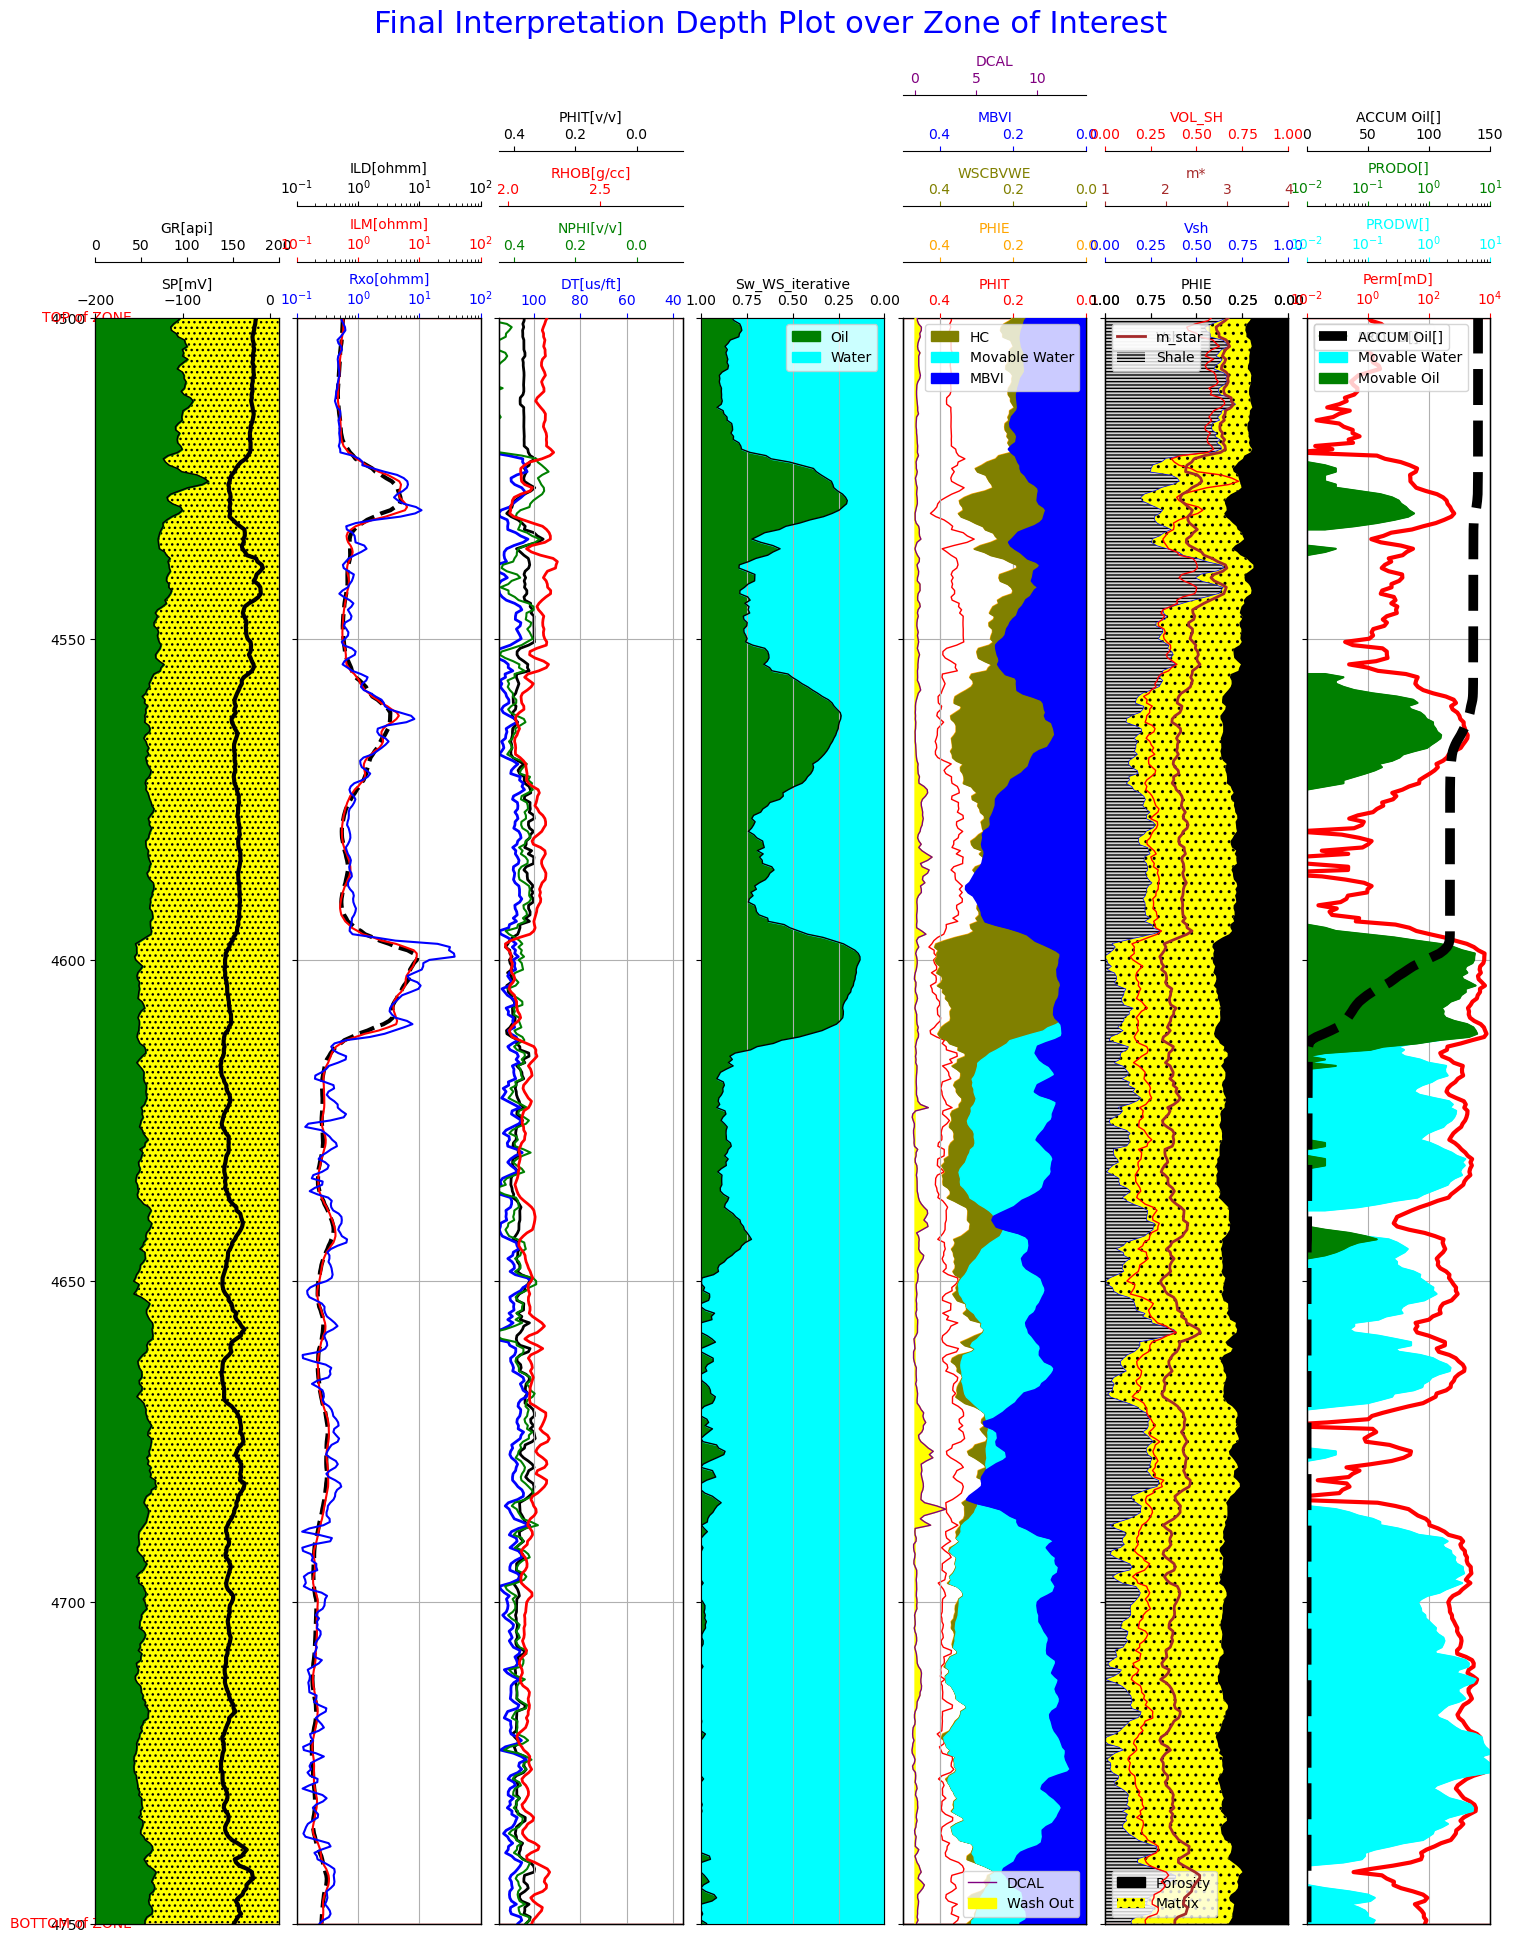

In [102]:
final_plot(top_depth,bottom_depth)

## Depth Plots over range of depths:

# Range Slider Plot:


Select the depth range and scale you want to use to scroll through the depth plot.



Column
    [0] Column
        [0] IntRangeSlider(end=4750, name='Depths:', start=4500, value=(4500, 4600), value_end=4600, value_start=4500)
    [1] Row
        [0] Matplotlib(Figure, height=720, name='interactive00252', width=1440)
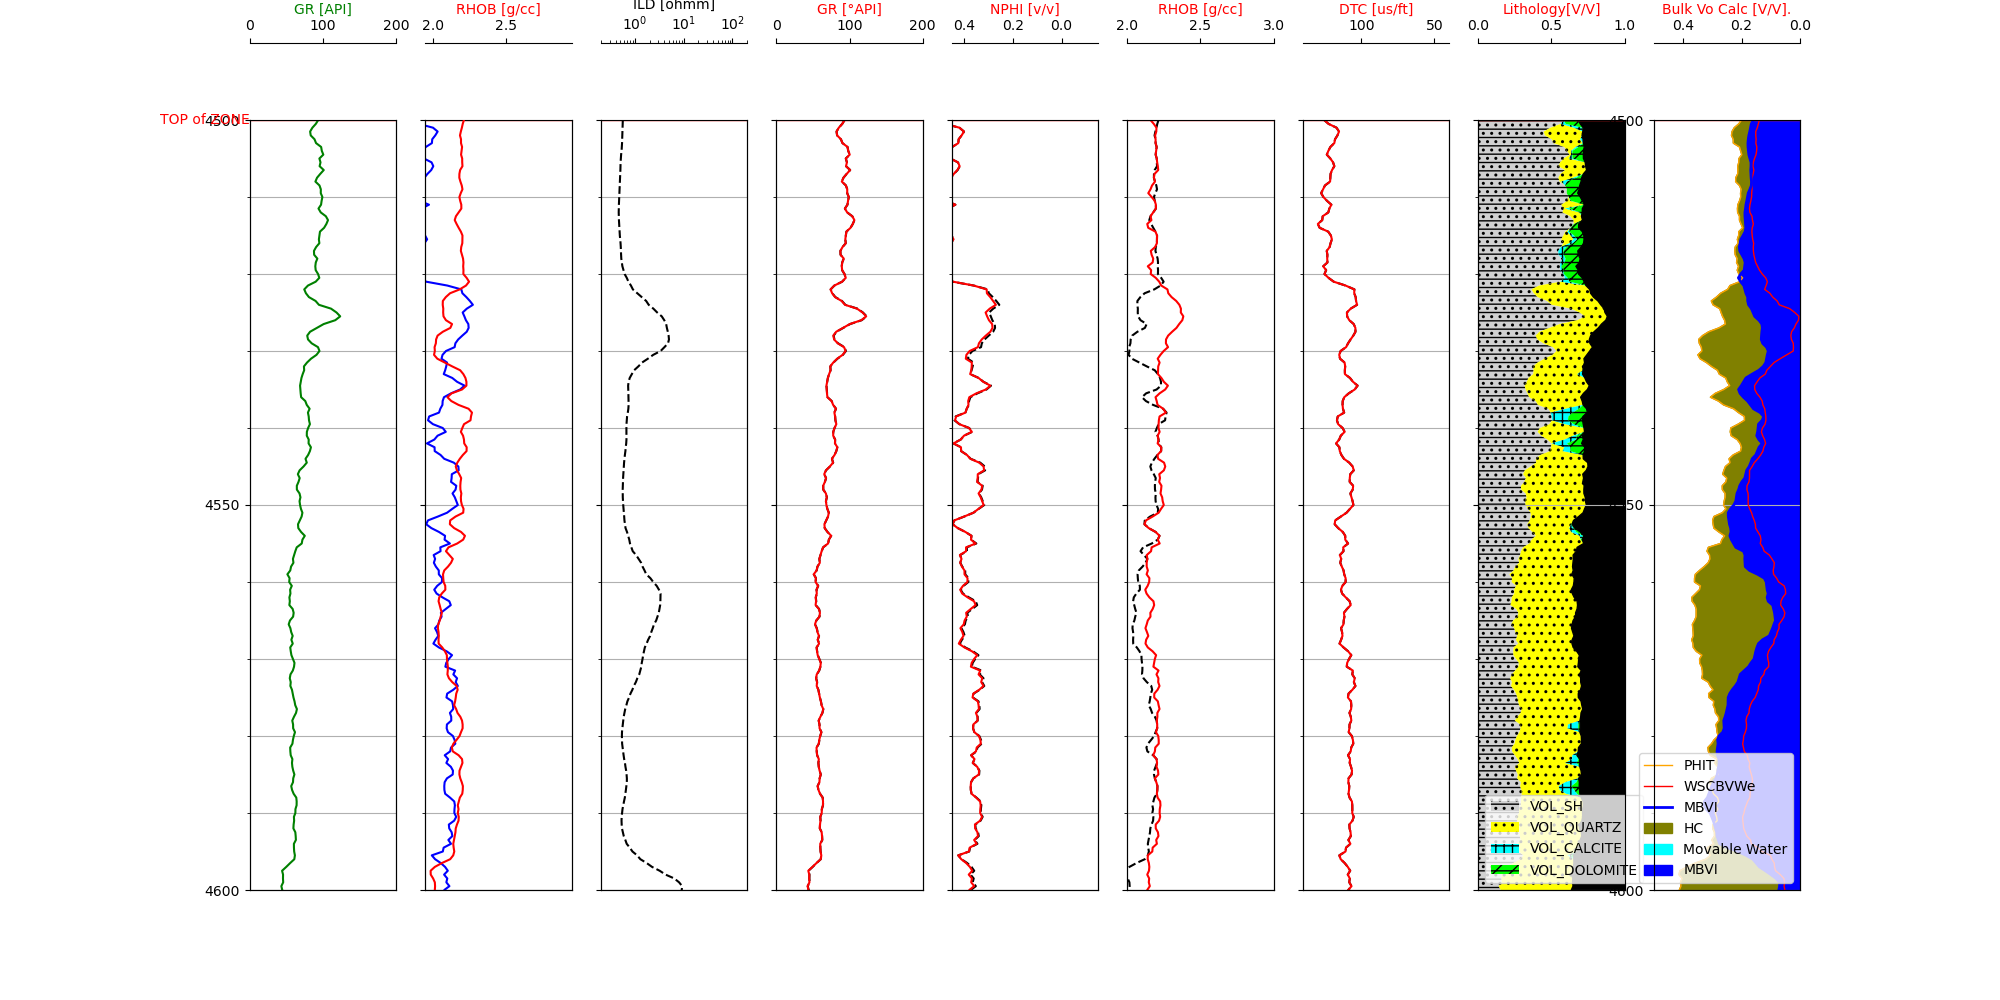

In [103]:
int_range_slider = pn.widgets.IntRangeSlider(
    value  = (4500, 4600) ,
    start    = 4500,
    end    = 4750,
    step   = 1,
    name='Depths:',
    disabled=False,
    #continuous_update=False,
    orientation='horizontal',
    #orientation='vertical',
    #readout=True,
    #readout_format='f',
    #slider_color='red',
    #color='black'
)

print()
print('Select the depth range and scale you want to use to scroll through the depth plot.')
print()
pn.interact(Plot_lith2,depth_range  = int_range_slider)

# 9) Summary Histograms:

In [104]:
"""
===============================================================================
 == 7. Summary Plots
 
 A small example of an average properties over an interval, can be done as follows:
 
==============================================================================
"""

#logs.loc[top_summary:bottom_summary,{'PHIT','PHIE','Sw_wsi','WSCBVWE','vsh','MSTAR'}].hist(figsize=(8, 8),alpha=0.5,bins=40,color='blue')
logs[{'PHIT','PHIE','Sw_wsi','WSCBVWE','vsh','MSTAR'}].hist(figsize=(8, 8),alpha=0.5,bins=40,color='blue')

print ('MAIN ZONE of INTEREST:', top_summary, 'to', bottom_summary, 'feet')
print ('Mean values:')
logs[{'PHIT','PHIE','Sw_ws','WSCBVWE','vsh','MSTAR'}].mean()


MAIN ZONE of INTEREST: 4500 to 4750 feet
Mean values:


WSCBVWE    0.232306
Sw_ws      0.689607
vsh        0.223790
PHIT       0.376080
PHIE       0.320132
MSTAR      2.275967
dtype: float64

In [105]:
logs.head()

DEPTH    BS     CALI    DRHO       DT       GR     ILD     ILM      MBVI  \
0  4500.0  10.0  10.1790  0.0010  125.413  93.3120  0.5620  0.5630  0.158930   
1  4500.5  10.0  10.1923  0.0003  122.433  90.0702  0.5587  0.5687  0.166430   
2  4501.0  10.0  10.2940 -0.0030  116.966  85.3410  0.5570  0.5720  0.169075   
3  4501.5  10.0  10.5195 -0.0058  115.244  82.2392  0.5532  0.5722  0.171720   
4  4502.0  10.0  10.5120 -0.0050  116.323  83.0450  0.5490  0.5680  0.174890   

       MFFI  ...        So       swe   swfr  kro     krw        fw  prodo  \
0  0.009500  ...  0.305094  0.694906  0.001  1.0  0.0001  0.000145    0.0   
1  0.009420  ...  0.318360  0.681640  0.001  1.0  0.0001  0.000145    0.0   
2  0.009645  ...  0.350421  0.649579  0.001  1.0  0.0001  0.000145    0.0   
3  0.009870  ...  0.348502  0.651498  0.001  1.0  0.0001  0.000145    0.0   
4  0.010800  ...  0.354662  0.645338  0.001  1.0  0.0001  0.000145    0.0   

   prodw  accumoil  accumwater  
0    0.0    140.11      435.39  
1    0.0    140.11      435.39  
2    0.0    140.11      435.39  
3    0.0    140.11      435.39  
4    0.0    140.11      435.39  

[5 rows x 94 columns]

# 10) Save Data:

In [106]:
#Then we can incorporate our calculated logs into the main pandas dataframe:
curves_to_export={'PHIT','PHIE','Sw_wsi','BVW','vsh','MSTAR'}
for x in curves_to_export:
    data[x] =logs[x]

#You have the option to export the dataframe to a csv file:
logs.to_csv('GulfCoast_Well_Logs.csv', encoding='utf-8')


#or you can export it to Excel:
from pandas import ExcelWriter

writer=ExcelWriter('GulfCoast_Well_Logs.xlsx')
logs.to_excel(writer, sheet_name='Logs', index=True)
writer.save()
